In [1]:
# 데이터 시각화 커스텀 모듈
import print_package as pp

import pandas as pd
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# matplot 한글 설정
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    print("Hangul Setting OK for Mac")
    rc("font", family = "Arial Unicode MS")
elif platform.system() == "Windows":
    print("This py not setting for Window sry")
else:
    print("We don't know System")
    
plt.rcParams["axes.unicode_minus"] = False

Hangul Setting OK for Mac


In [36]:
# 모듈 파일 수정시 리로드
import importlib
importlib.reload(pp)

<module 'print_package' from '/Users/seokholee/KDT/lsh_package/TFT/print_package.py'>

## 게임 데이터 불러오기

In [4]:
# 티어별 게임 정보 불러오기
with open('./data/tier_games_to_code_df.pkl', "rb") as f:
    games = pickle.load(f)

## 티어별 게임(승/패) 수

In [5]:
# TFT 소환사 기본정보 데이터 불러오기
summoners_df = pd.read_csv('./data/summoners_info.csv', index_col=0)

In [6]:
summoner_games = summoners_df.groupby('tier')['wins','losses'].sum()
summoner_games['games'] = summoner_games['wins'] + summoner_games['losses']
summoner_games = summoner_games.reset_index()

In [7]:
summoner_games = summoner_games.sort_values(by=['tier'], key=lambda x: x.map(pp.swap_dict(pp.tier_dict)))

In [8]:
pp.printTierBasicInfo(summoner_games)

## 등수가 좋은 증강과 유닛은??
- 티어별 시각화
- 등수는 순위방어(4위) 등수까지만 확인합니다.

In [165]:
# 보고싶은 티어 입력 
# print('티어 목록 \n[0 : 챌린저, 1 : 그랜드마스터, 2 : 마스터, 3 : 다이아, 4 : 플래티넘, 5 : 골드, 6 : 실버, 7 : 브론즈, 8 : 아이언]')
# select_tier = input("보고 싶은 티어 숫자를 입력하세요 (구분은 띄어쓰기만 가능합니다) :")
# select_tier = select_tier.split()

In [16]:
select_tier = [i for i in range(9)]

### 티어별 증강 데이터 시각화

#### 순위방어(4위) 등수 기록이 많은 증강

CHALLENGER 통계


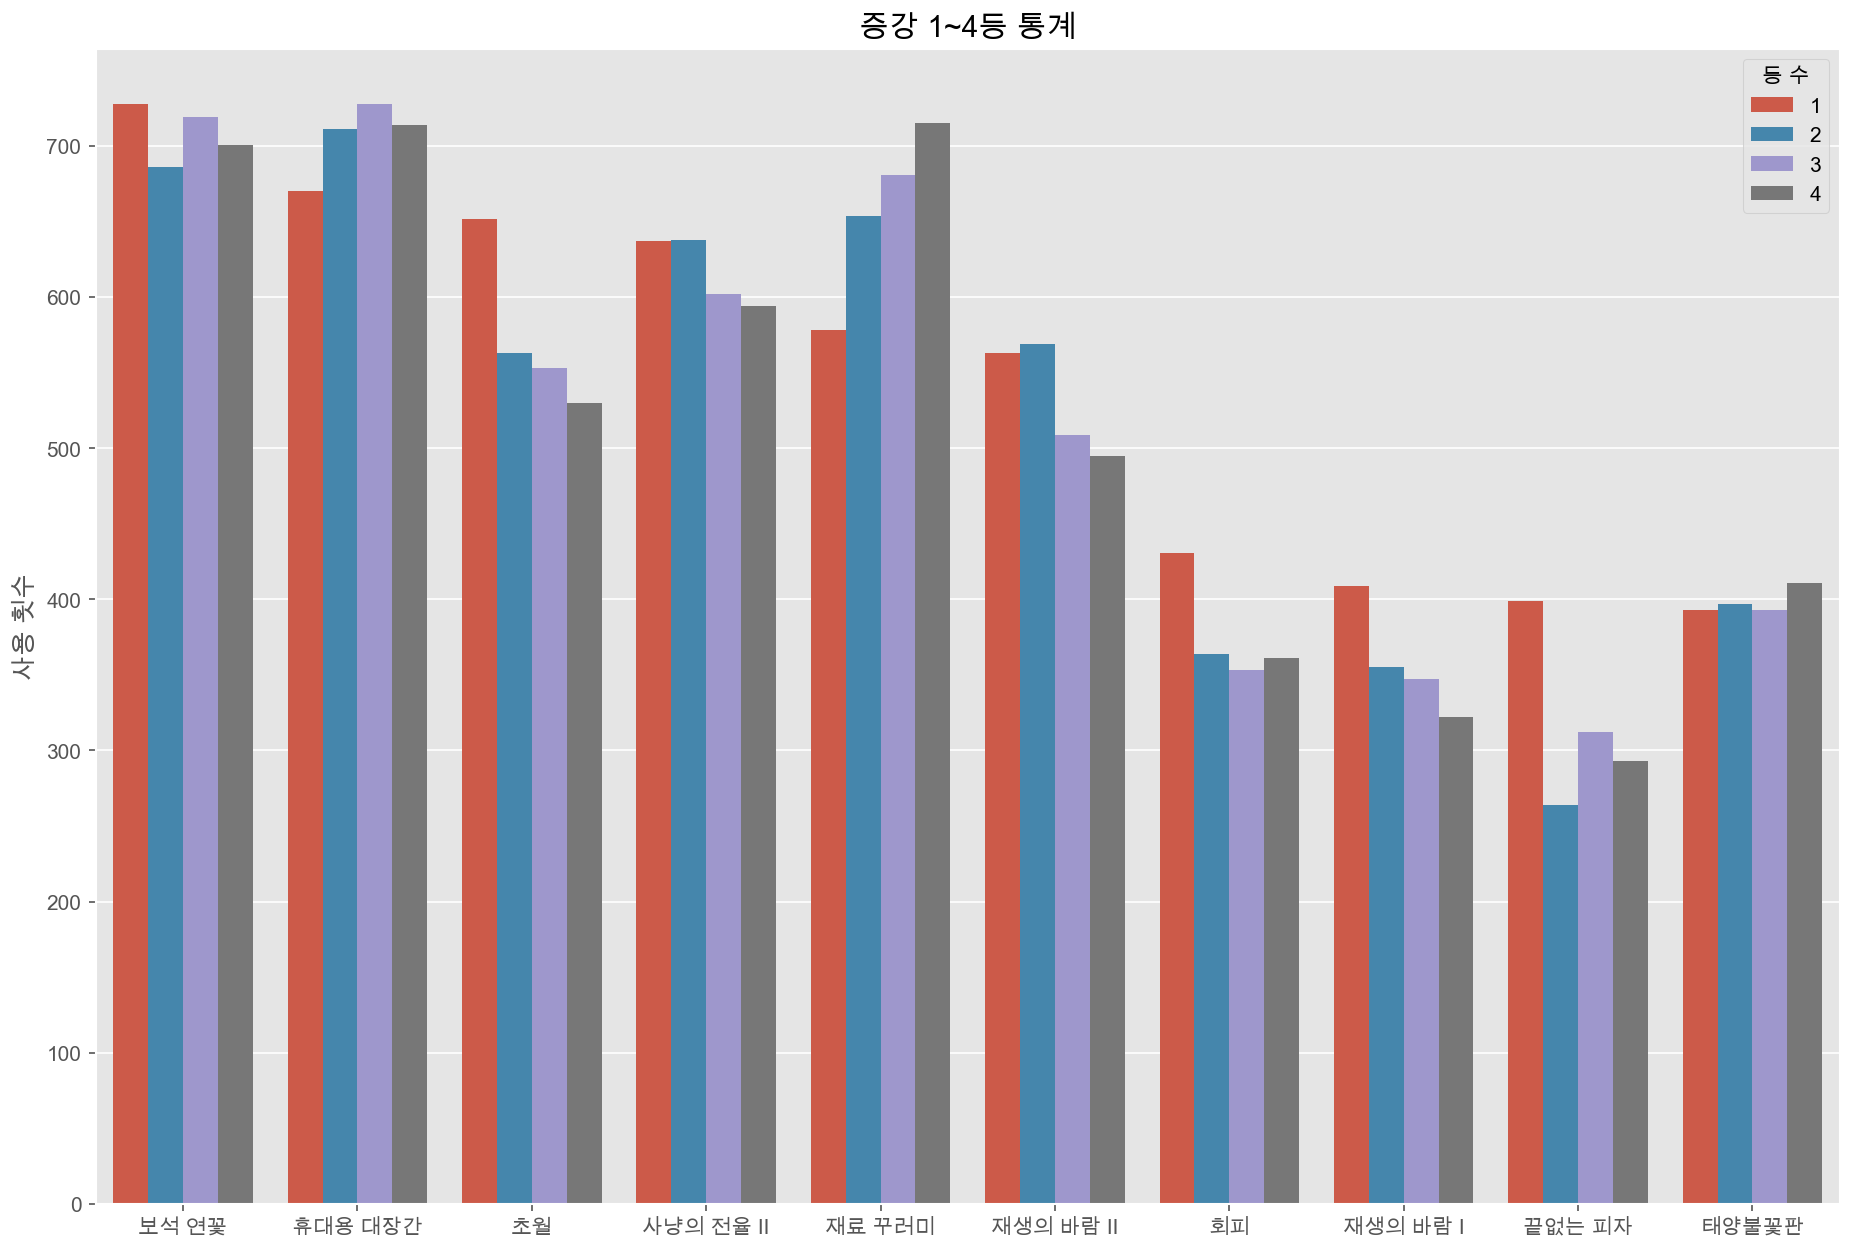



GRANDMASTER 통계


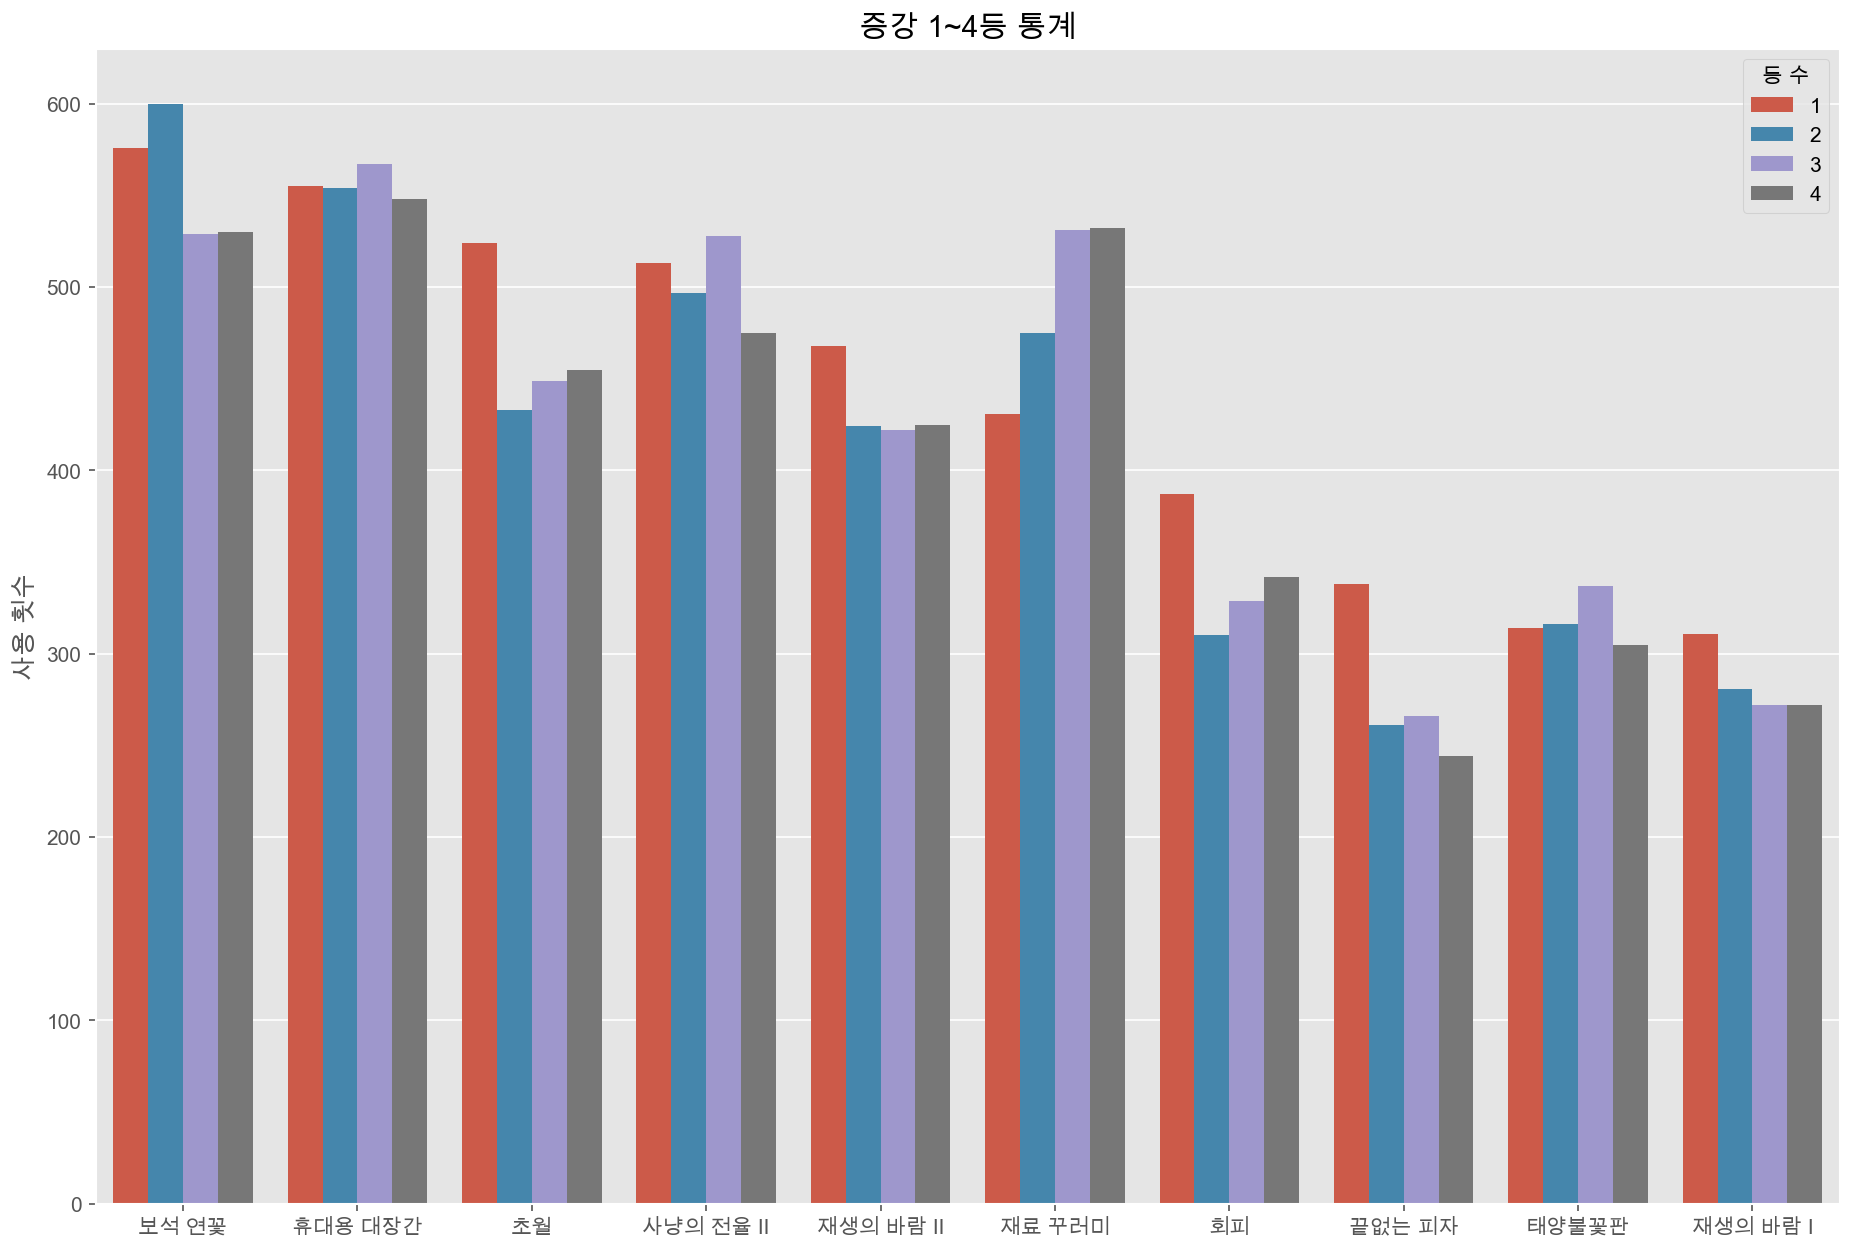



MASTER 통계


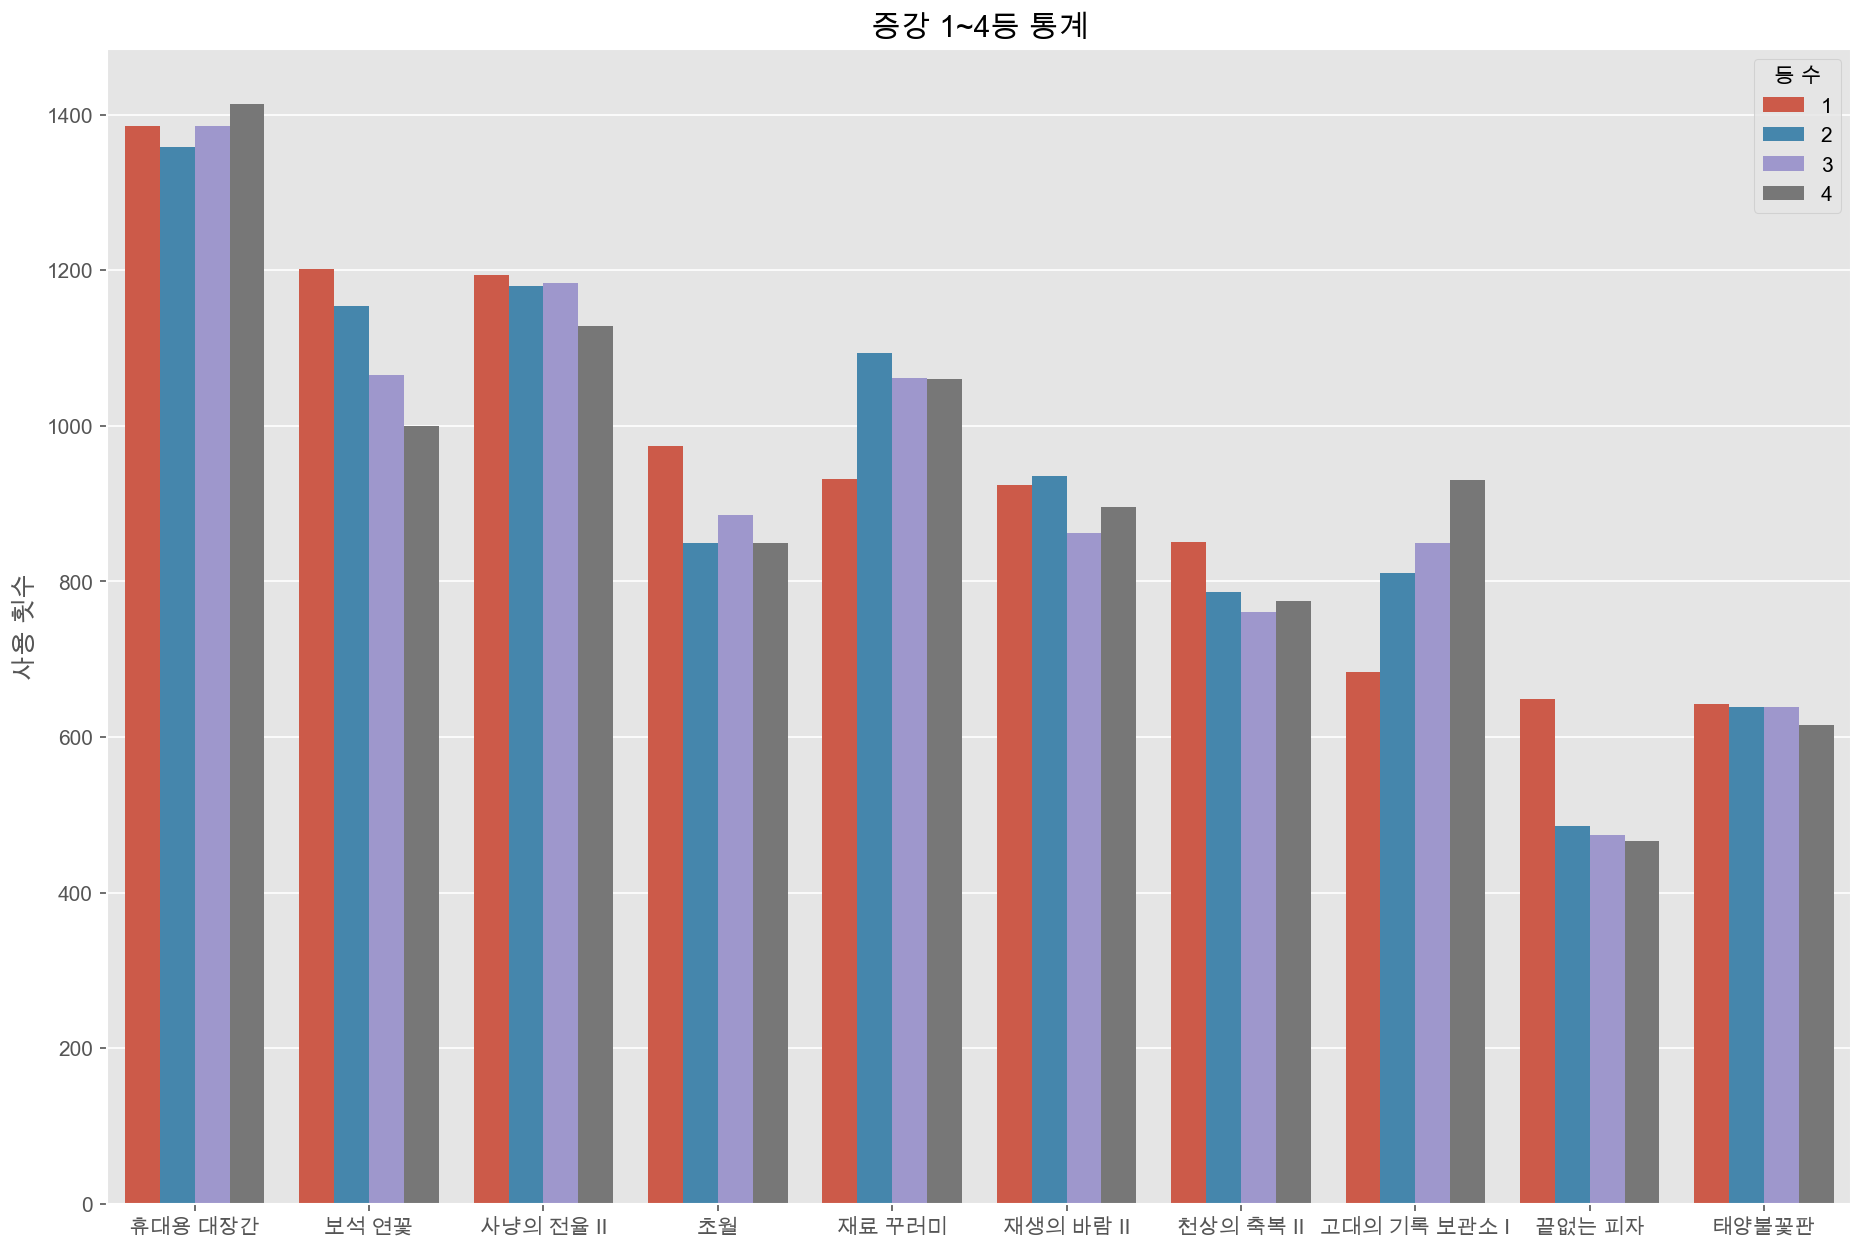



DIAMOND 통계


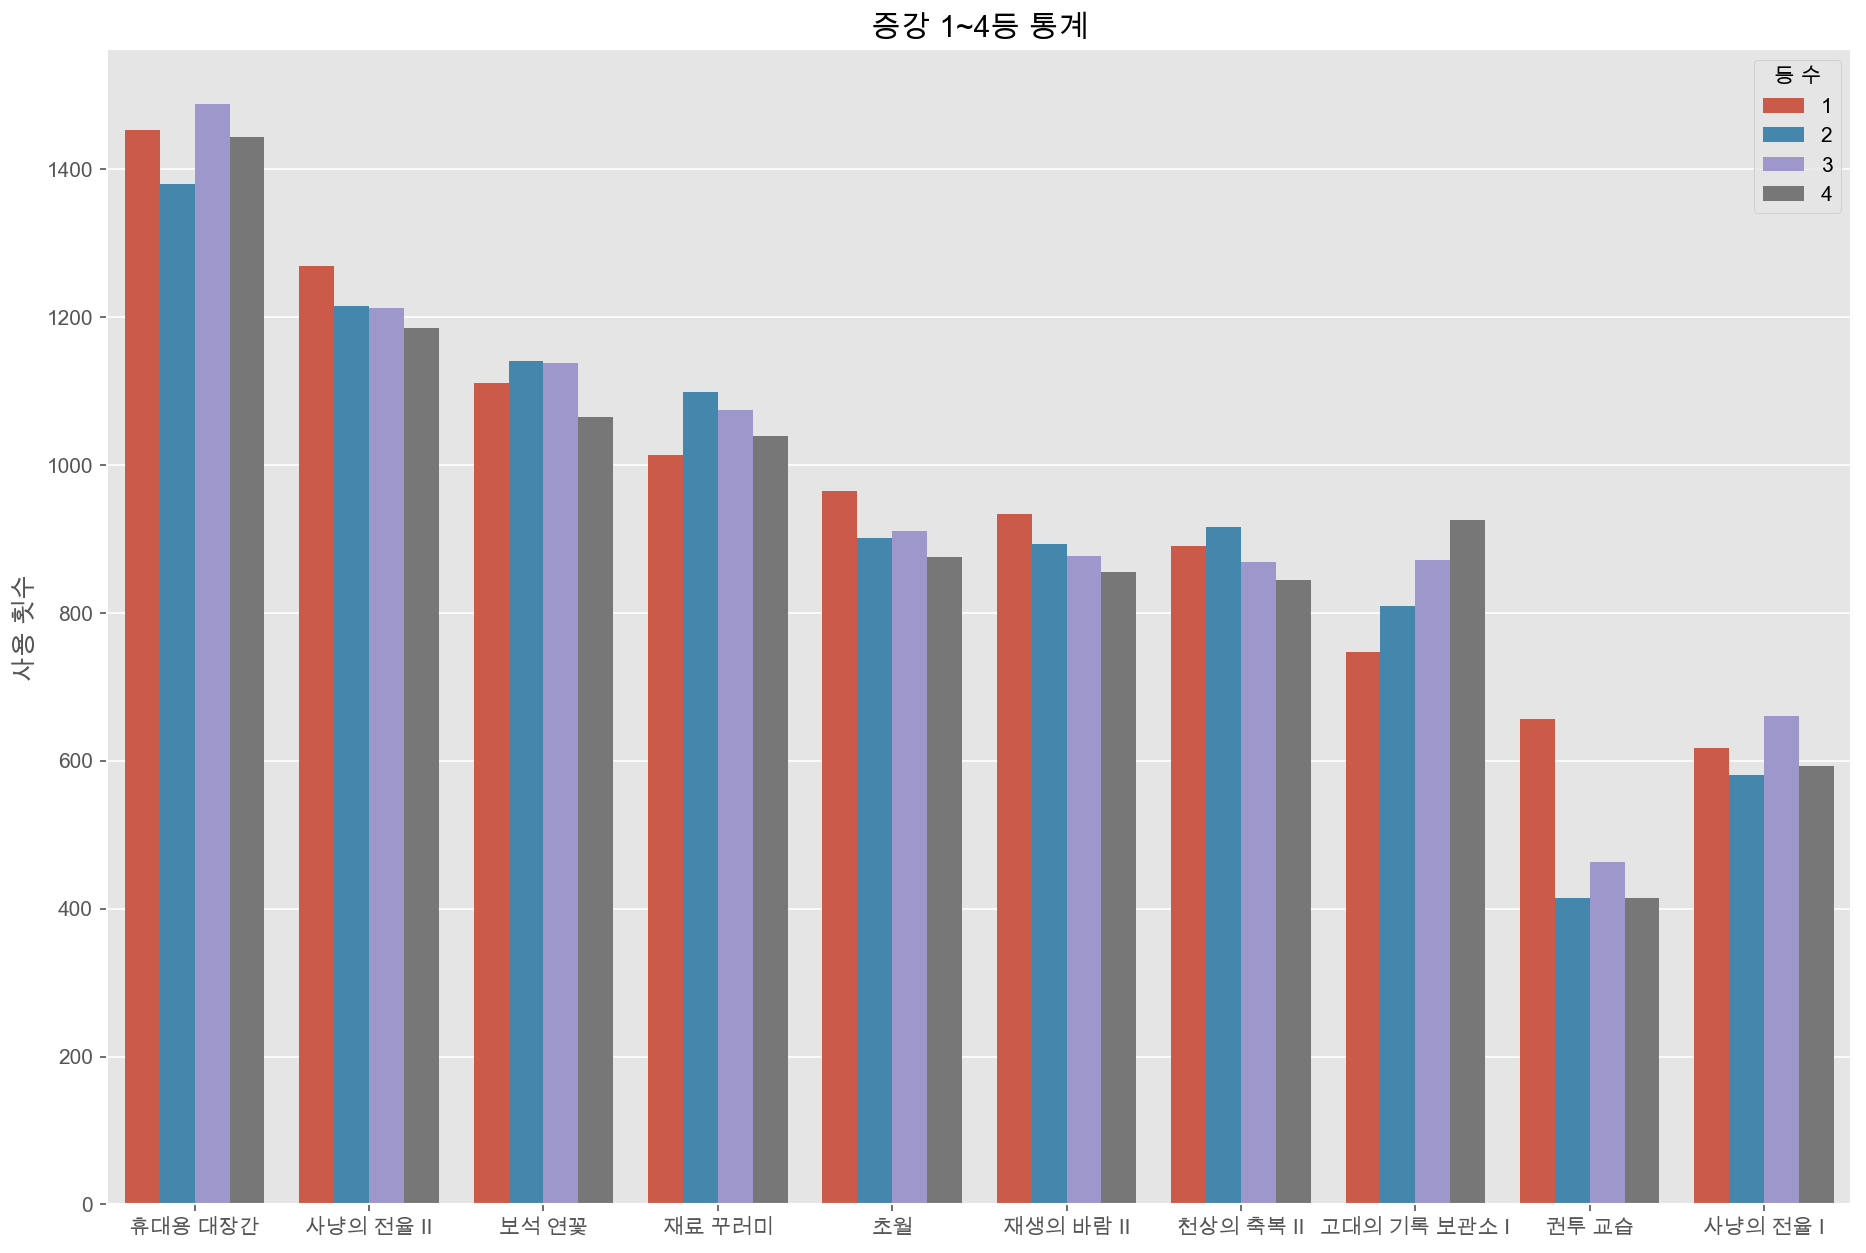



PLATINUM 통계


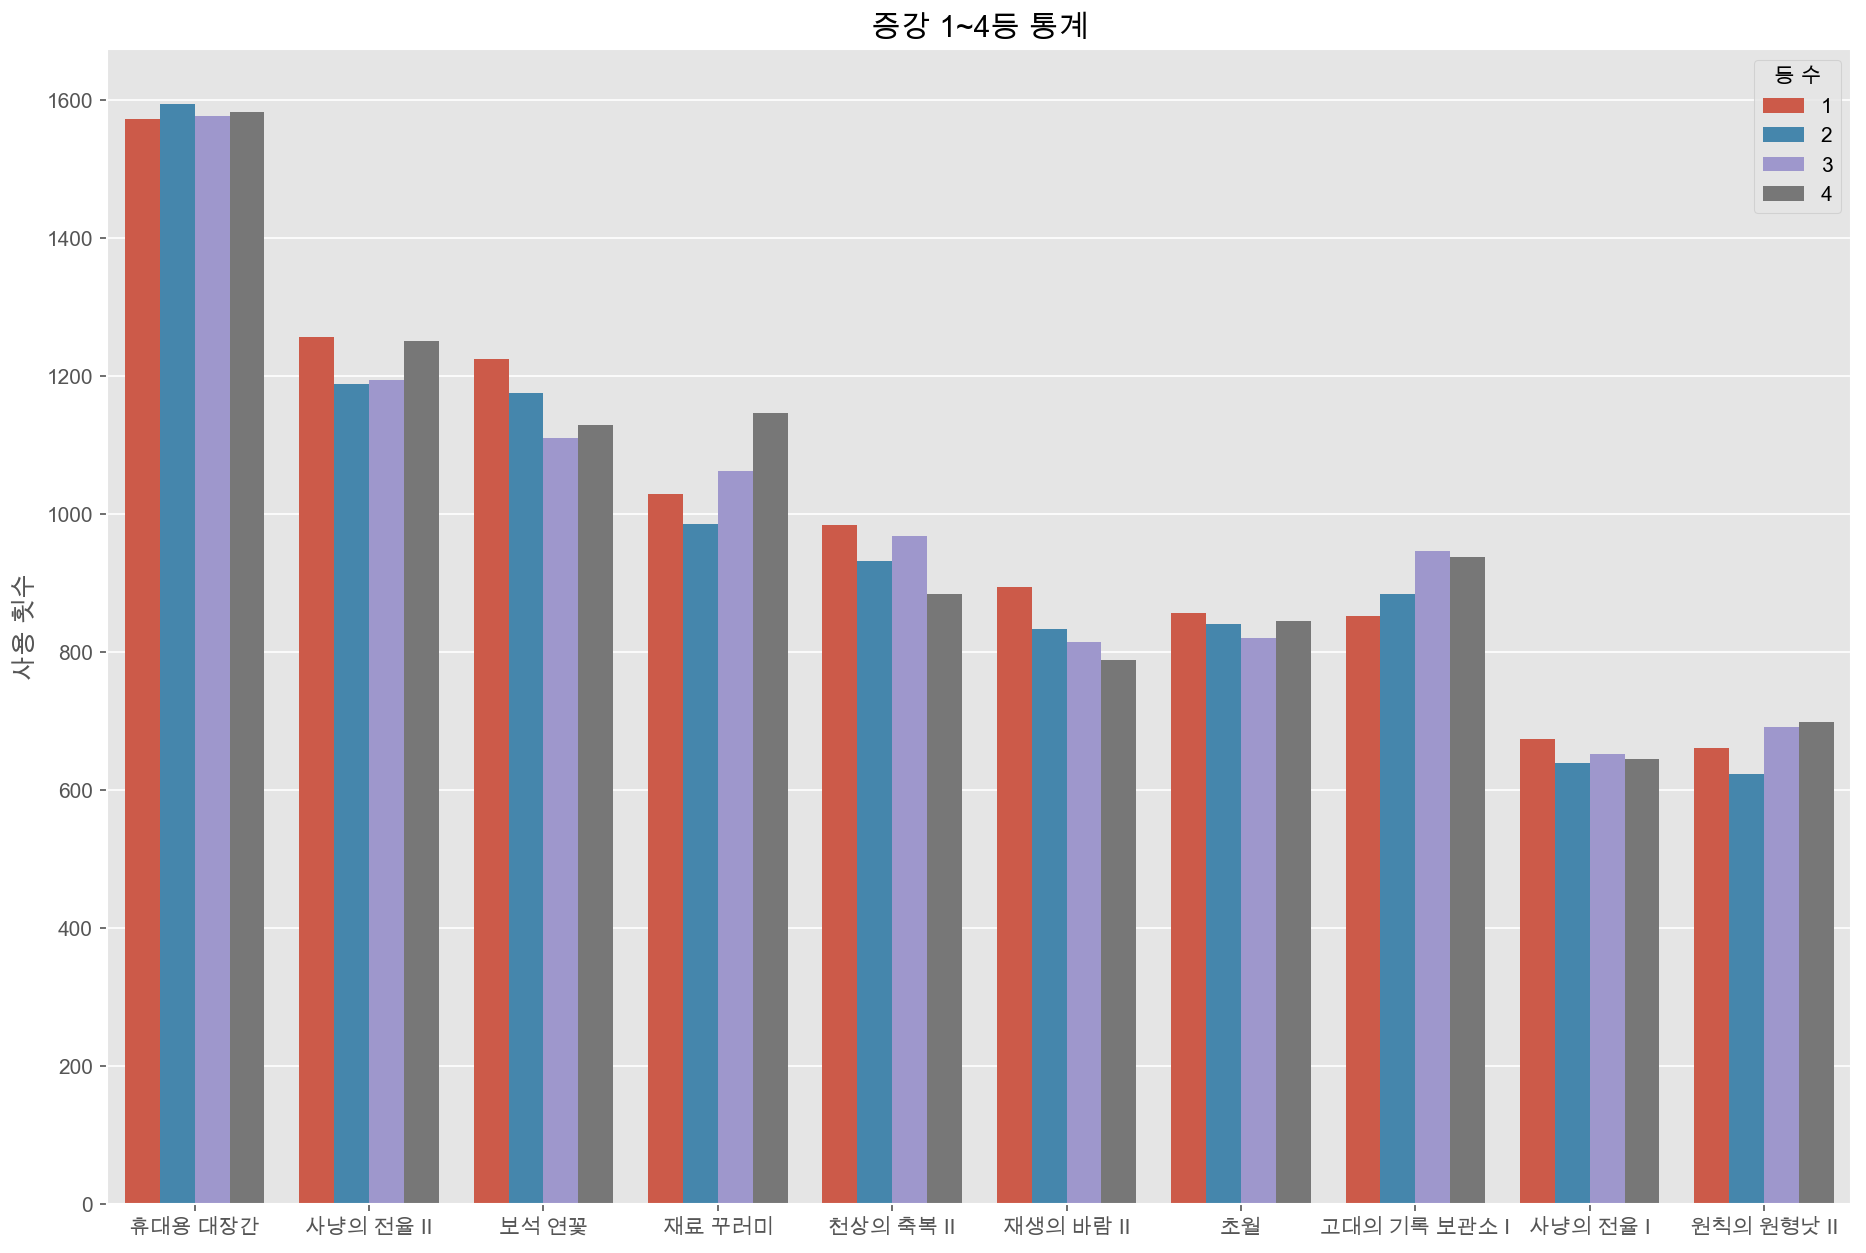



GOLD 통계


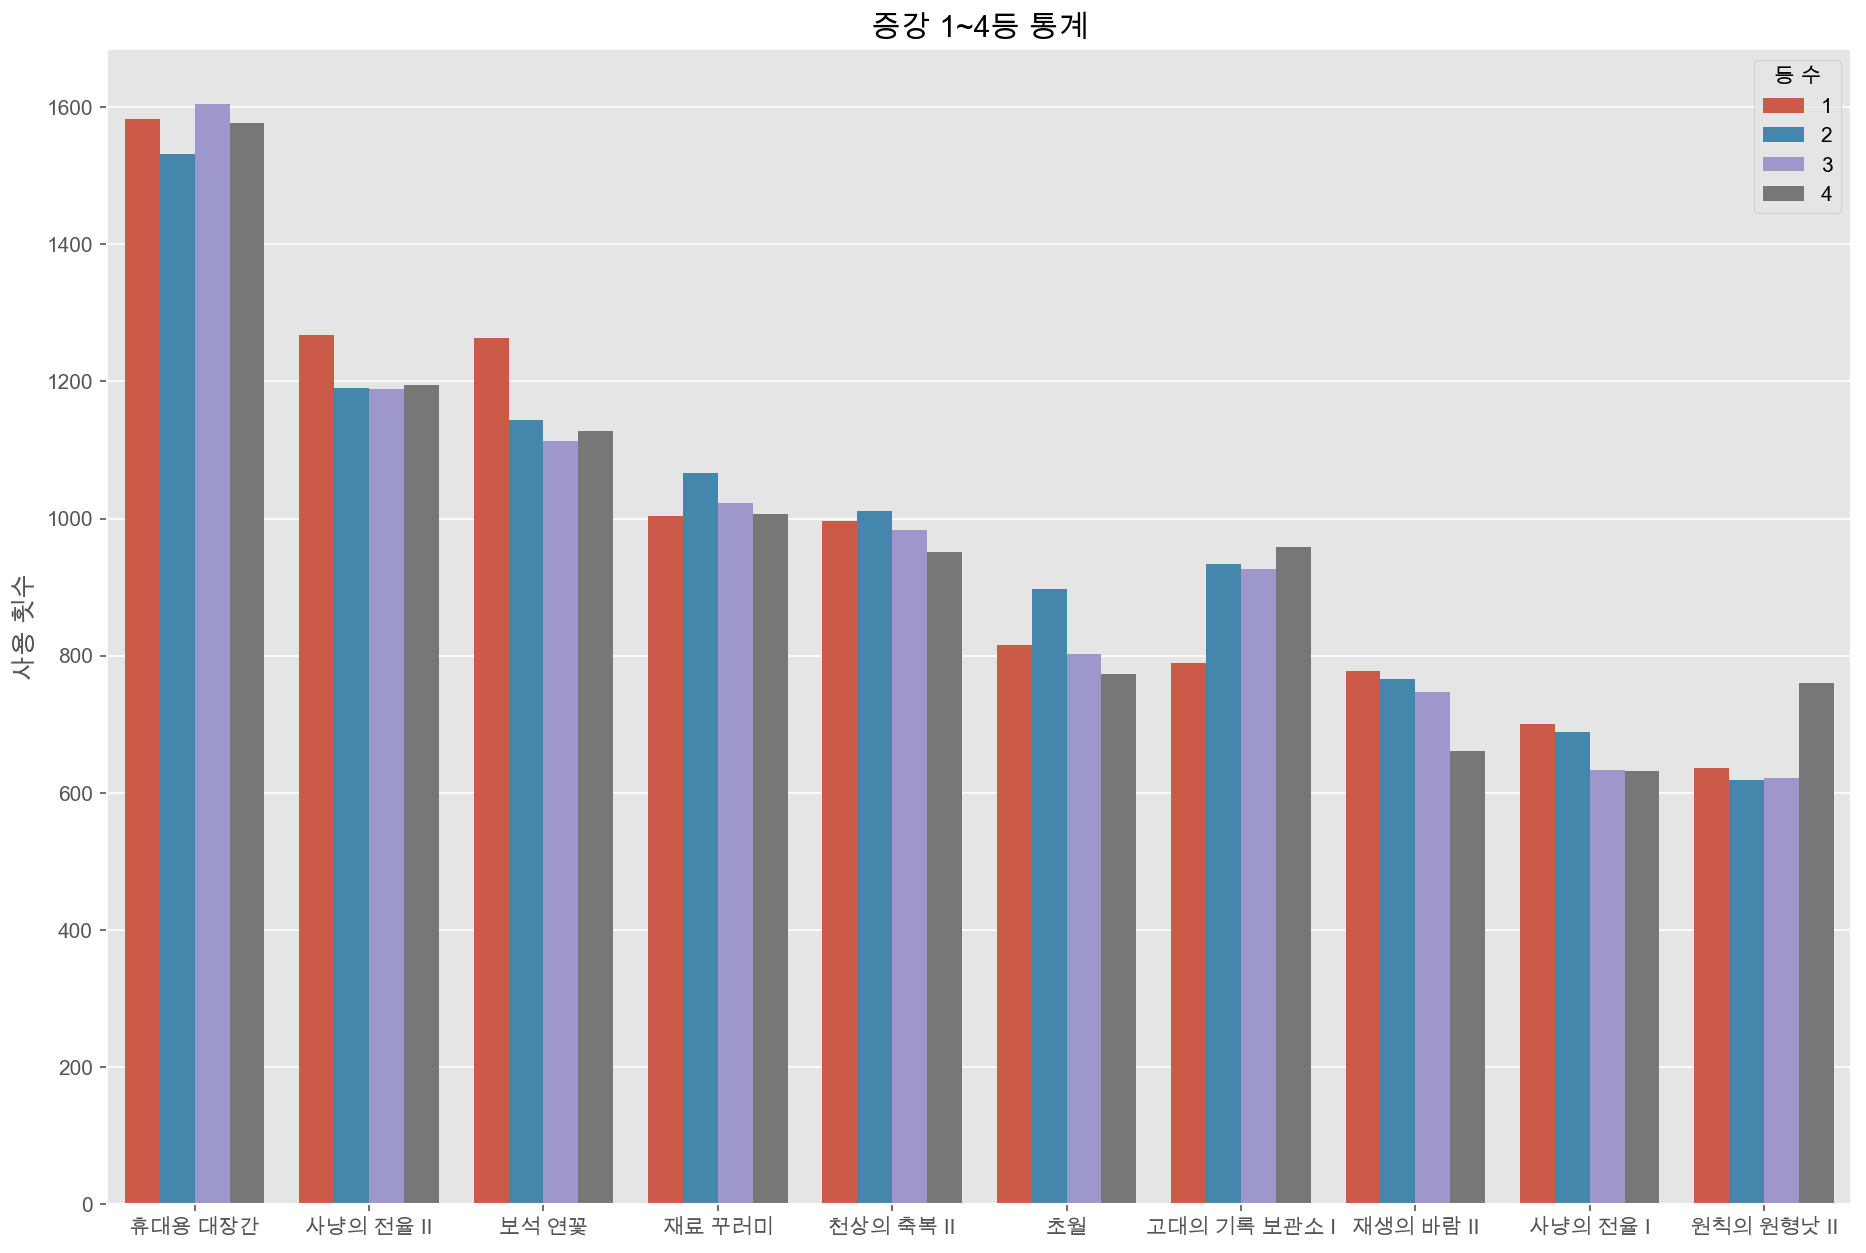



SILVER 통계


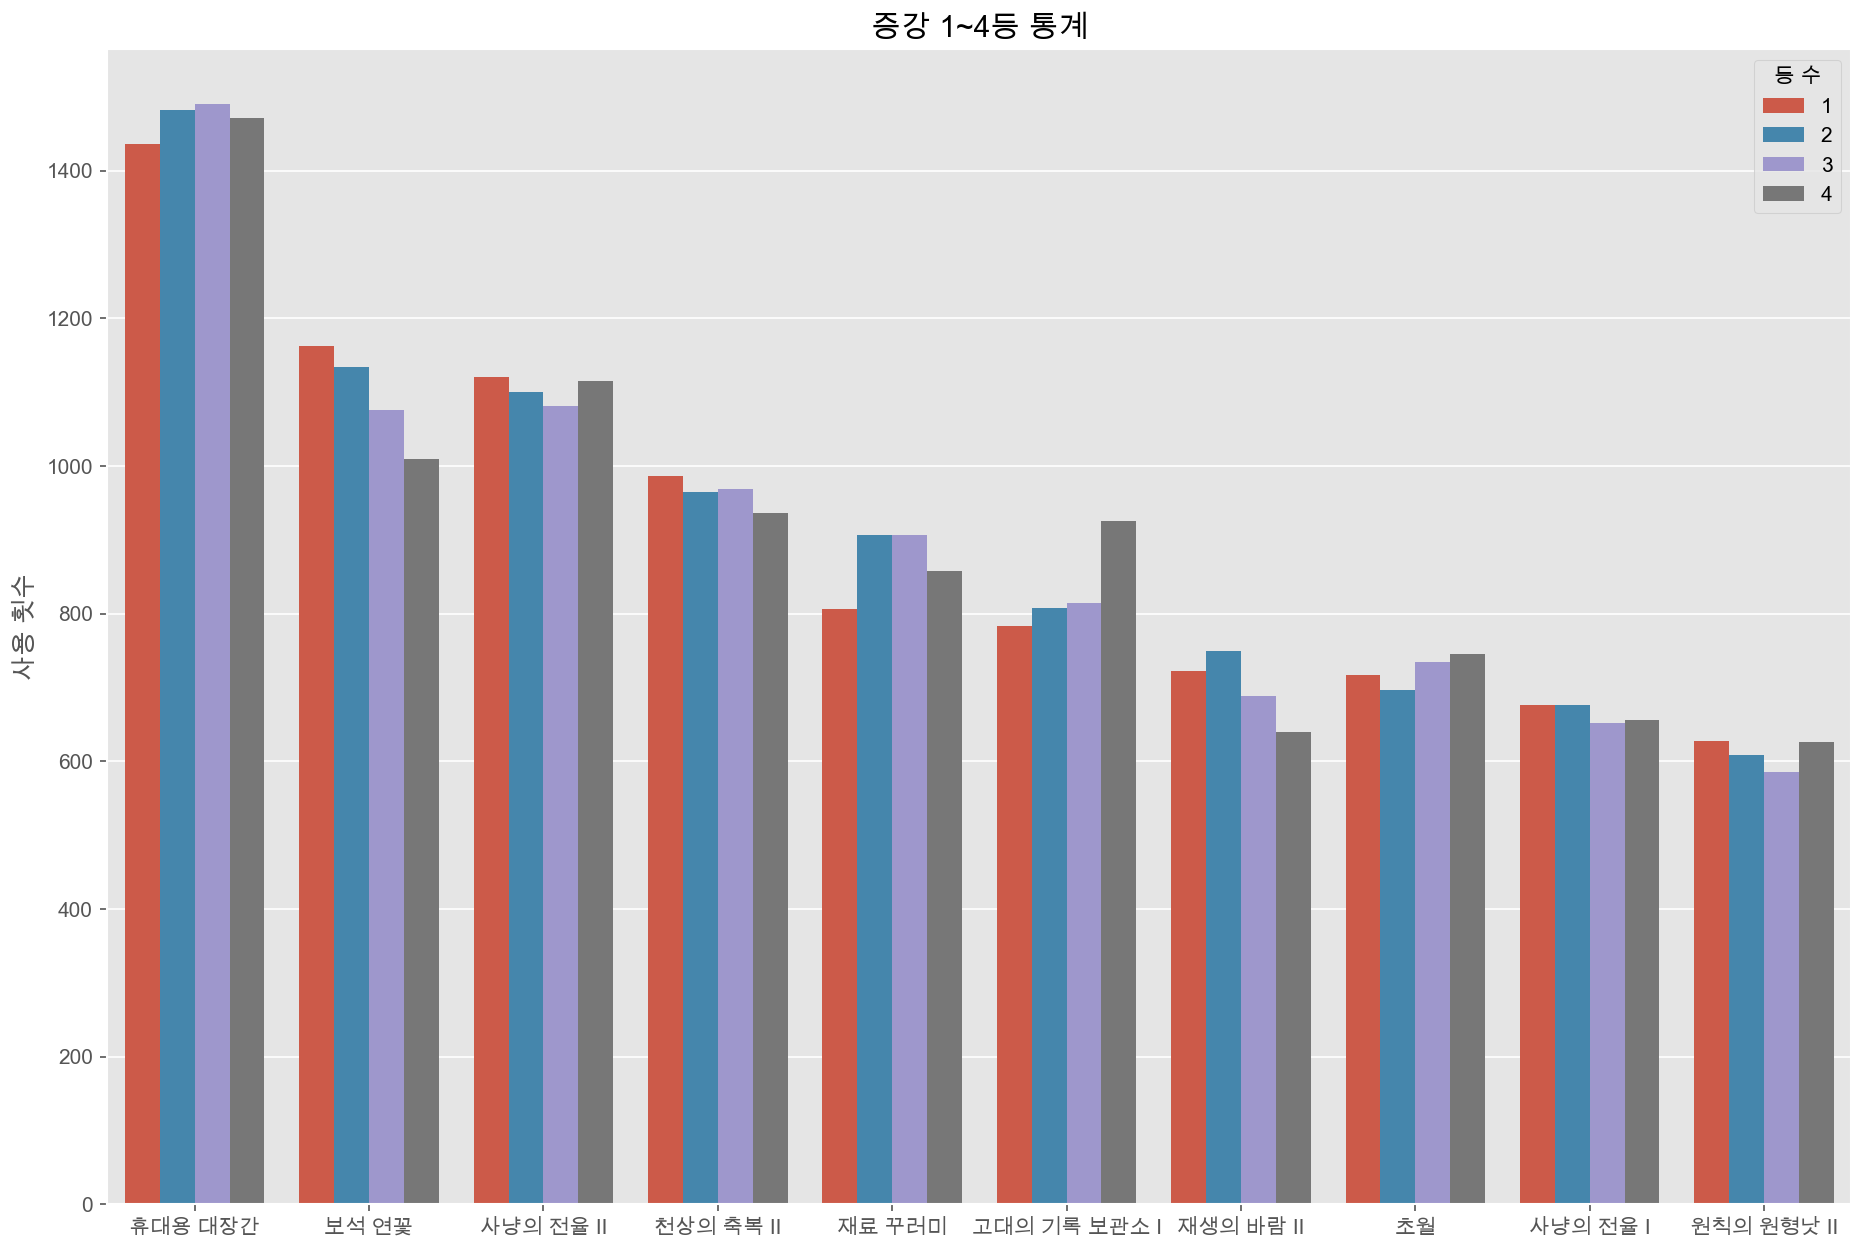



BRONZE 통계


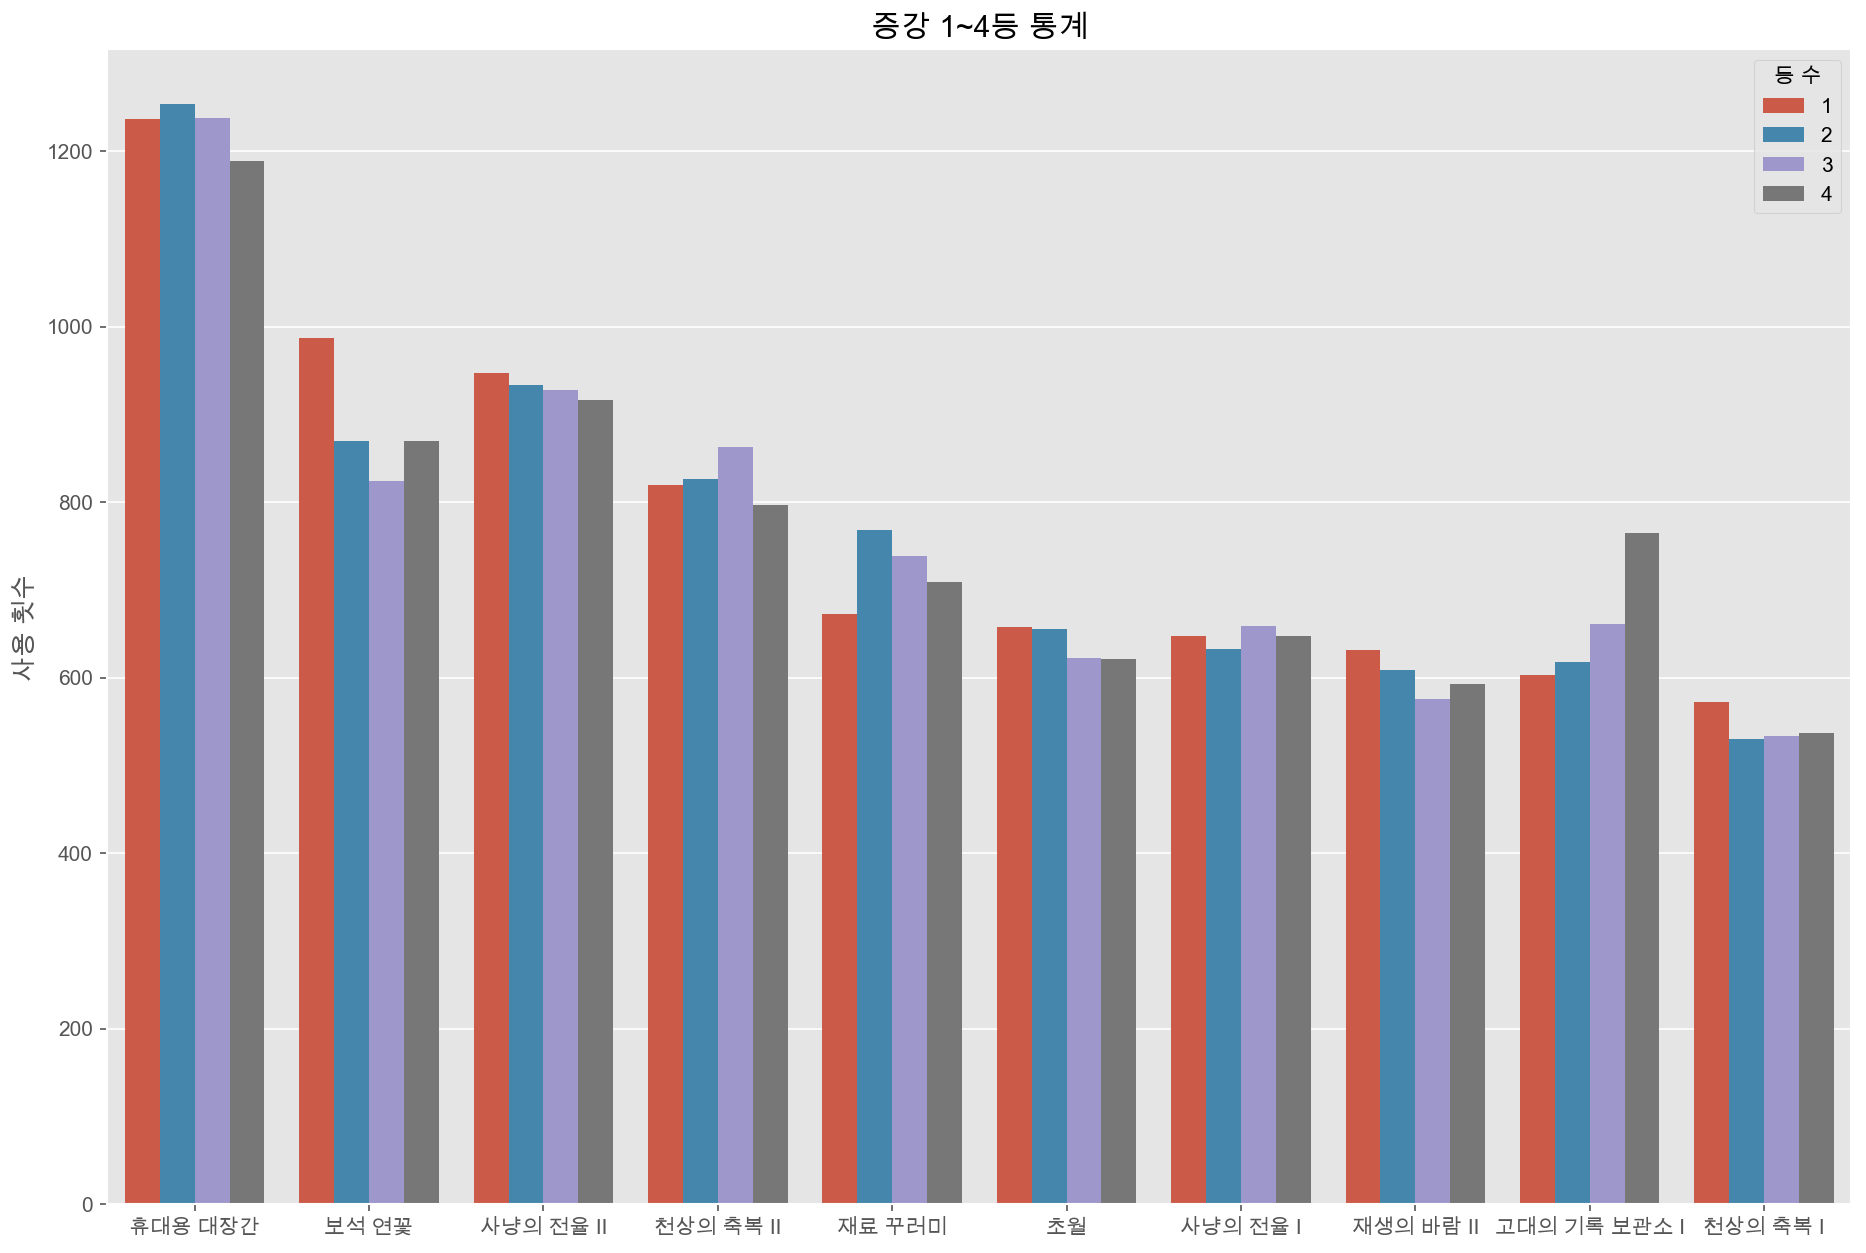



IRON 통계


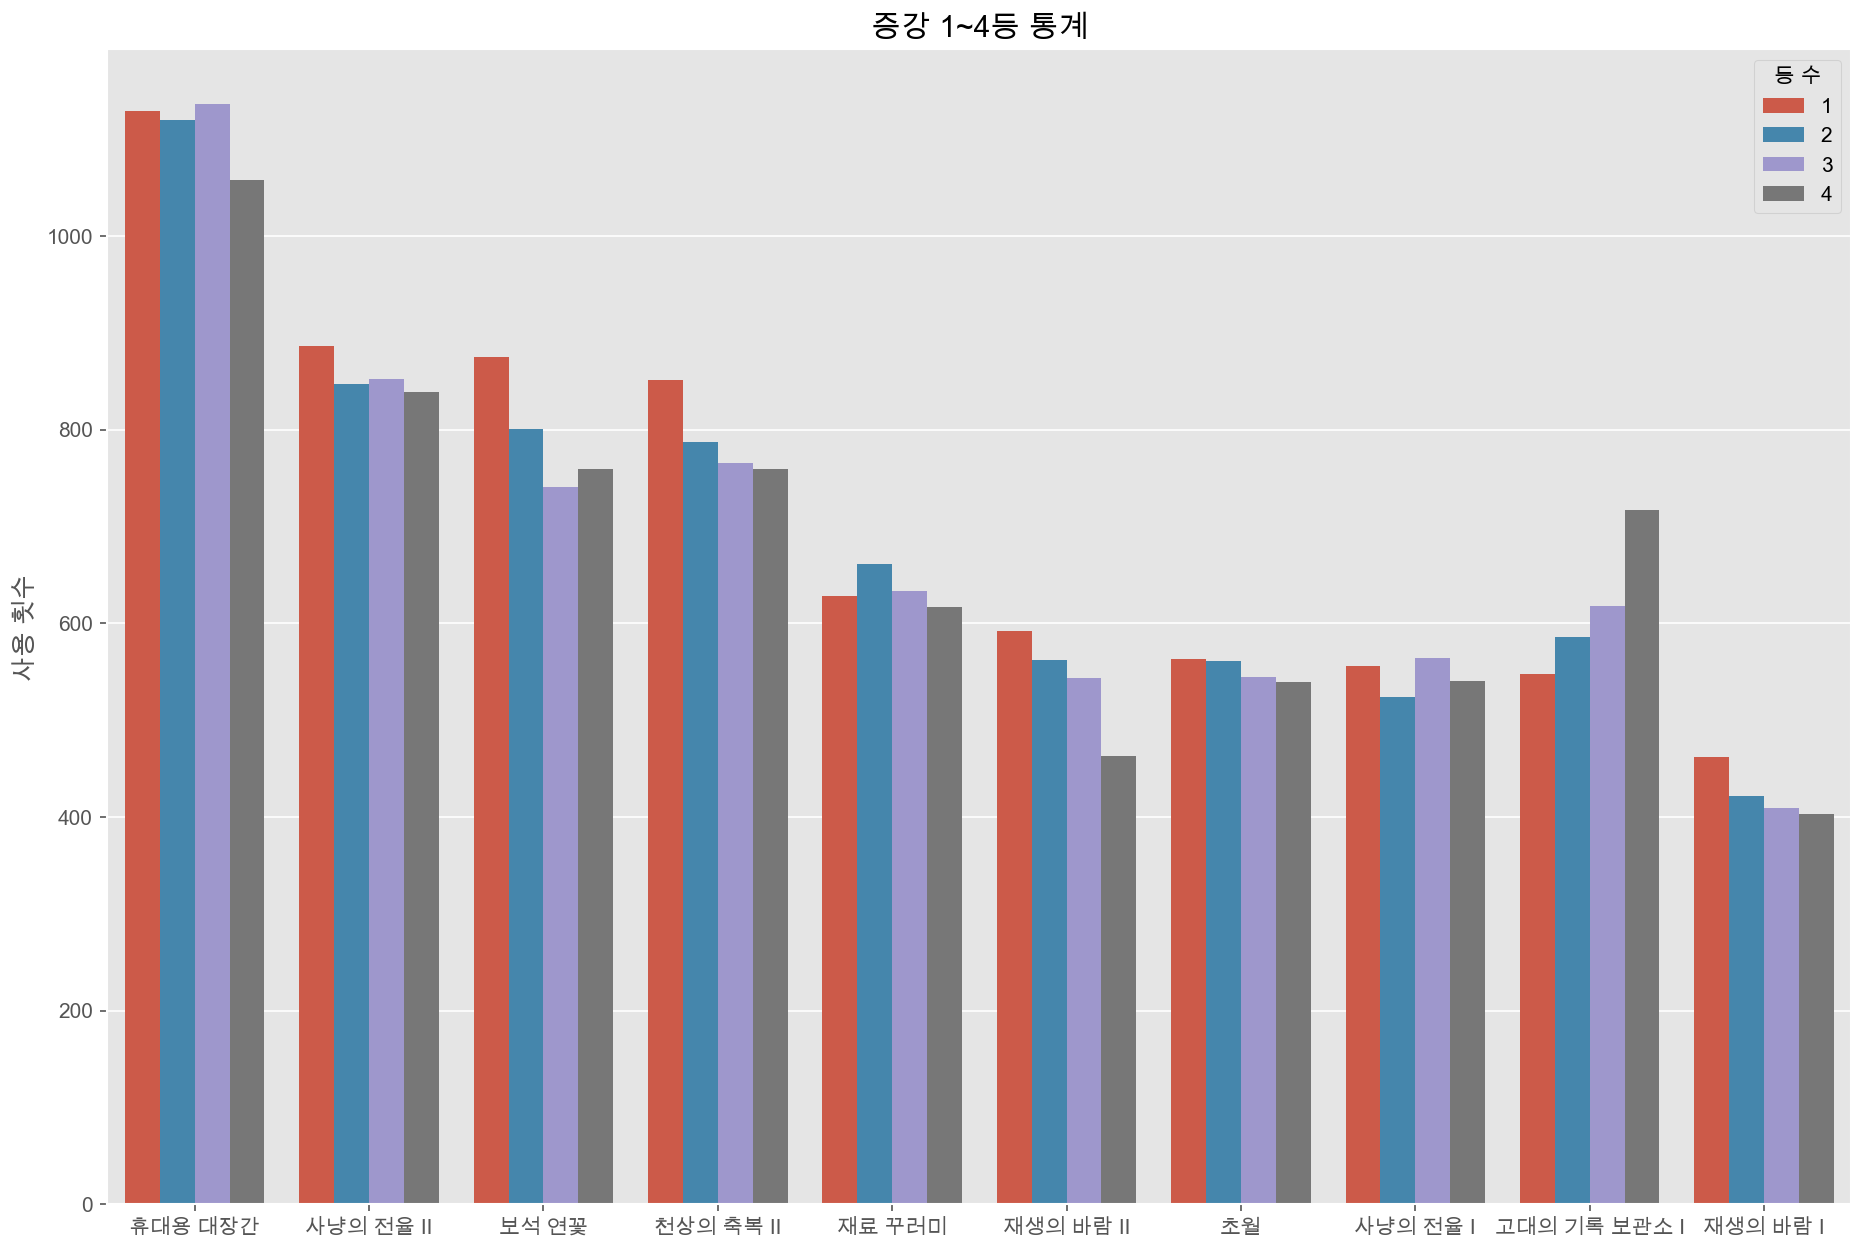

In [18]:
augs_df = pd.DataFrame()

for tier in select_tier:
    tier_idx = int(tier)
    print(pp.tier_dict[tier_idx], "통계")
    tmp = pp.printCols(games[int(tier)], 'augments', tier_idx)
    tmp['tier'] = pp.tier_dict[tier_idx]
    augs_df = pd.concat([augs_df, tmp])
    print()
    print()

#### 1등을 많이한 증강의 티어별 승률

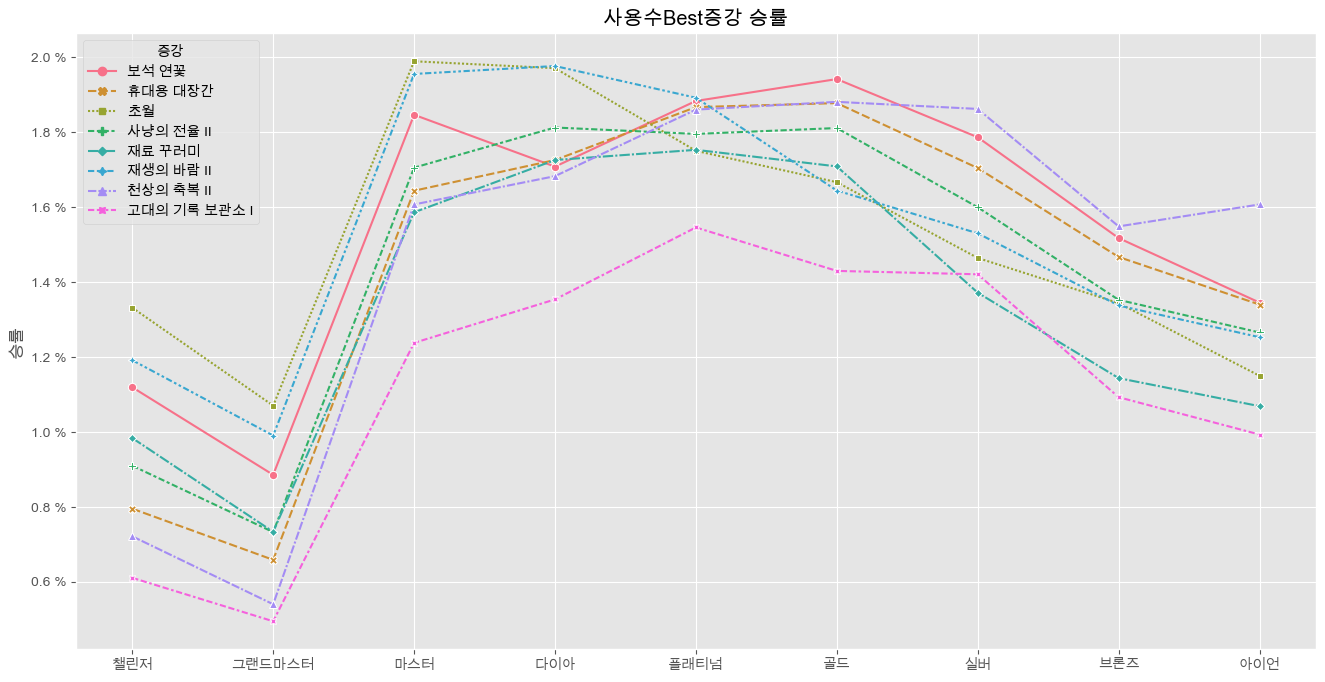

In [24]:
pp.draw_1Place(augs_df, 'augments')

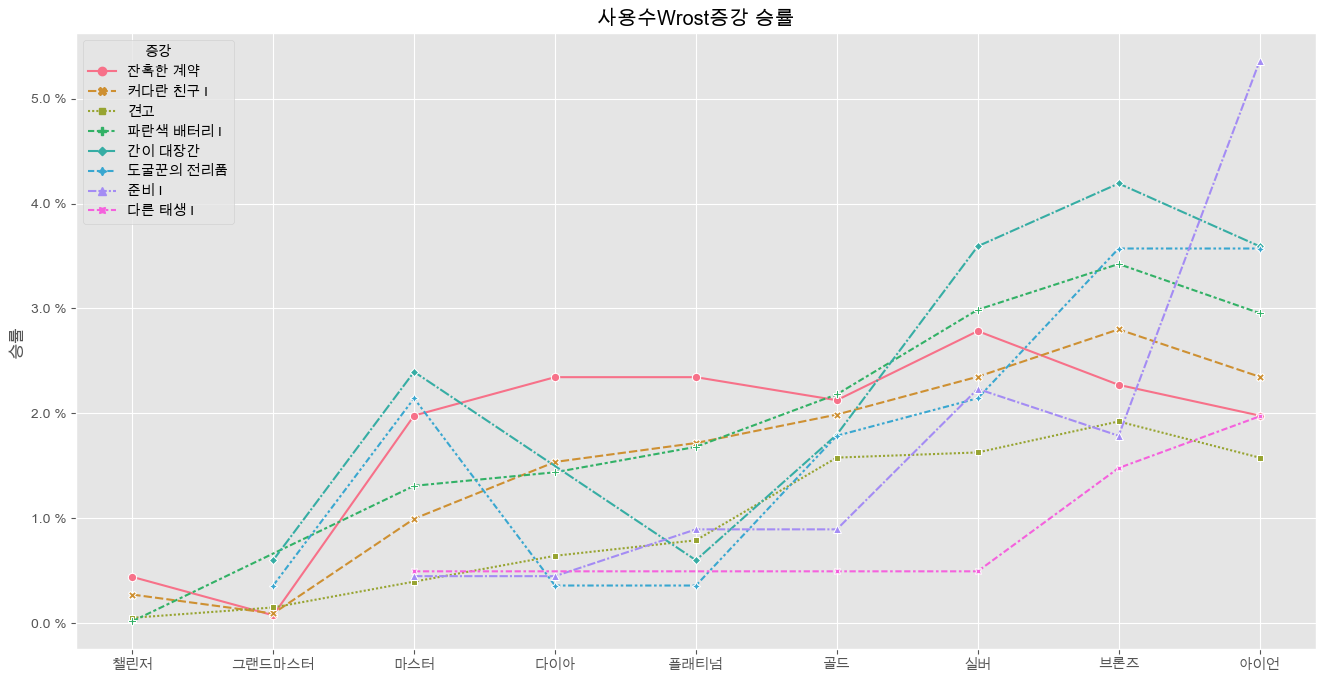

In [222]:
pp.draw_1Place(augs_df, 'augments', False)

### 티어별 유닛 데이터 시각화

CHALLENGER 통계


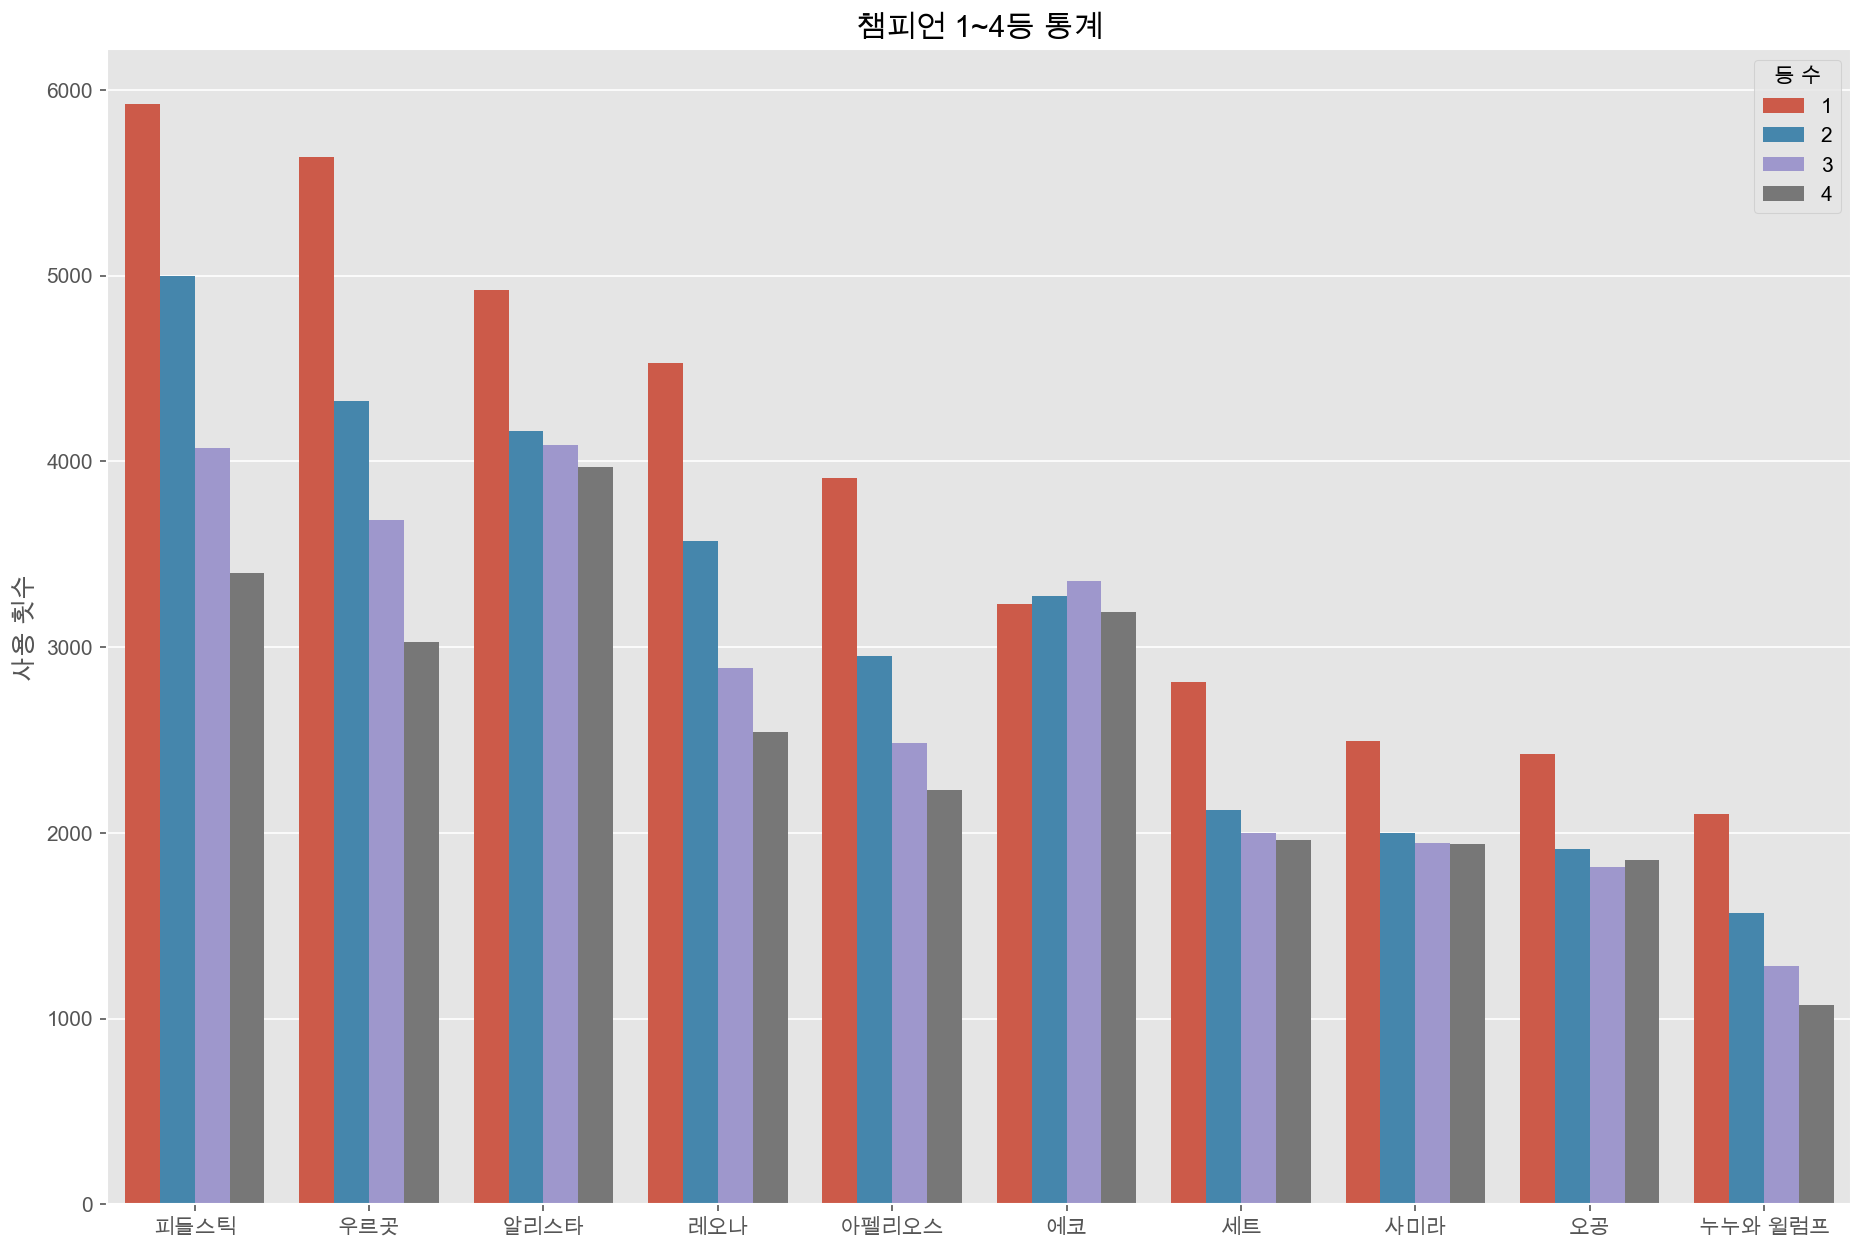



GRANDMASTER 통계


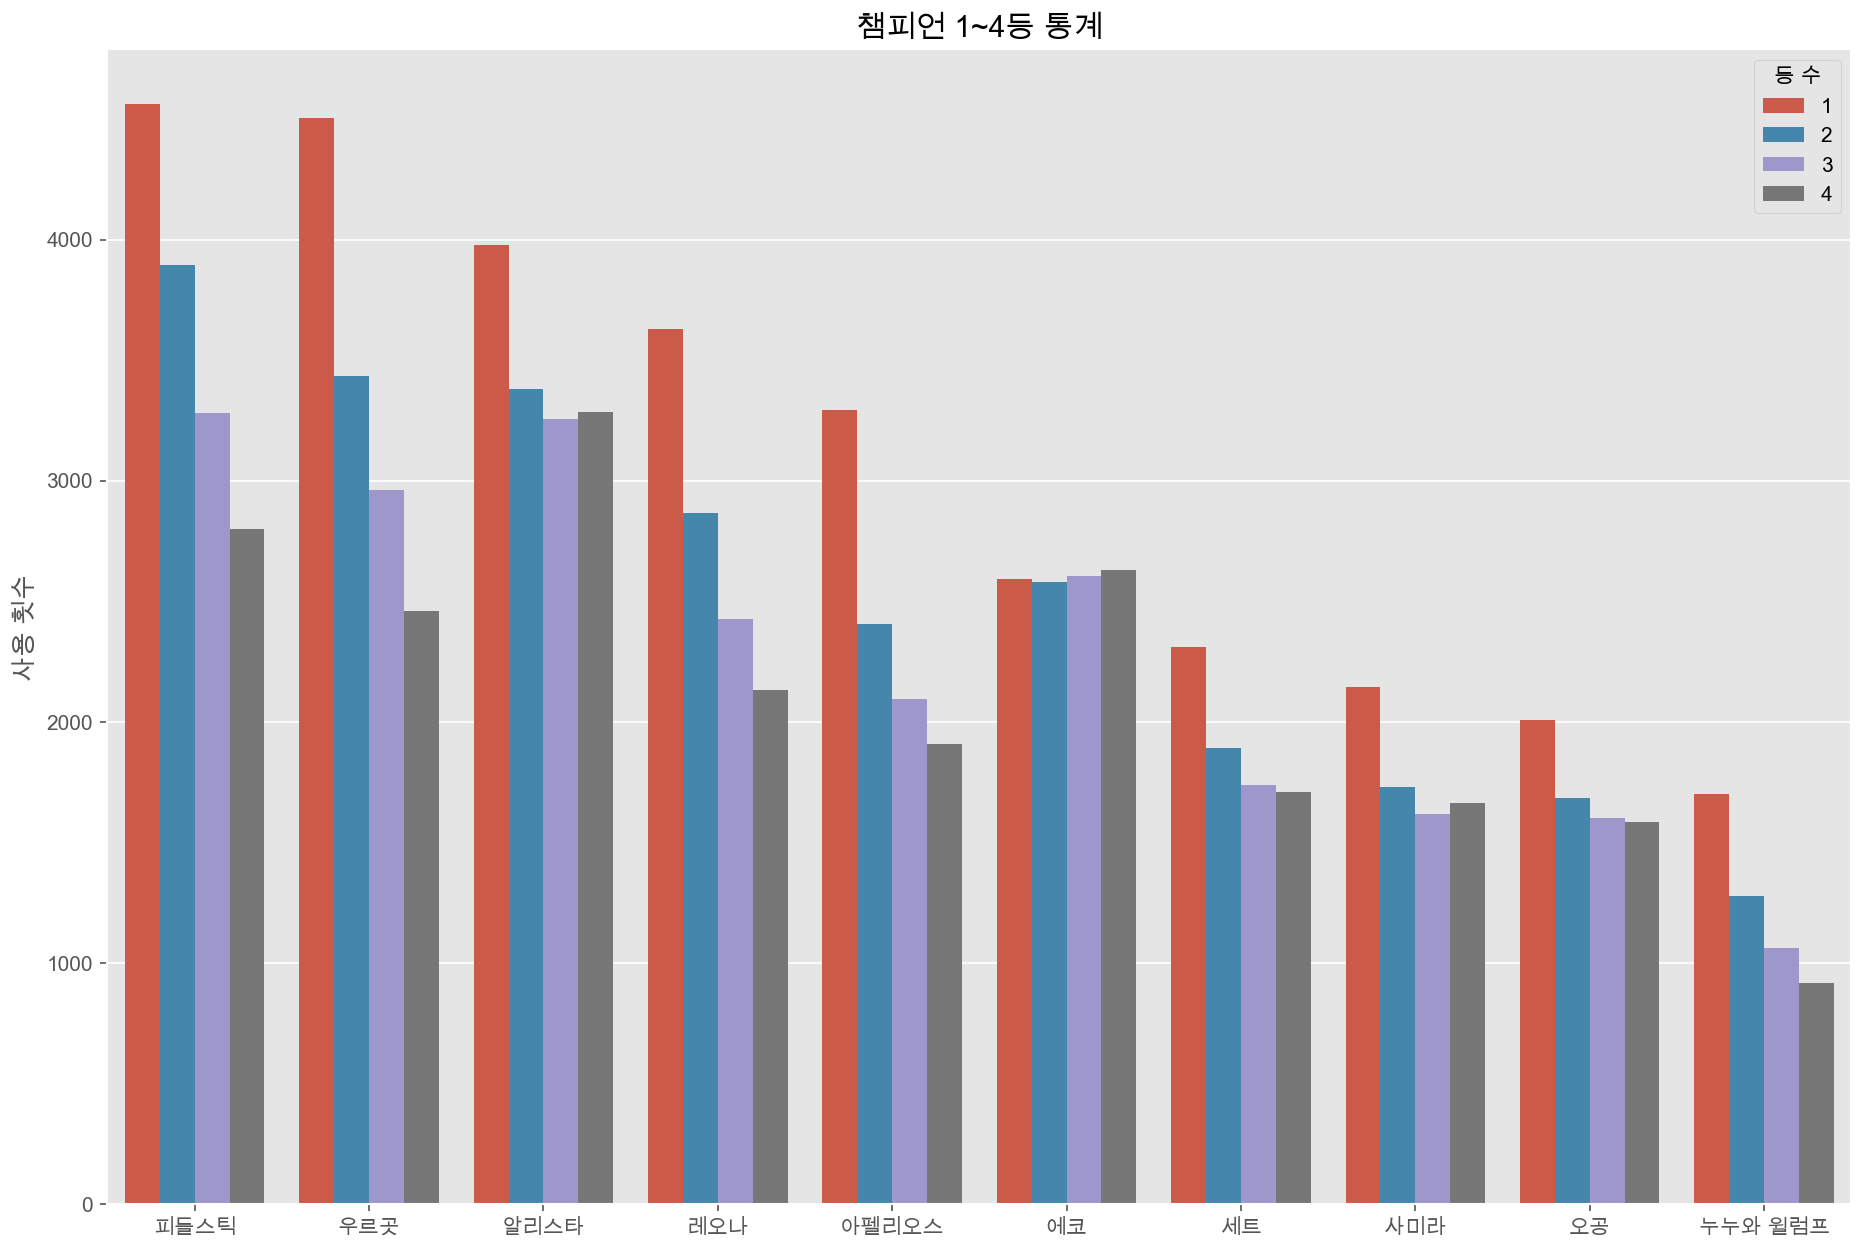



MASTER 통계


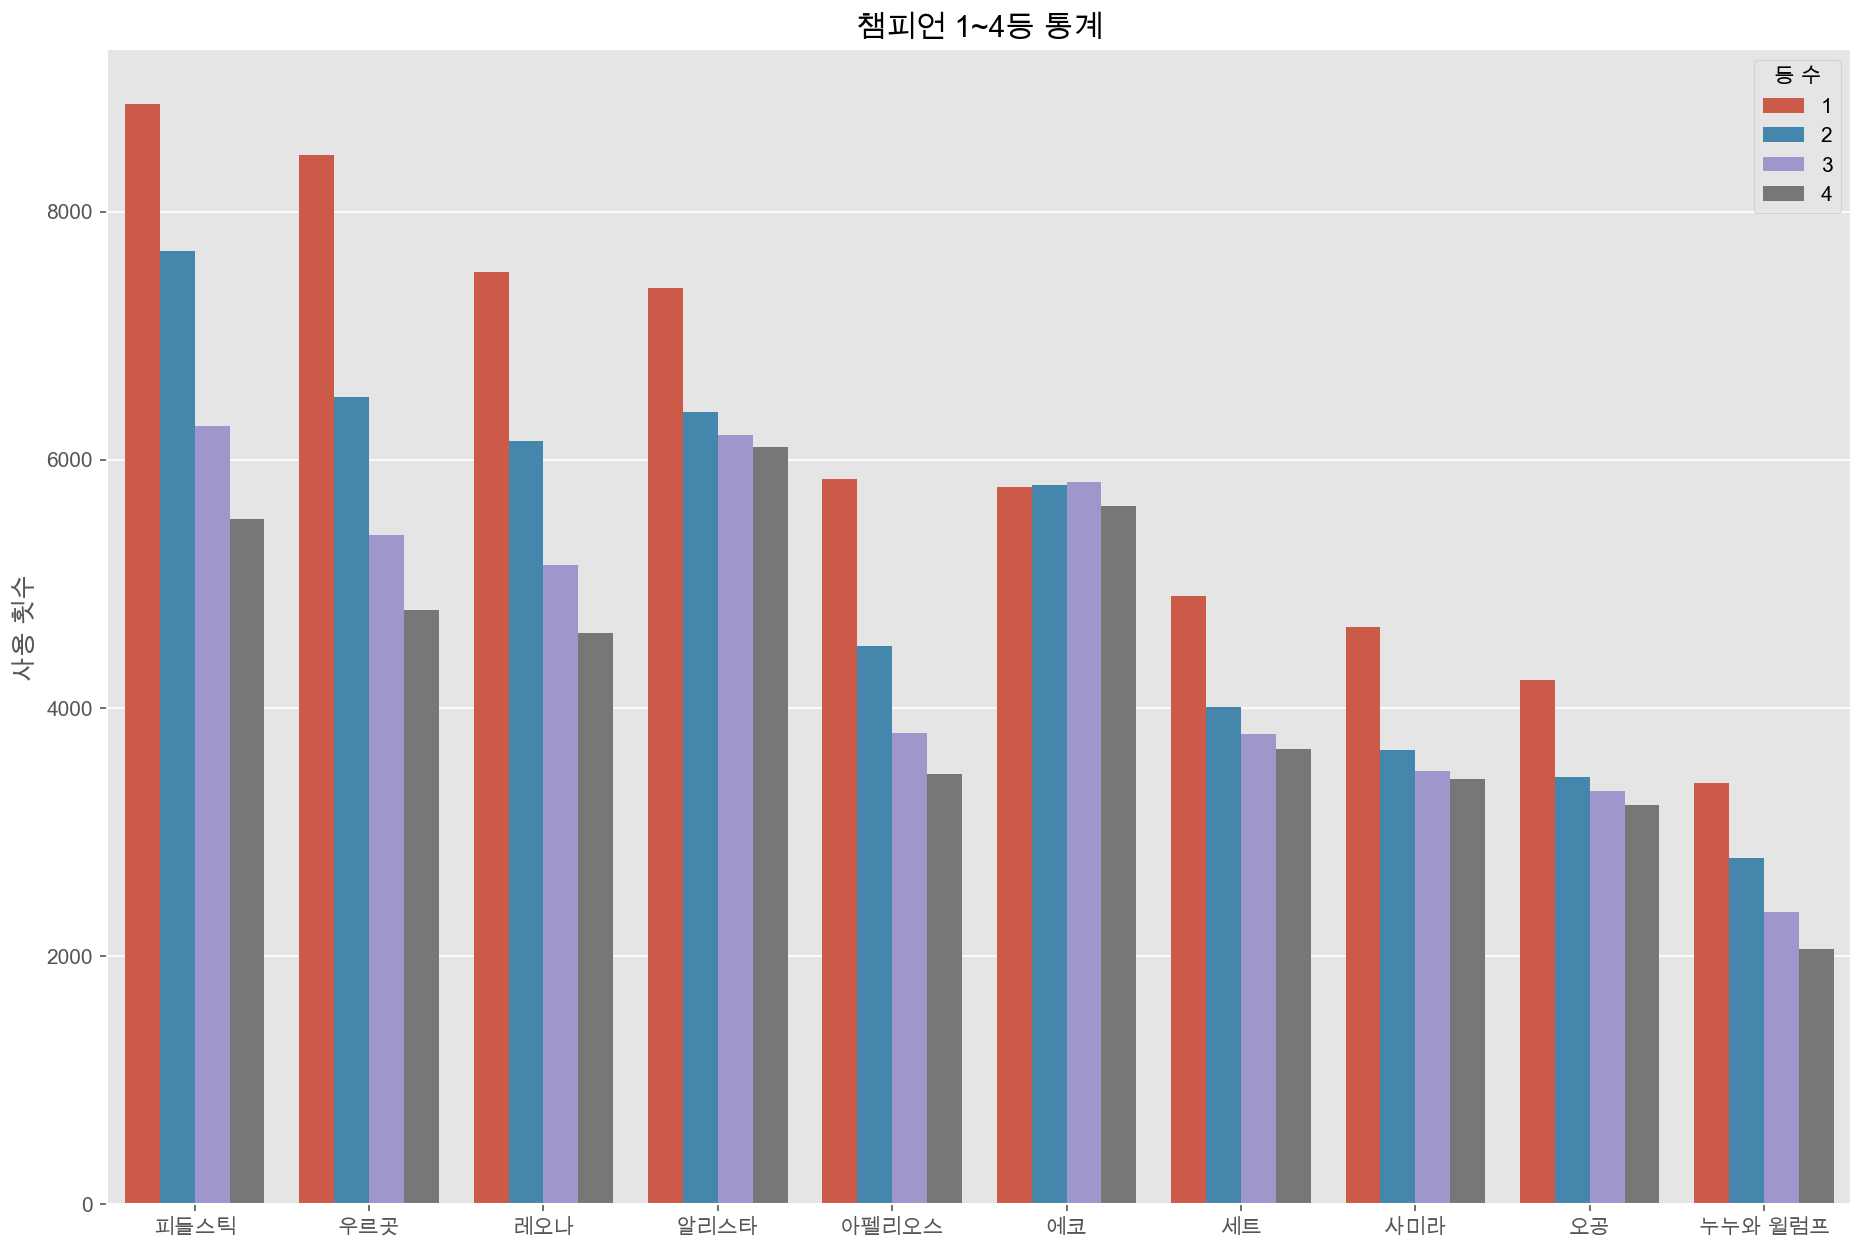



DIAMOND 통계


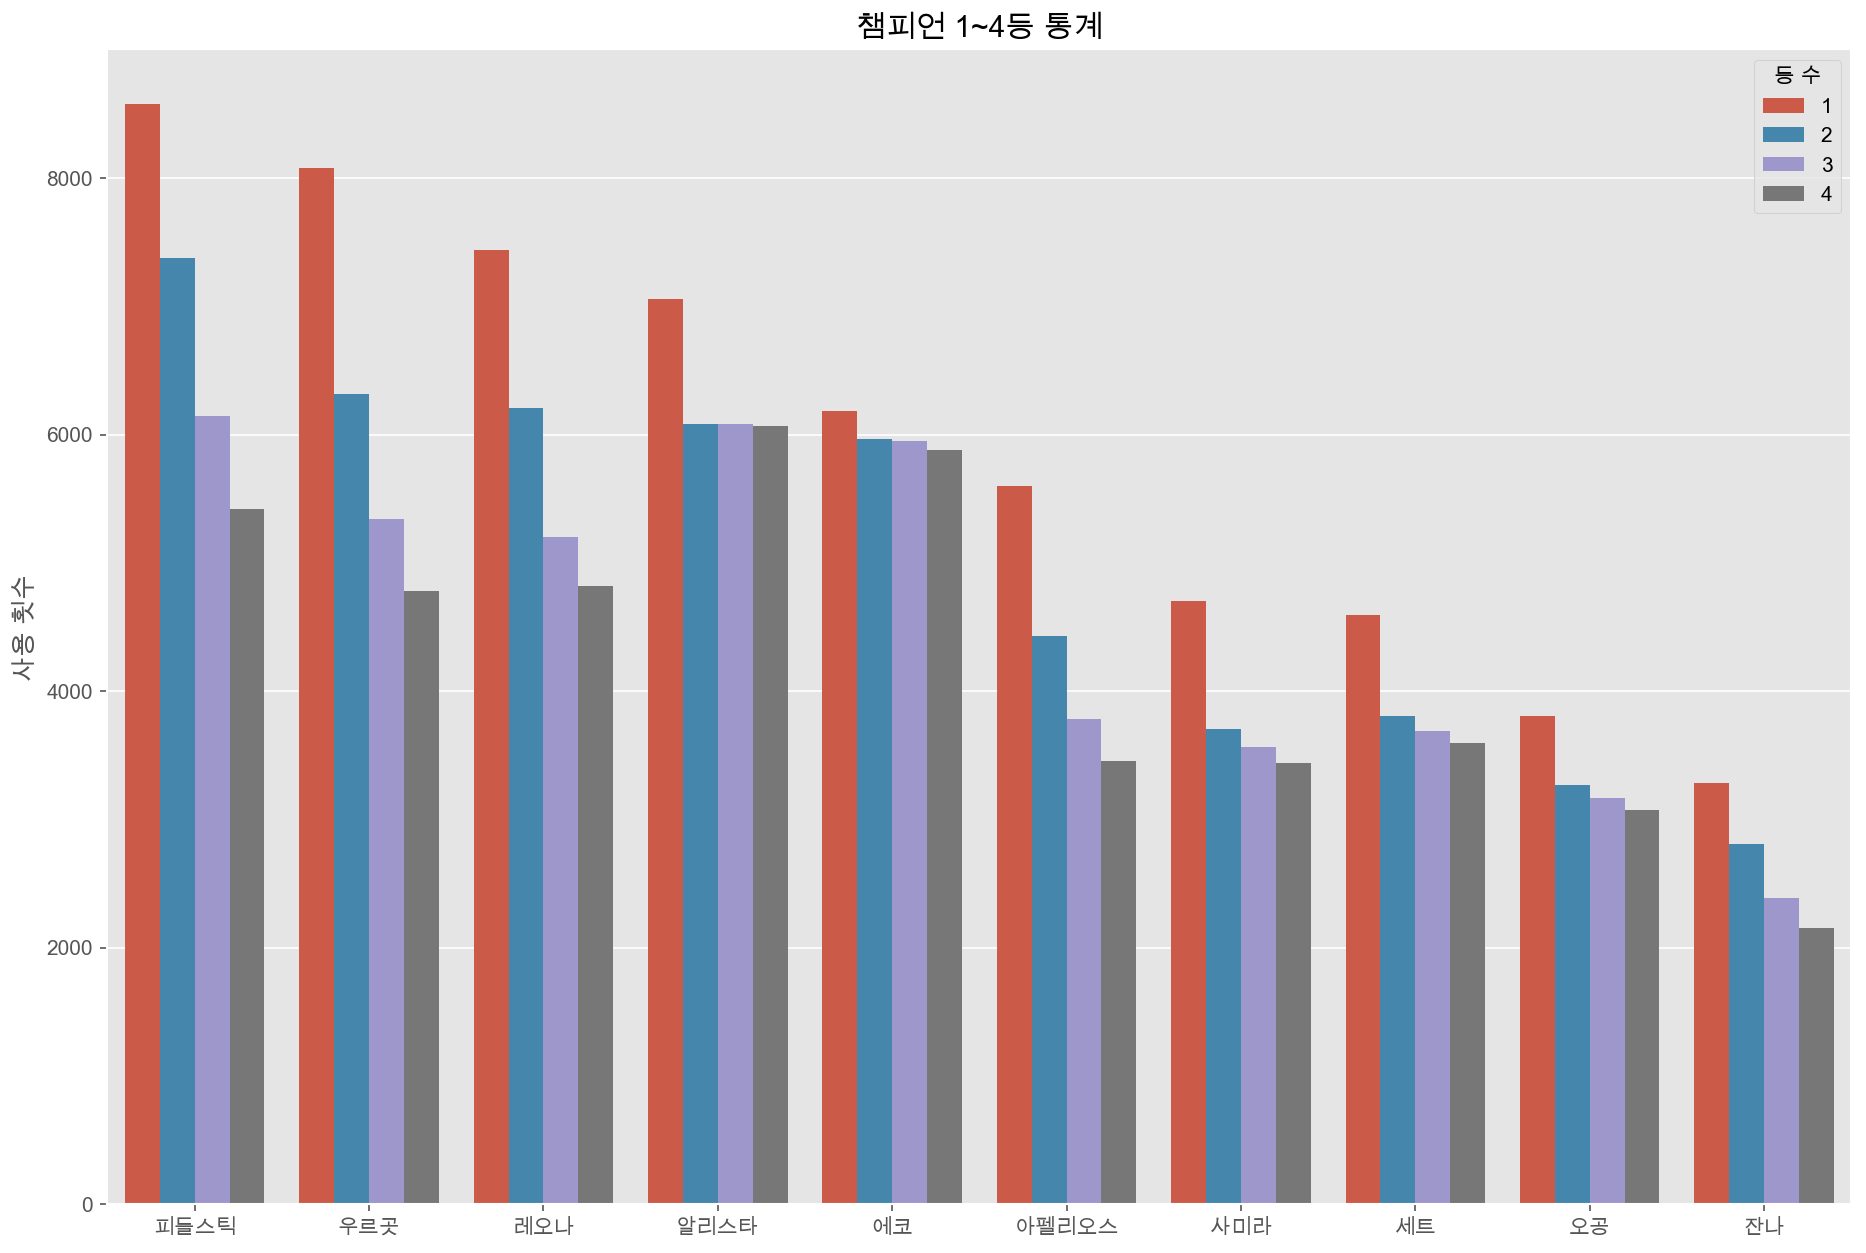



PLATINUM 통계


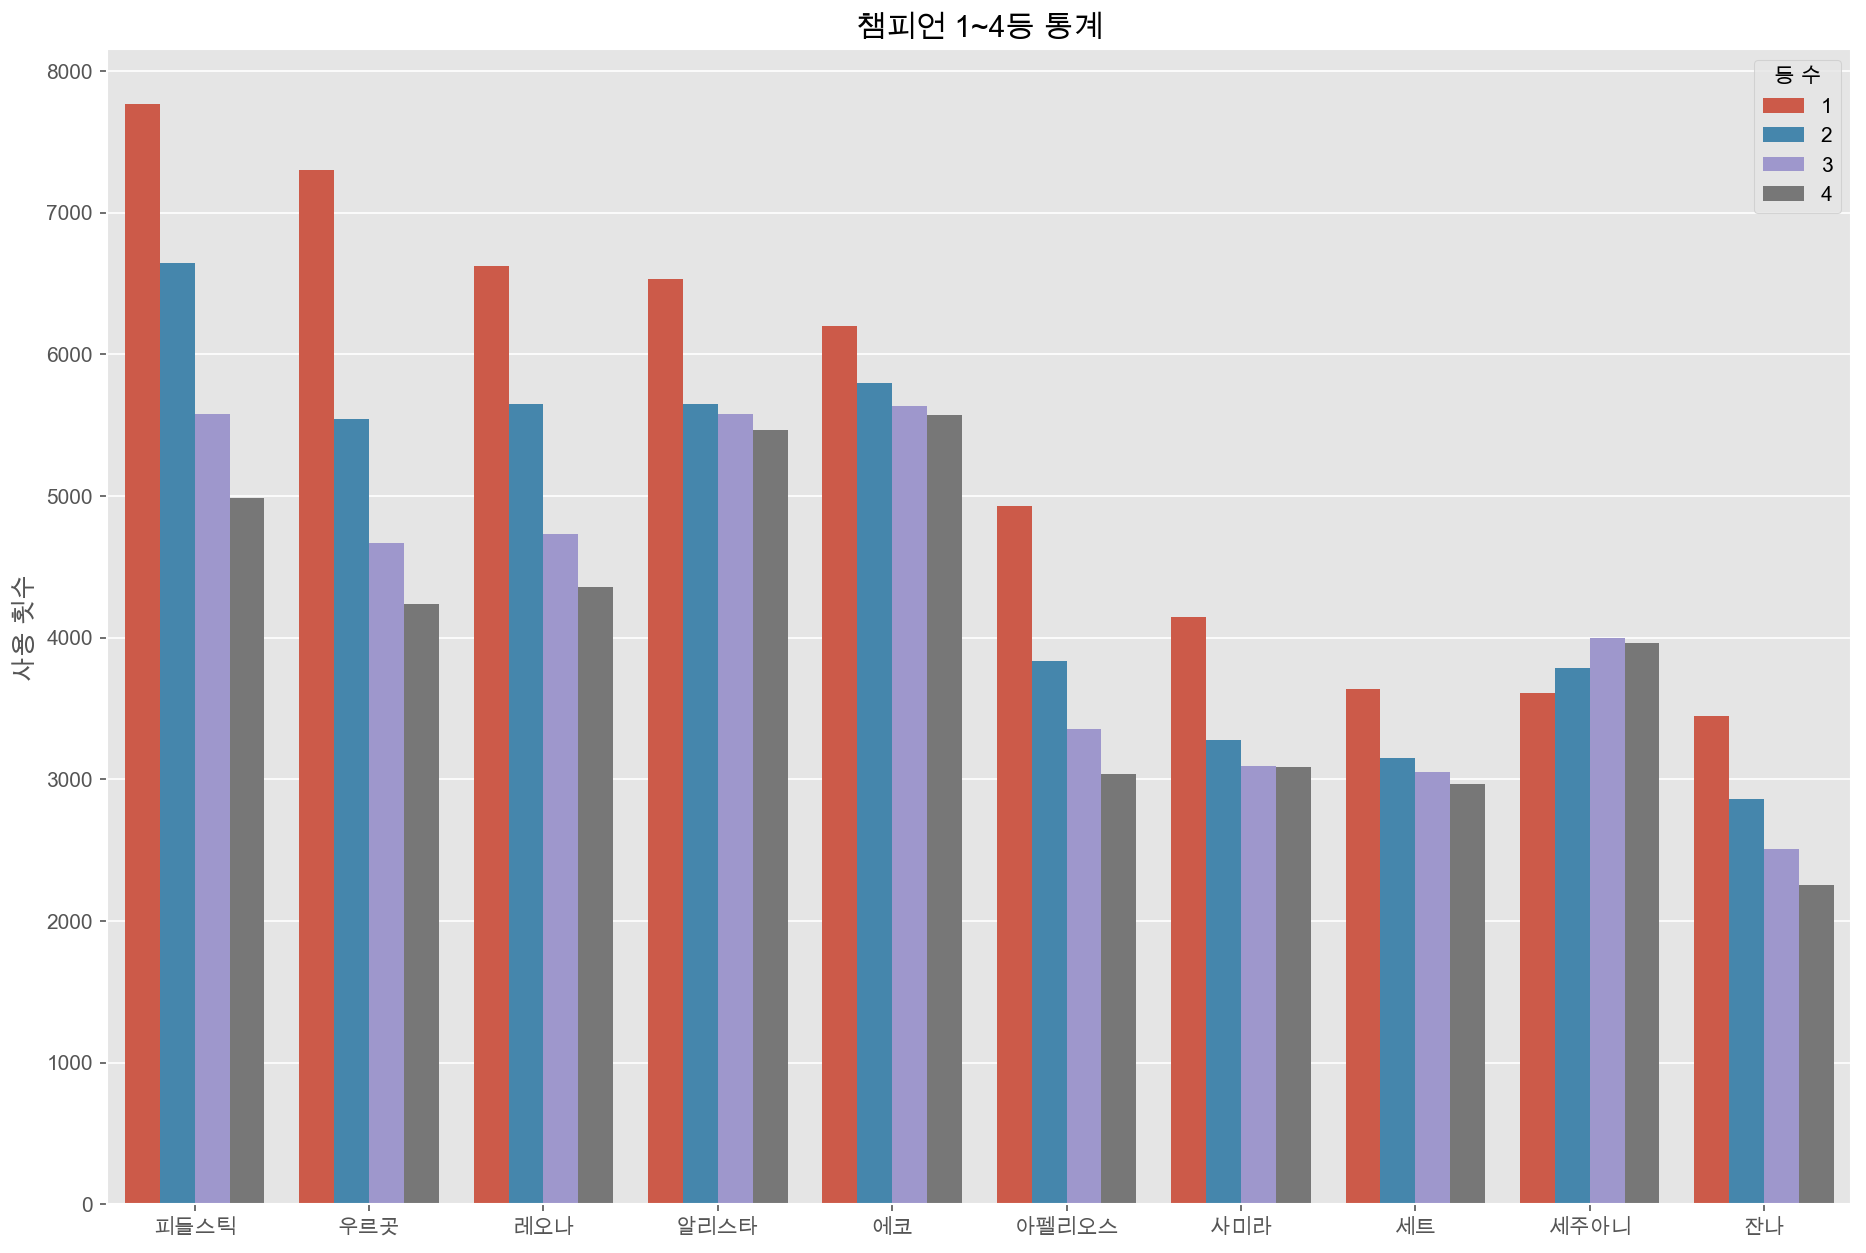



GOLD 통계


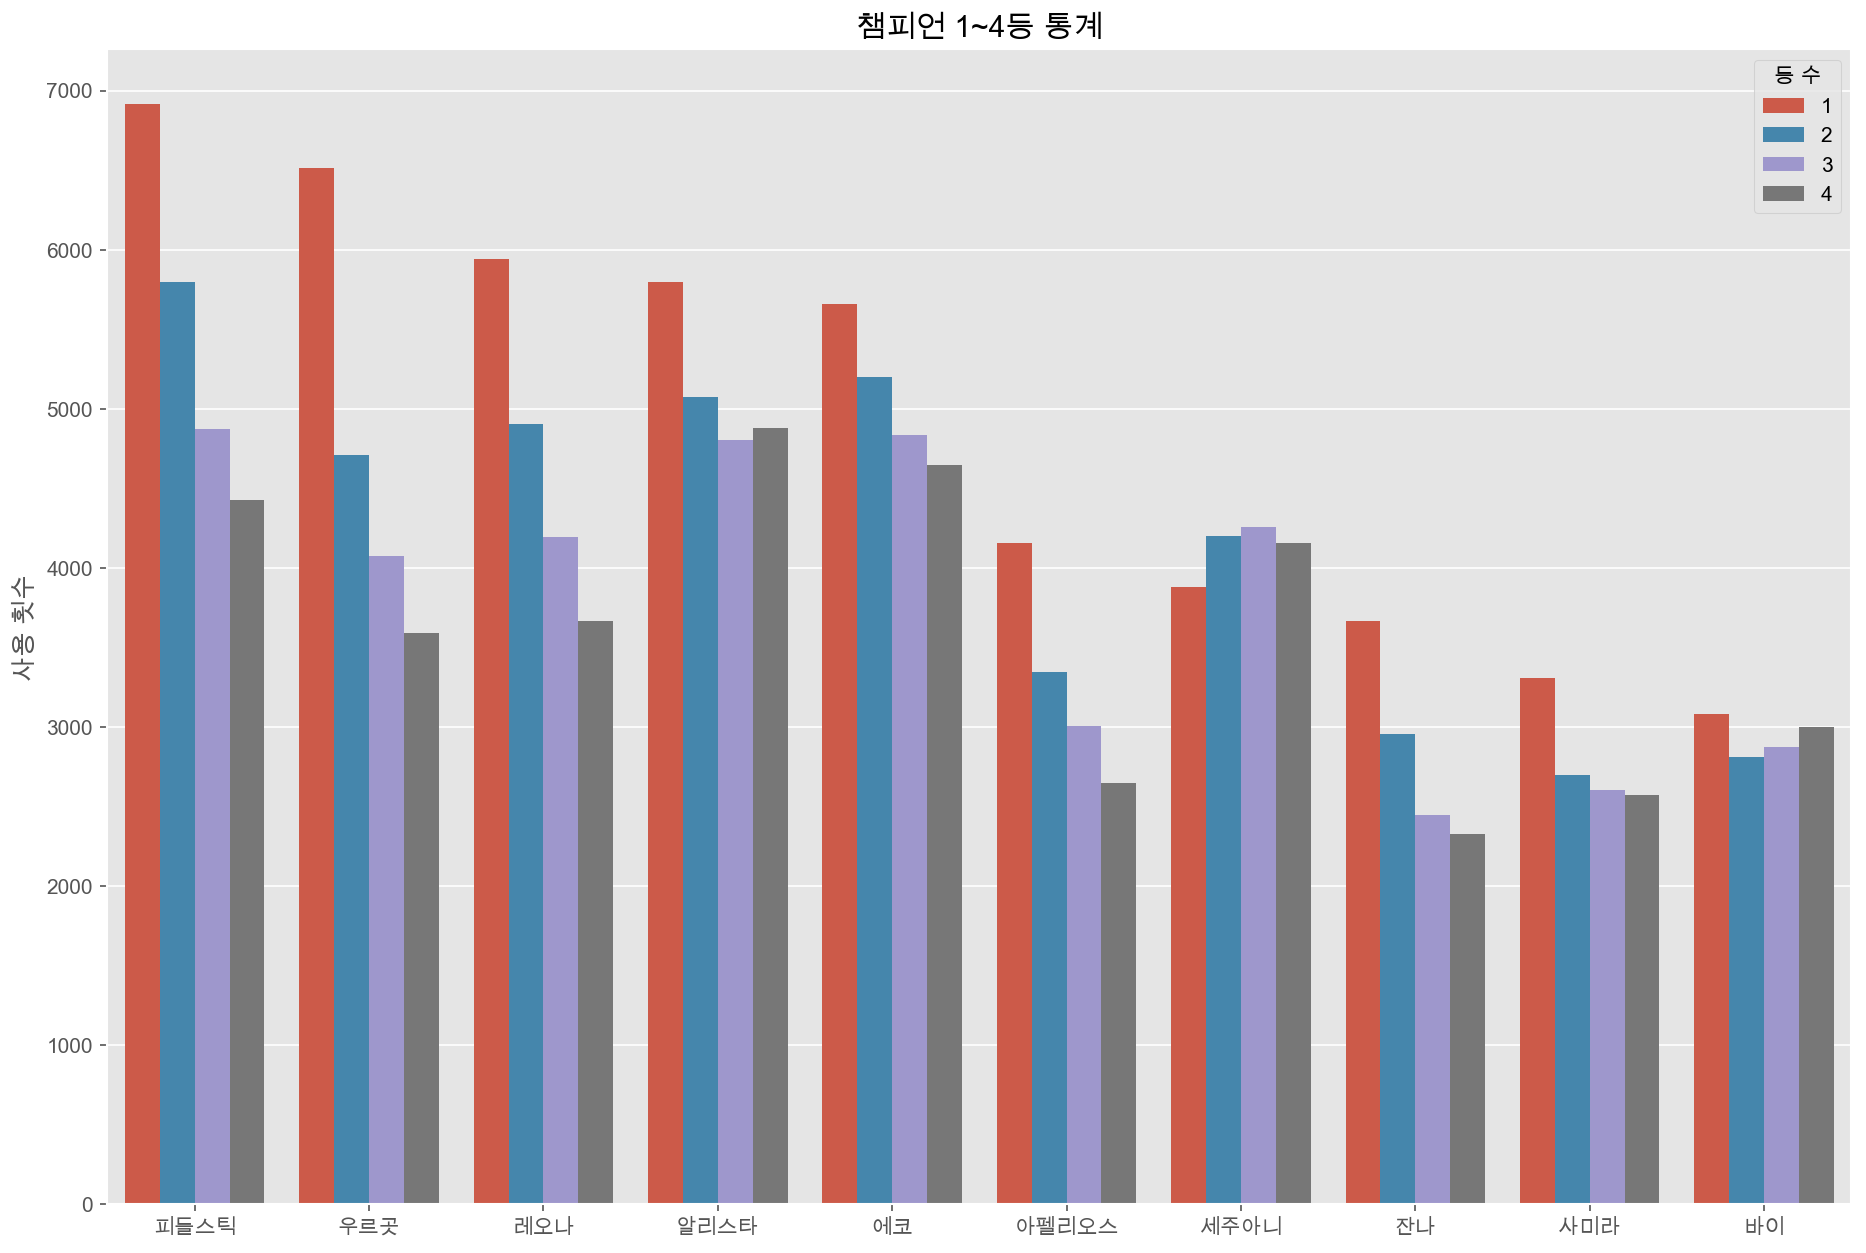



SILVER 통계


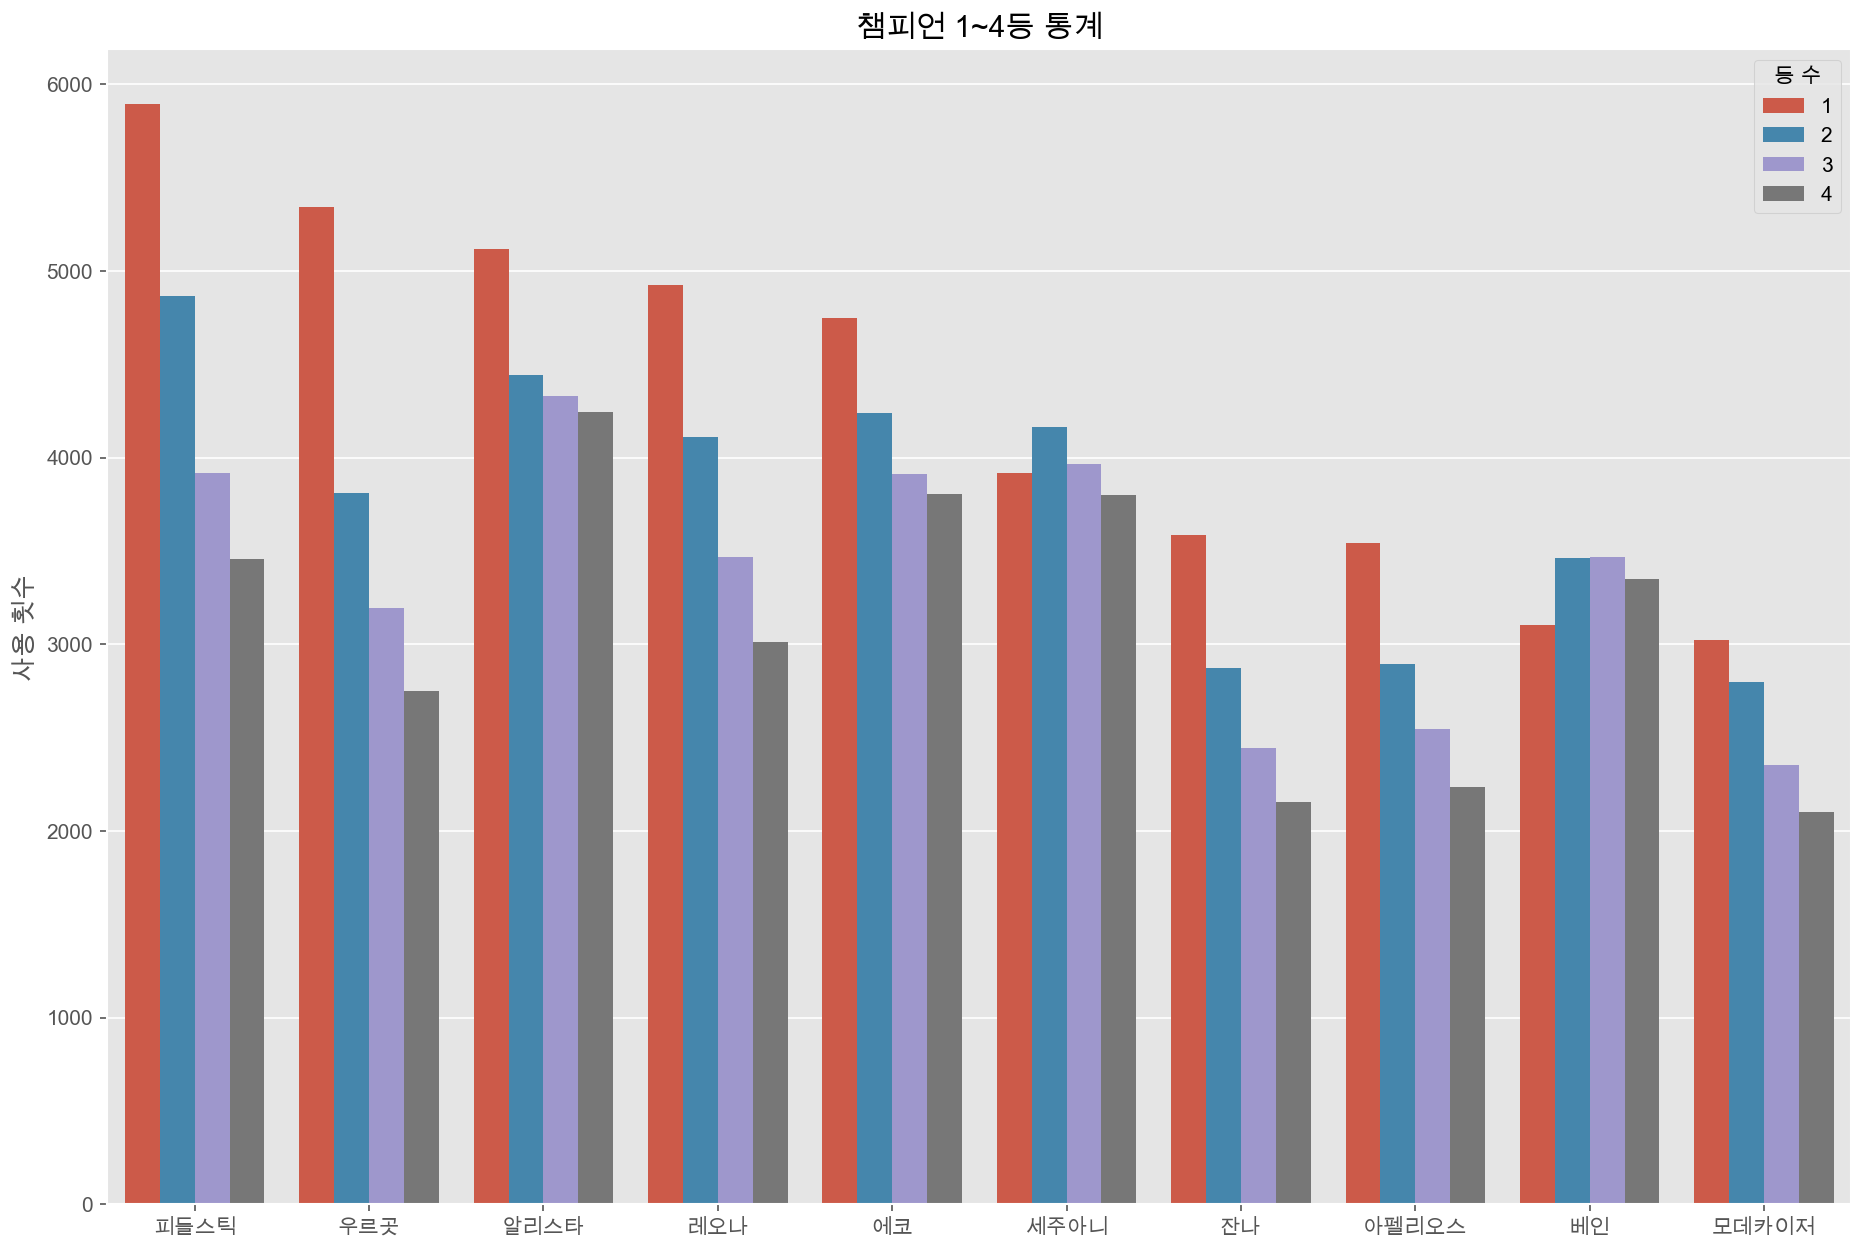



BRONZE 통계


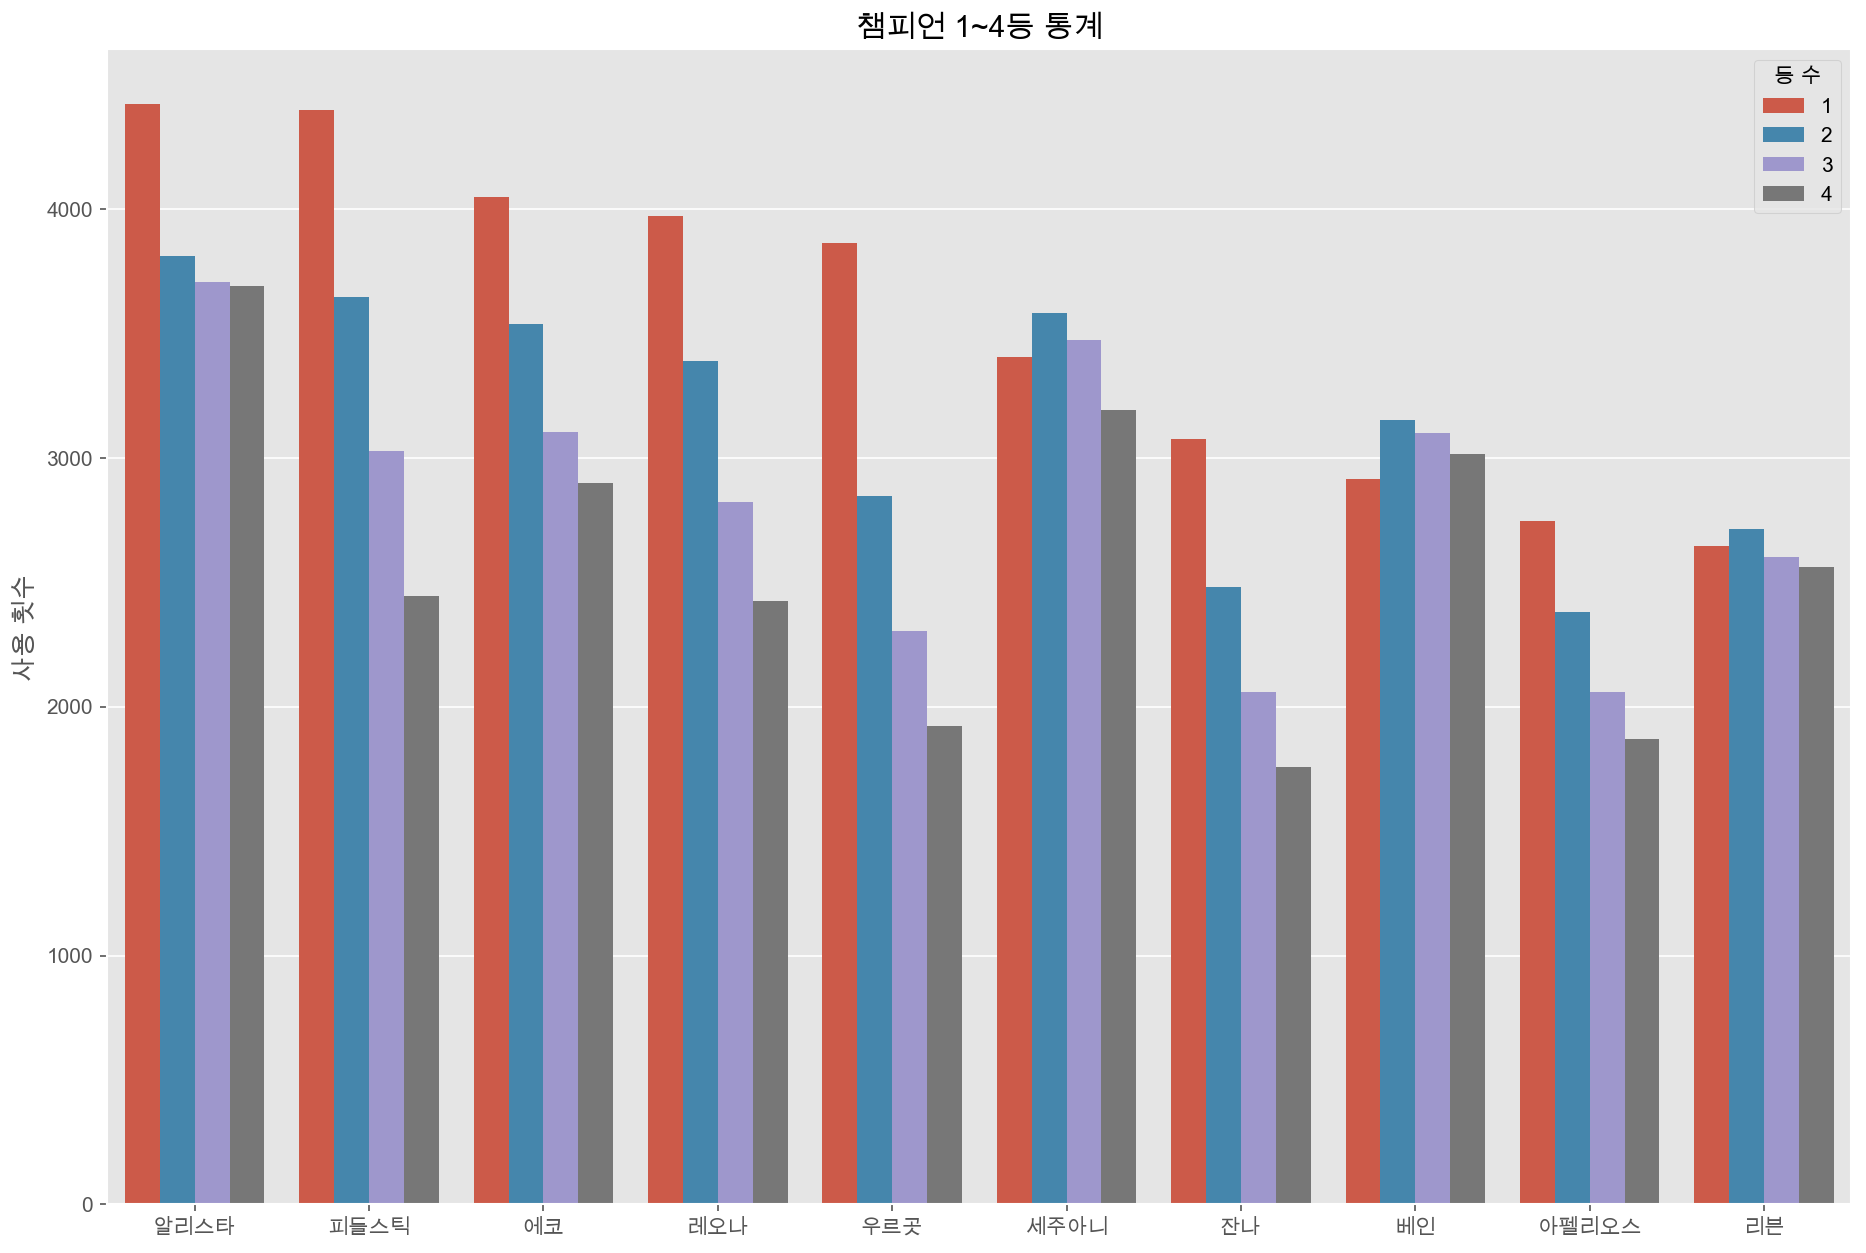



IRON 통계


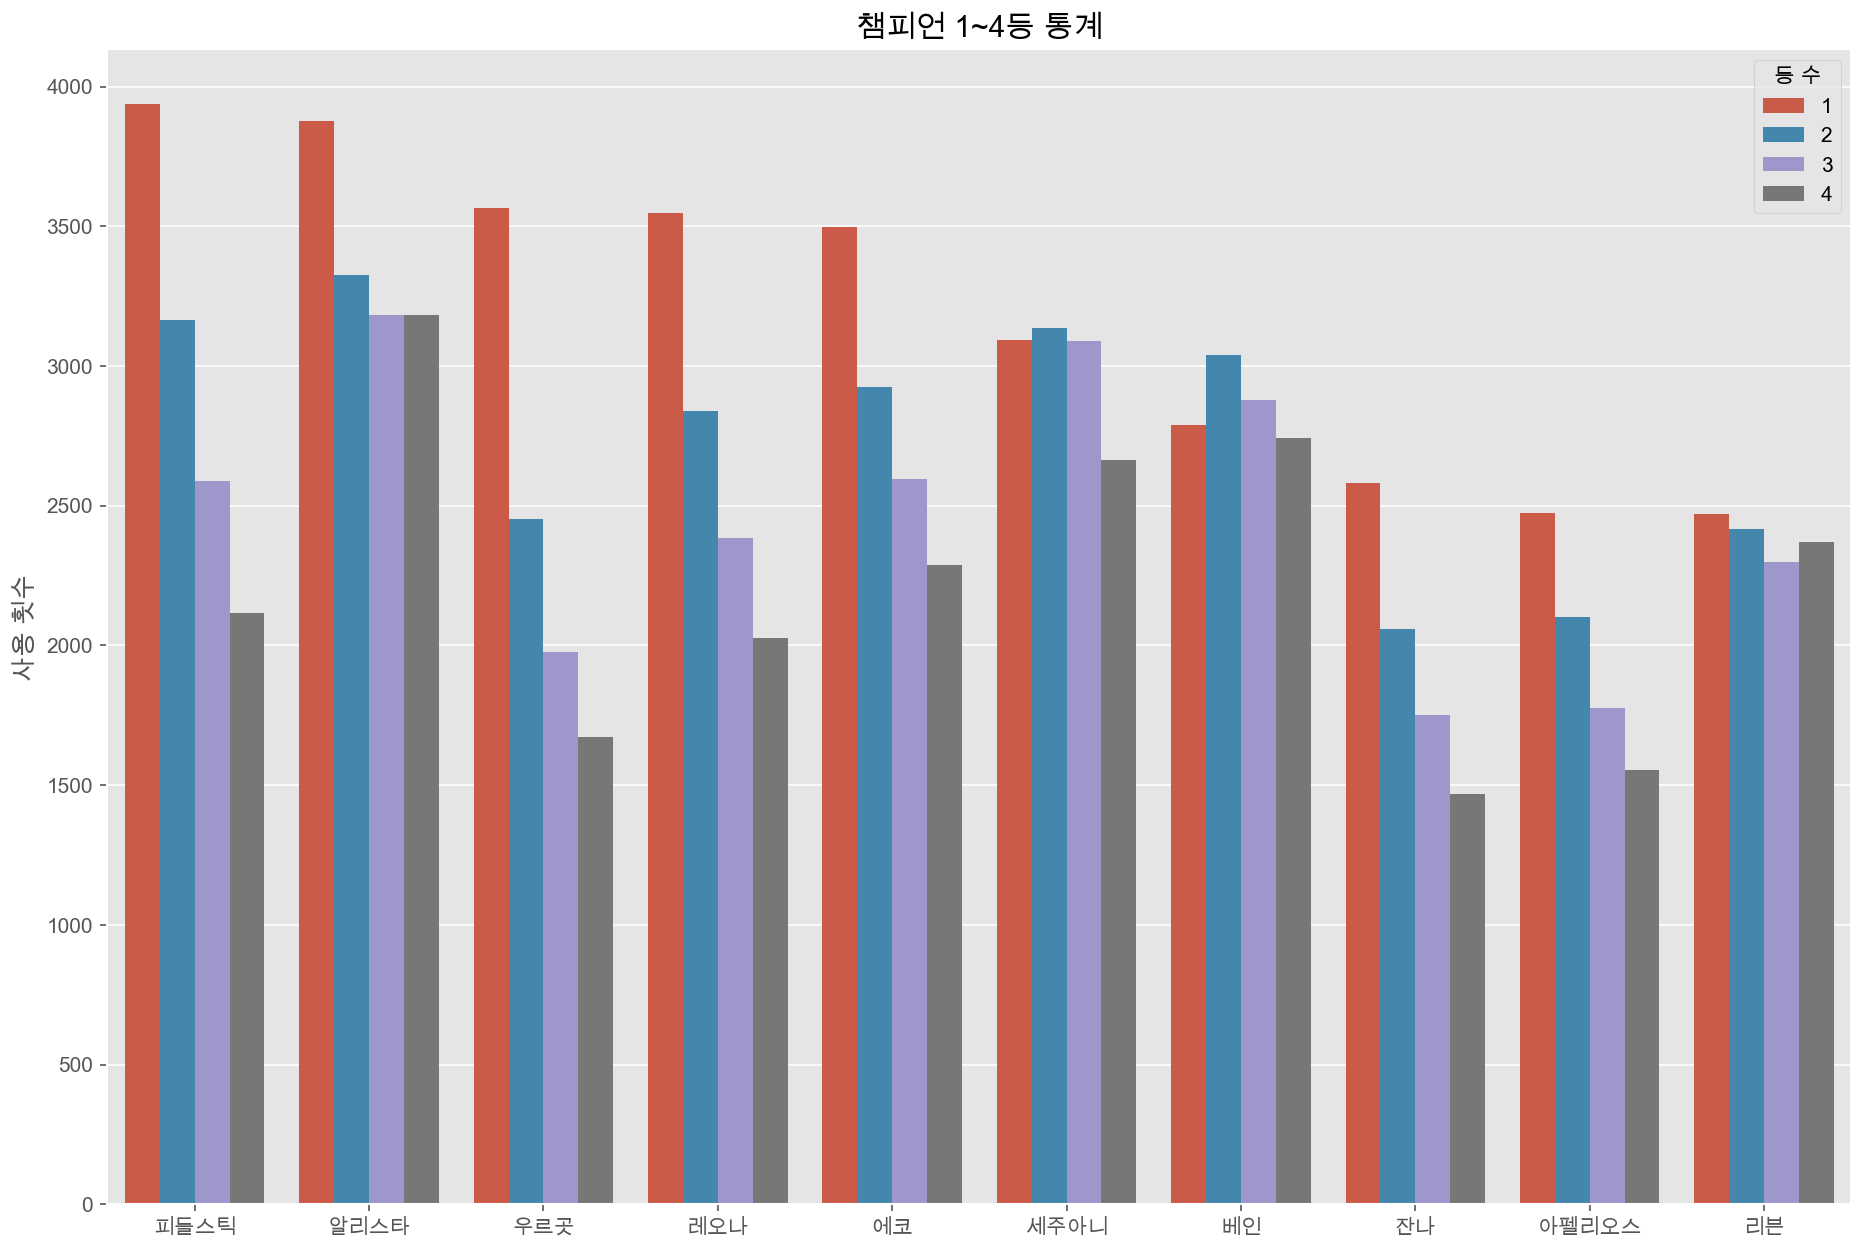

In [26]:
# 유닛 시각화

units_df = pd.DataFrame()

for tier in select_tier:
    tier_idx = int(tier)
    print(pp.tier_dict[tier_idx], "통계")
    tmp = pp.printCols(games[int(tier)], 'units', tier_idx)
    tmp['tier'] = pp.tier_dict[tier_idx]
    units_df = pd.concat([units_df, tmp])
    print()
    print()

#### 1등을 많이한 유닛의 티어별 승률

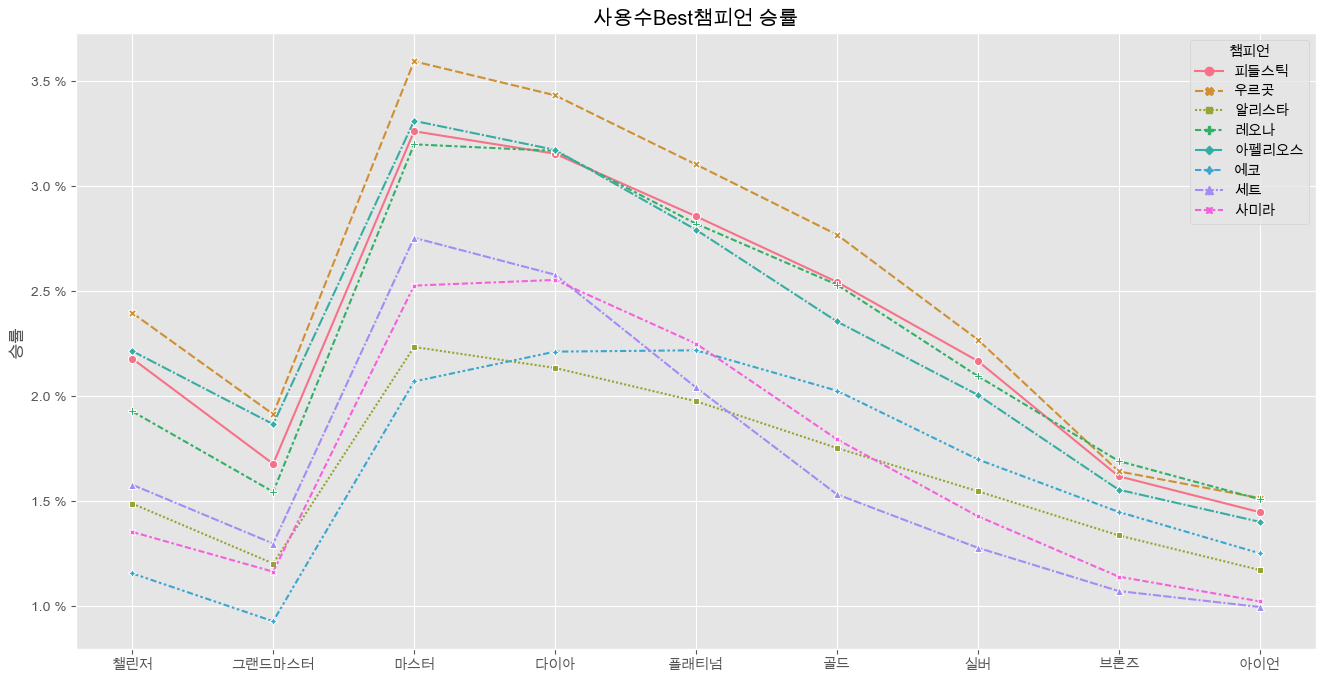

In [27]:
pp.draw_1Place(units_df, 'units')

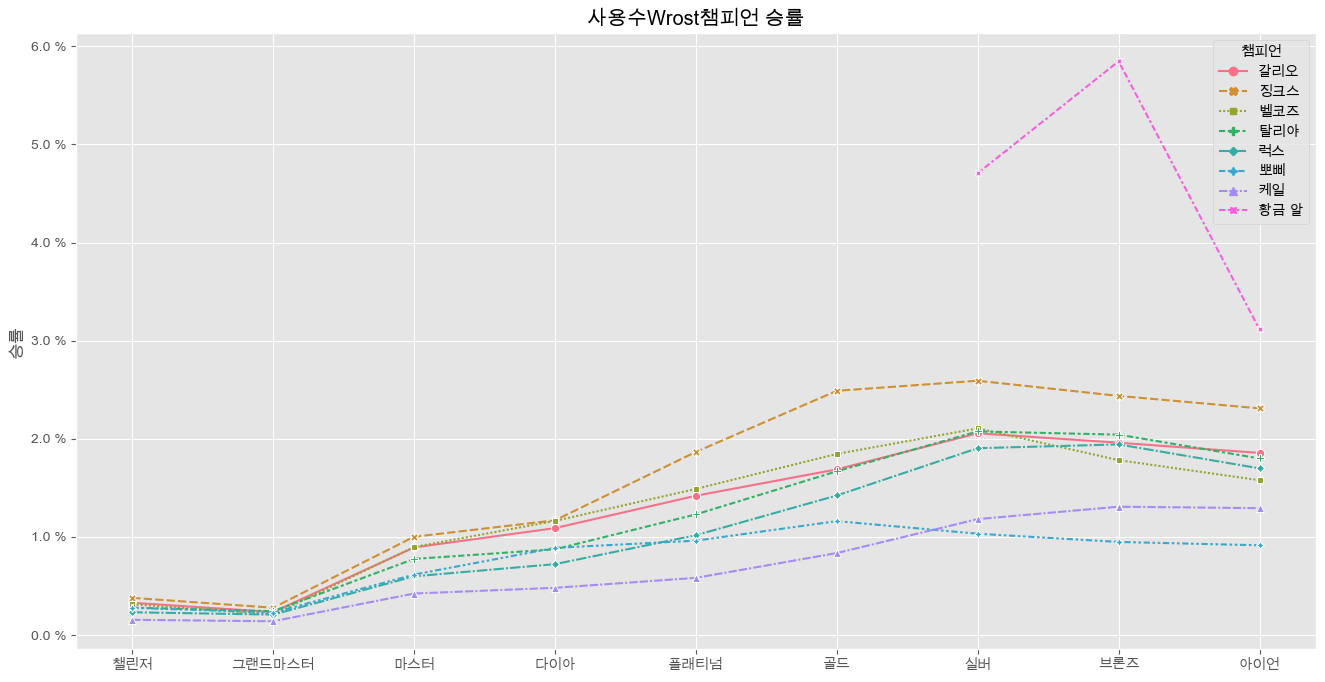

In [225]:
pp.draw_1Place(units_df, 'units', False)

~~~
증강보다는 유닛이 1등에 좀 더 크게 영향을 주고 있음을 알 수 있었다.

그렇다면 주로 사용되는 8가지 유닛들에게 어떤 증강이 좋은지 알아보자.
~~~

### 많이 사용되는 챔피언이 어떤 증강을 사용해야 좋을까?

[  알리스타  ]


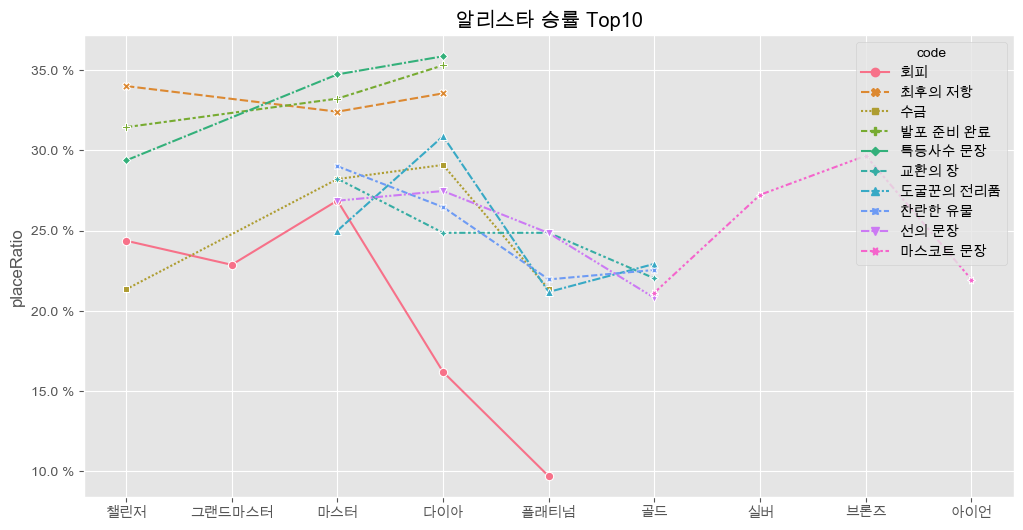

In [31]:
units = [pp.tft_dict['units'][pp.tft_dict['units']['korName'] == x].index[0] for x in ['알리스타']]

for unit in units:
    print('[ ',pp.tft_dict['units'].iloc[unit]['korName'], ' ]')
    unitAugs = pd.DataFrame()
    for tier in select_tier:
        tier_idx = int(tier)
        tmp = pp.getUnitAugs(games[int(tier)], unit)
        tmp['tier'] = pp.tier_dict[tier_idx]
        unitAugs = pd.concat([unitAugs, tmp])
        
    pp.drawUnitAgus(unitAugs, unit)

### 많이 사용되는 챔피언에게 어떤 아이템을 주는게 좋을까?

[ 알리스타 등수별 아이템 통계 ] in 챌린저


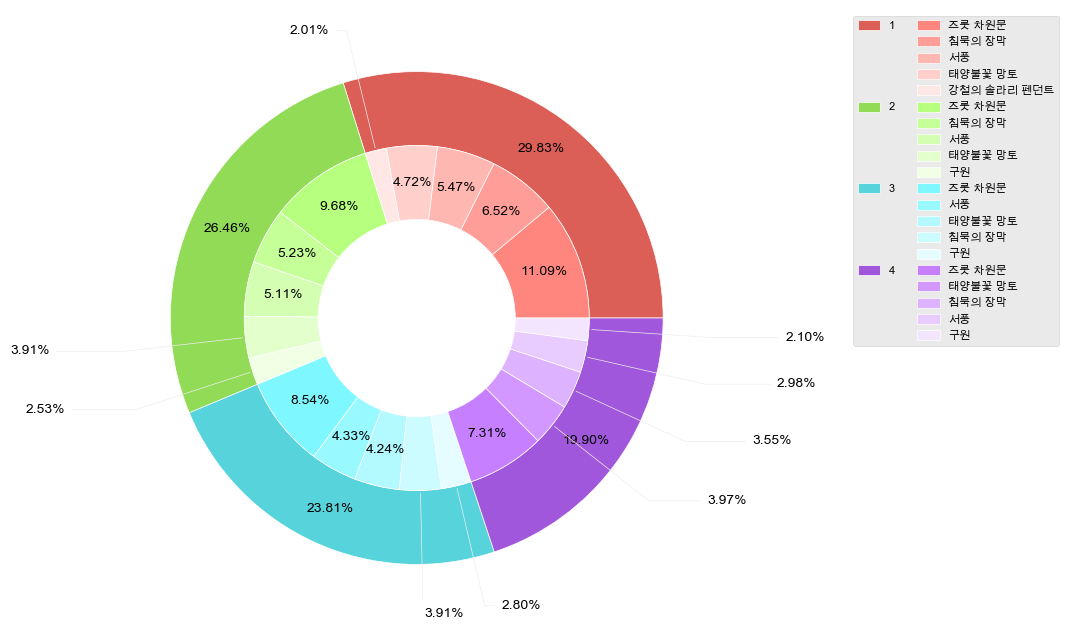

[ 알리스타 등수별 아이템 통계 ] in 그랜드마스터


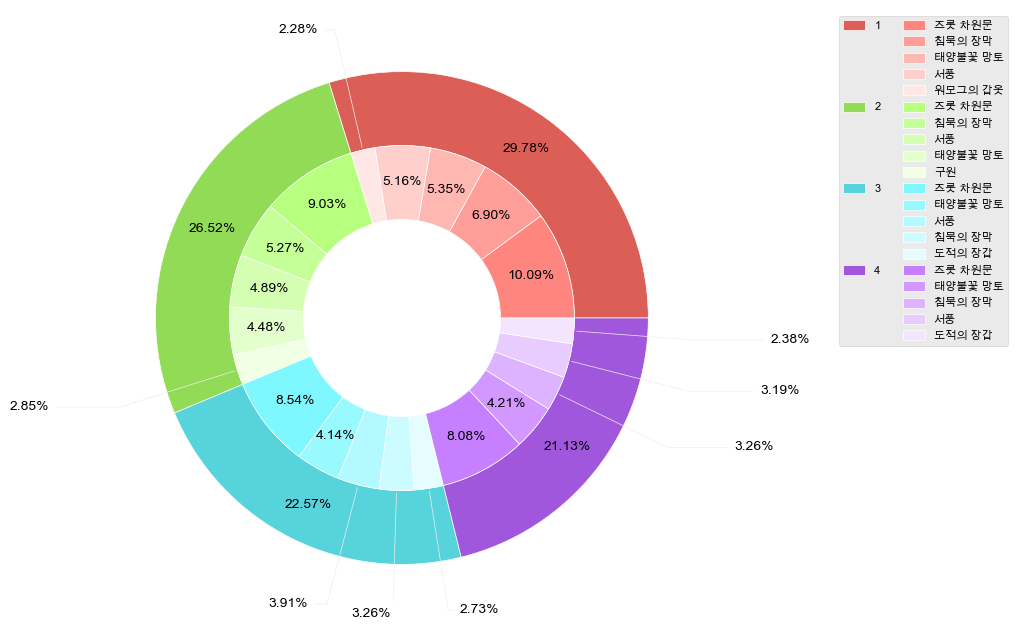

[ 알리스타 등수별 아이템 통계 ] in 마스터


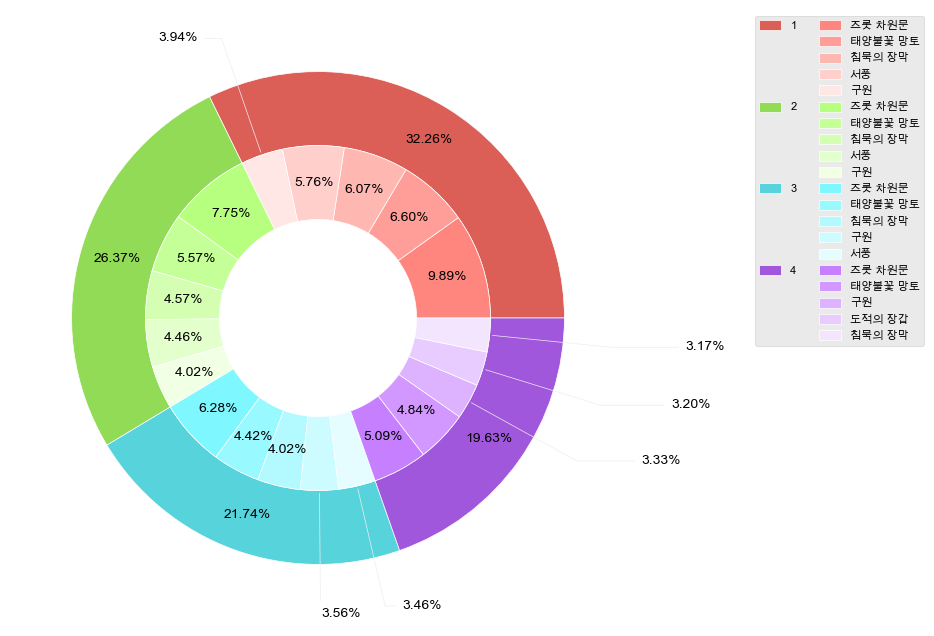

[ 알리스타 등수별 아이템 통계 ] in 다이아


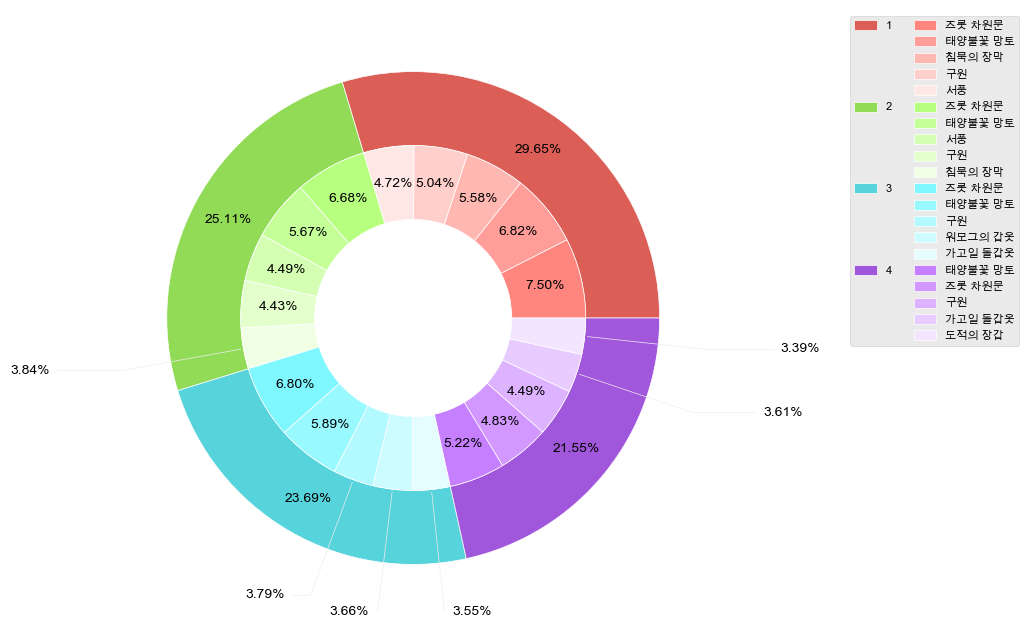

[ 알리스타 등수별 아이템 통계 ] in 플래티넘


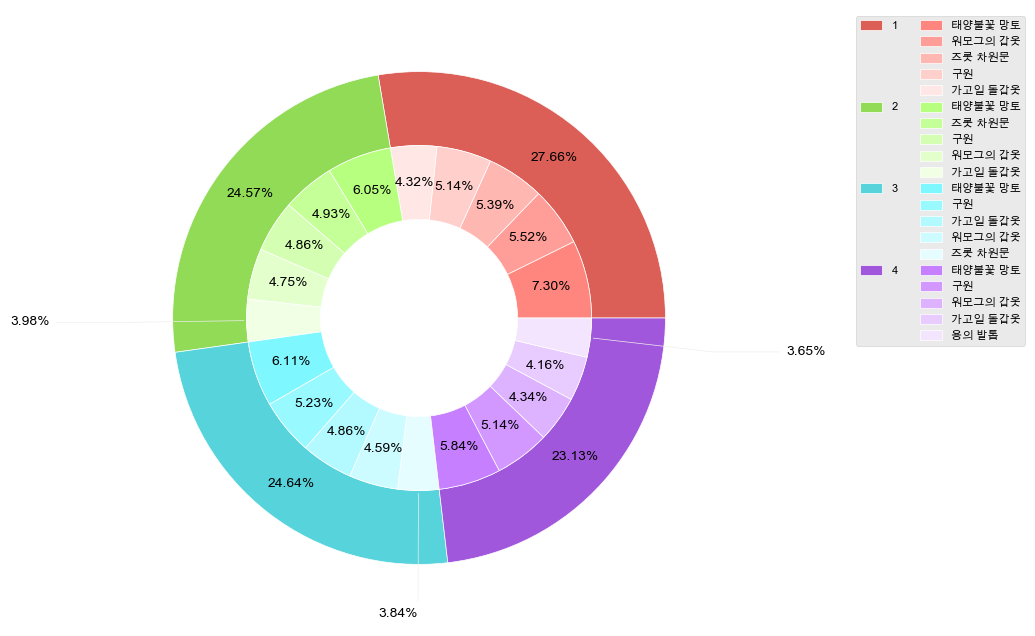

[ 알리스타 등수별 아이템 통계 ] in 골드


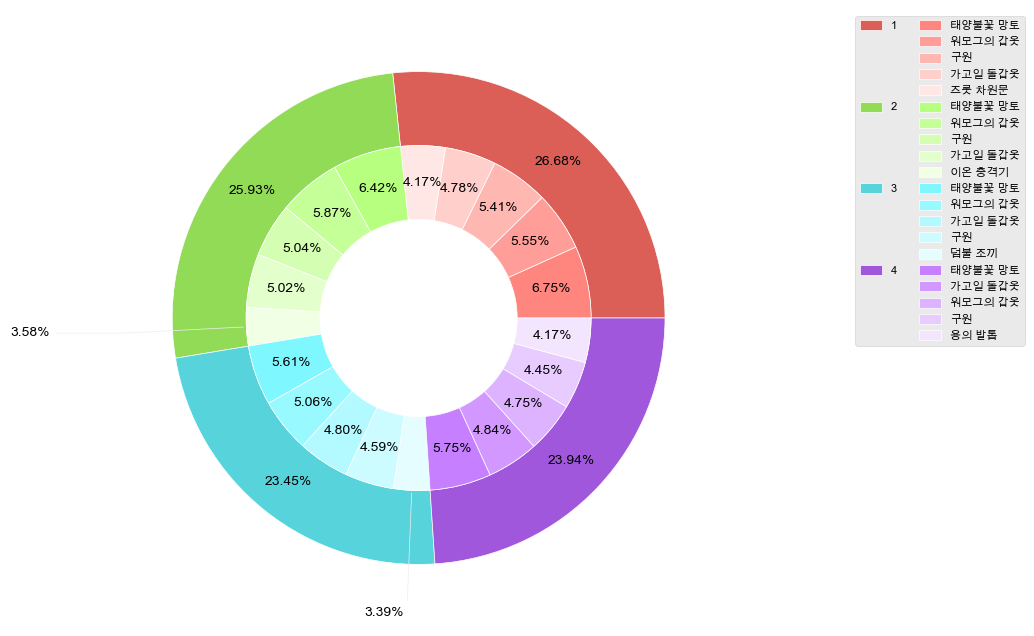

[ 알리스타 등수별 아이템 통계 ] in 실버


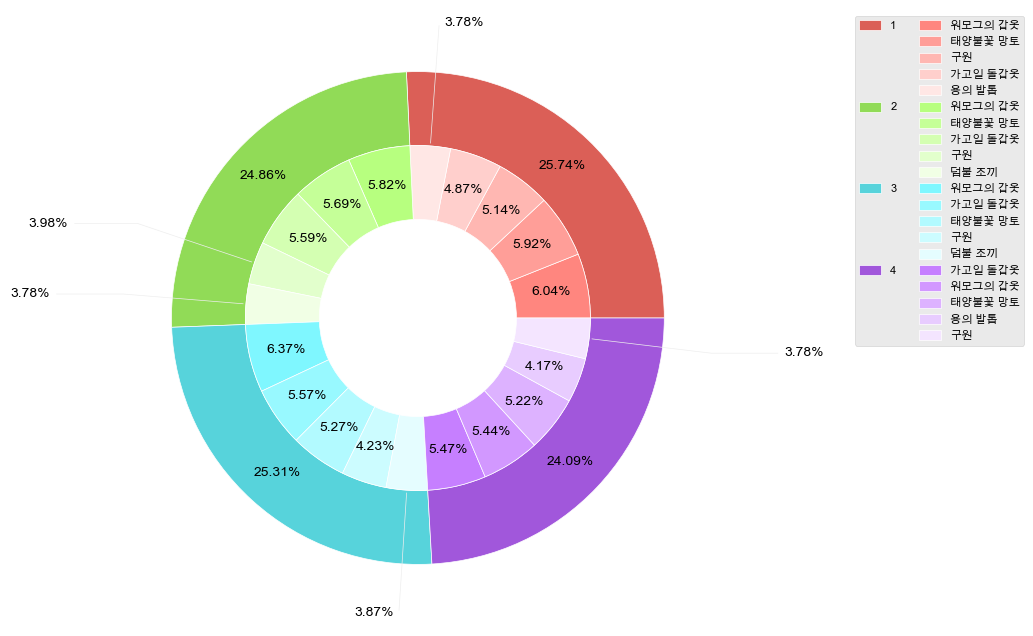

[ 알리스타 등수별 아이템 통계 ] in 브론즈


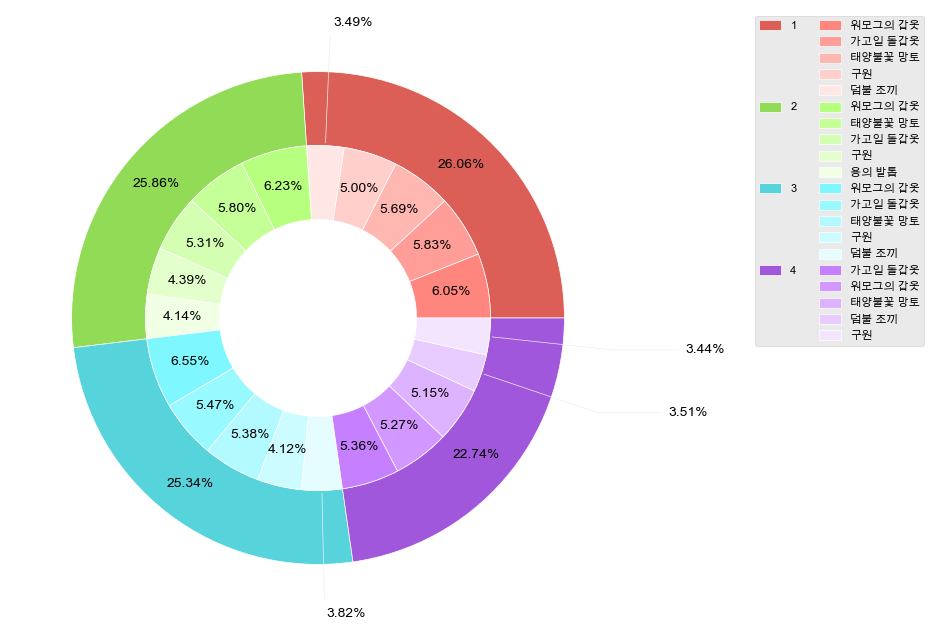

[ 알리스타 등수별 아이템 통계 ] in 아이언


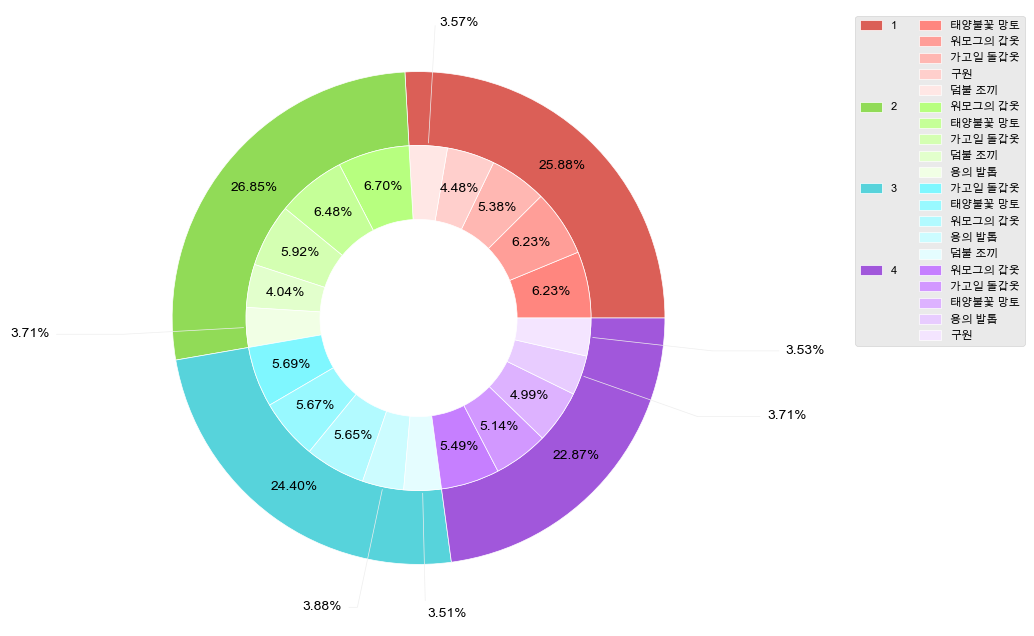

In [37]:
for unit_code in units:
    for idx, game in enumerate(games):
        print('[ {} 등수별 아이템 통계 ] in {}'.format(pp.tft_dict['units'].iloc[unit_code]['korName'], pp.kor_tier_dict[idx]))
        pp.printUnitItems(game, unit_code, idx)
        
    break # 유닛 전체가 보고 싶다면 주석처리

### 순위방어(~4위)를 많이 하는 특성은??

CHALLENGER 통계


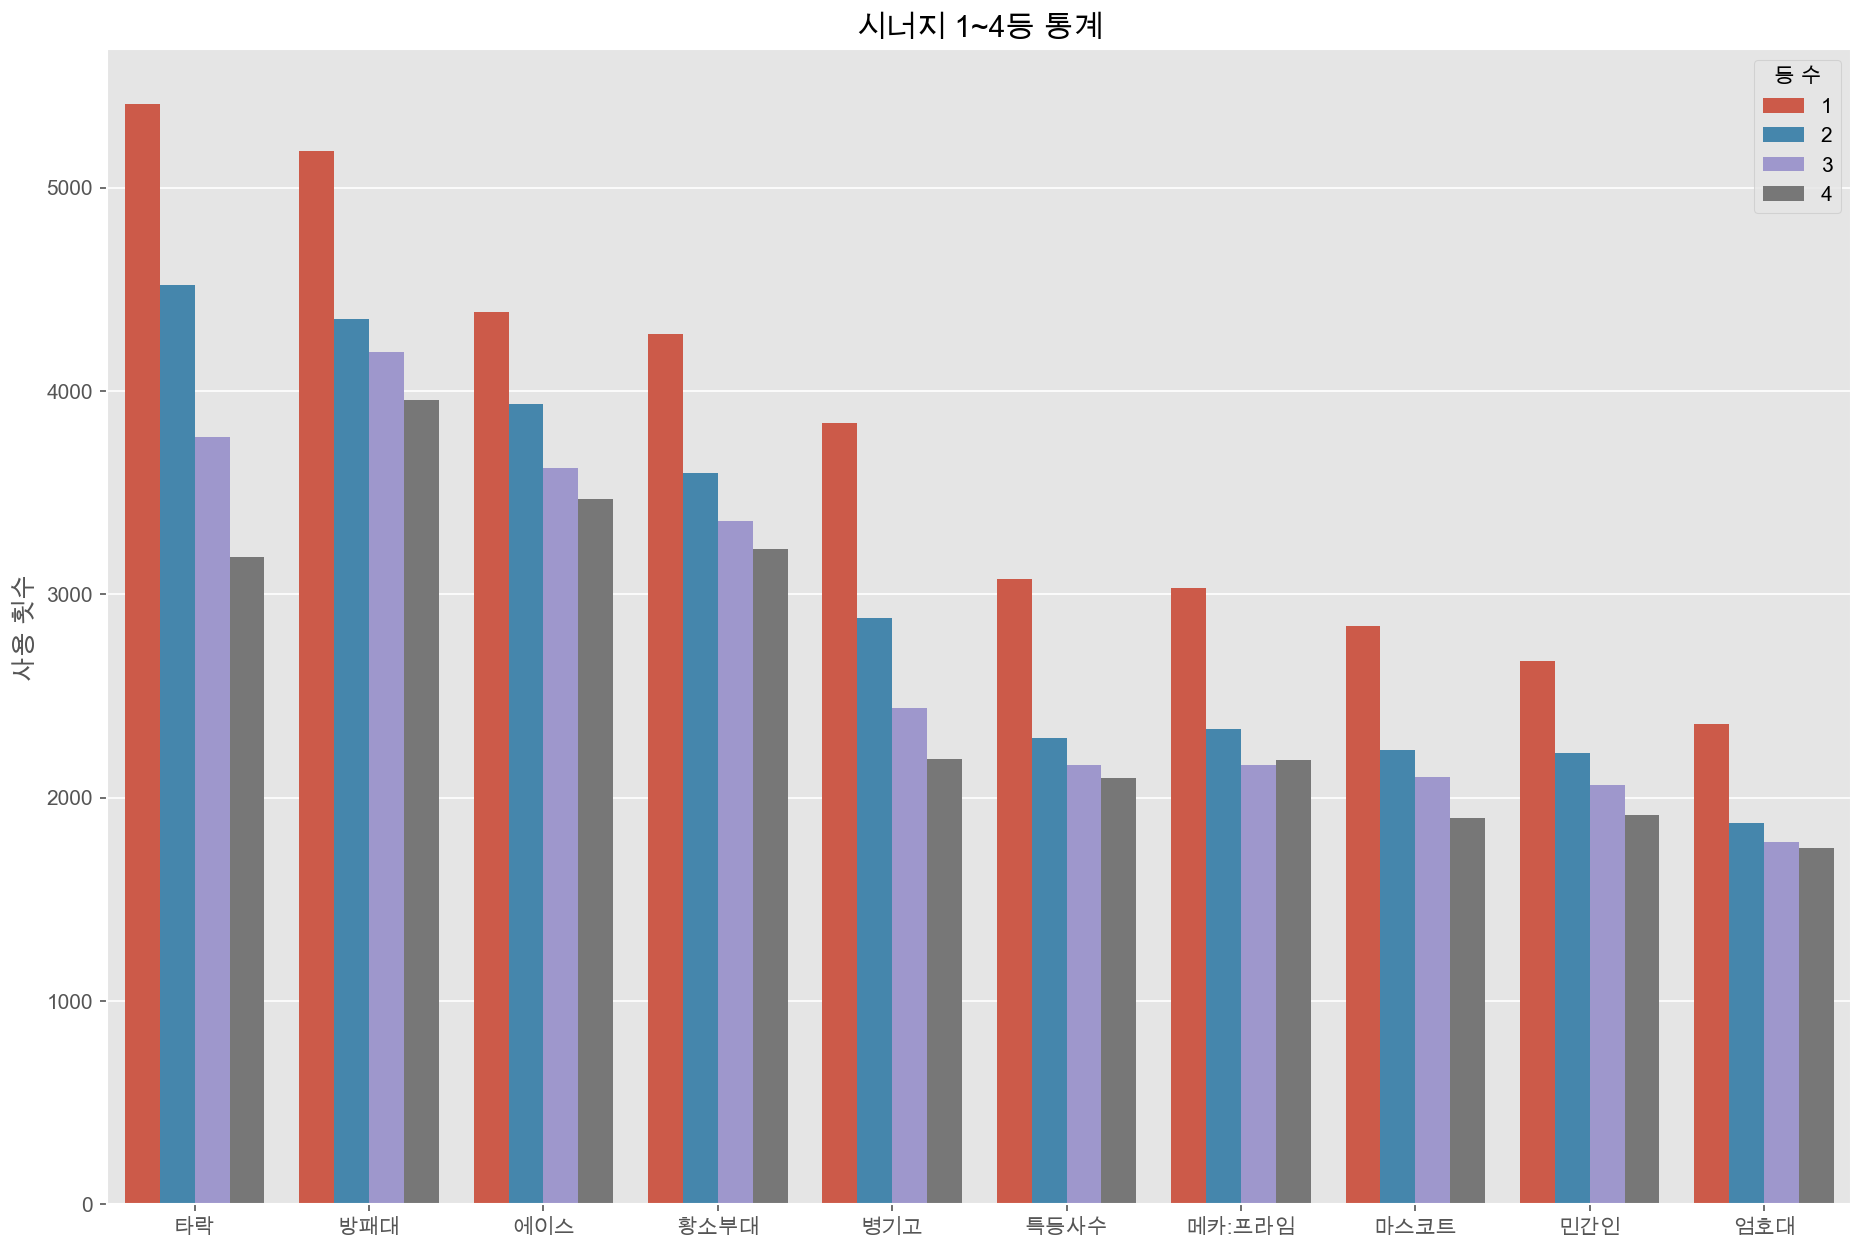

GRANDMASTER 통계


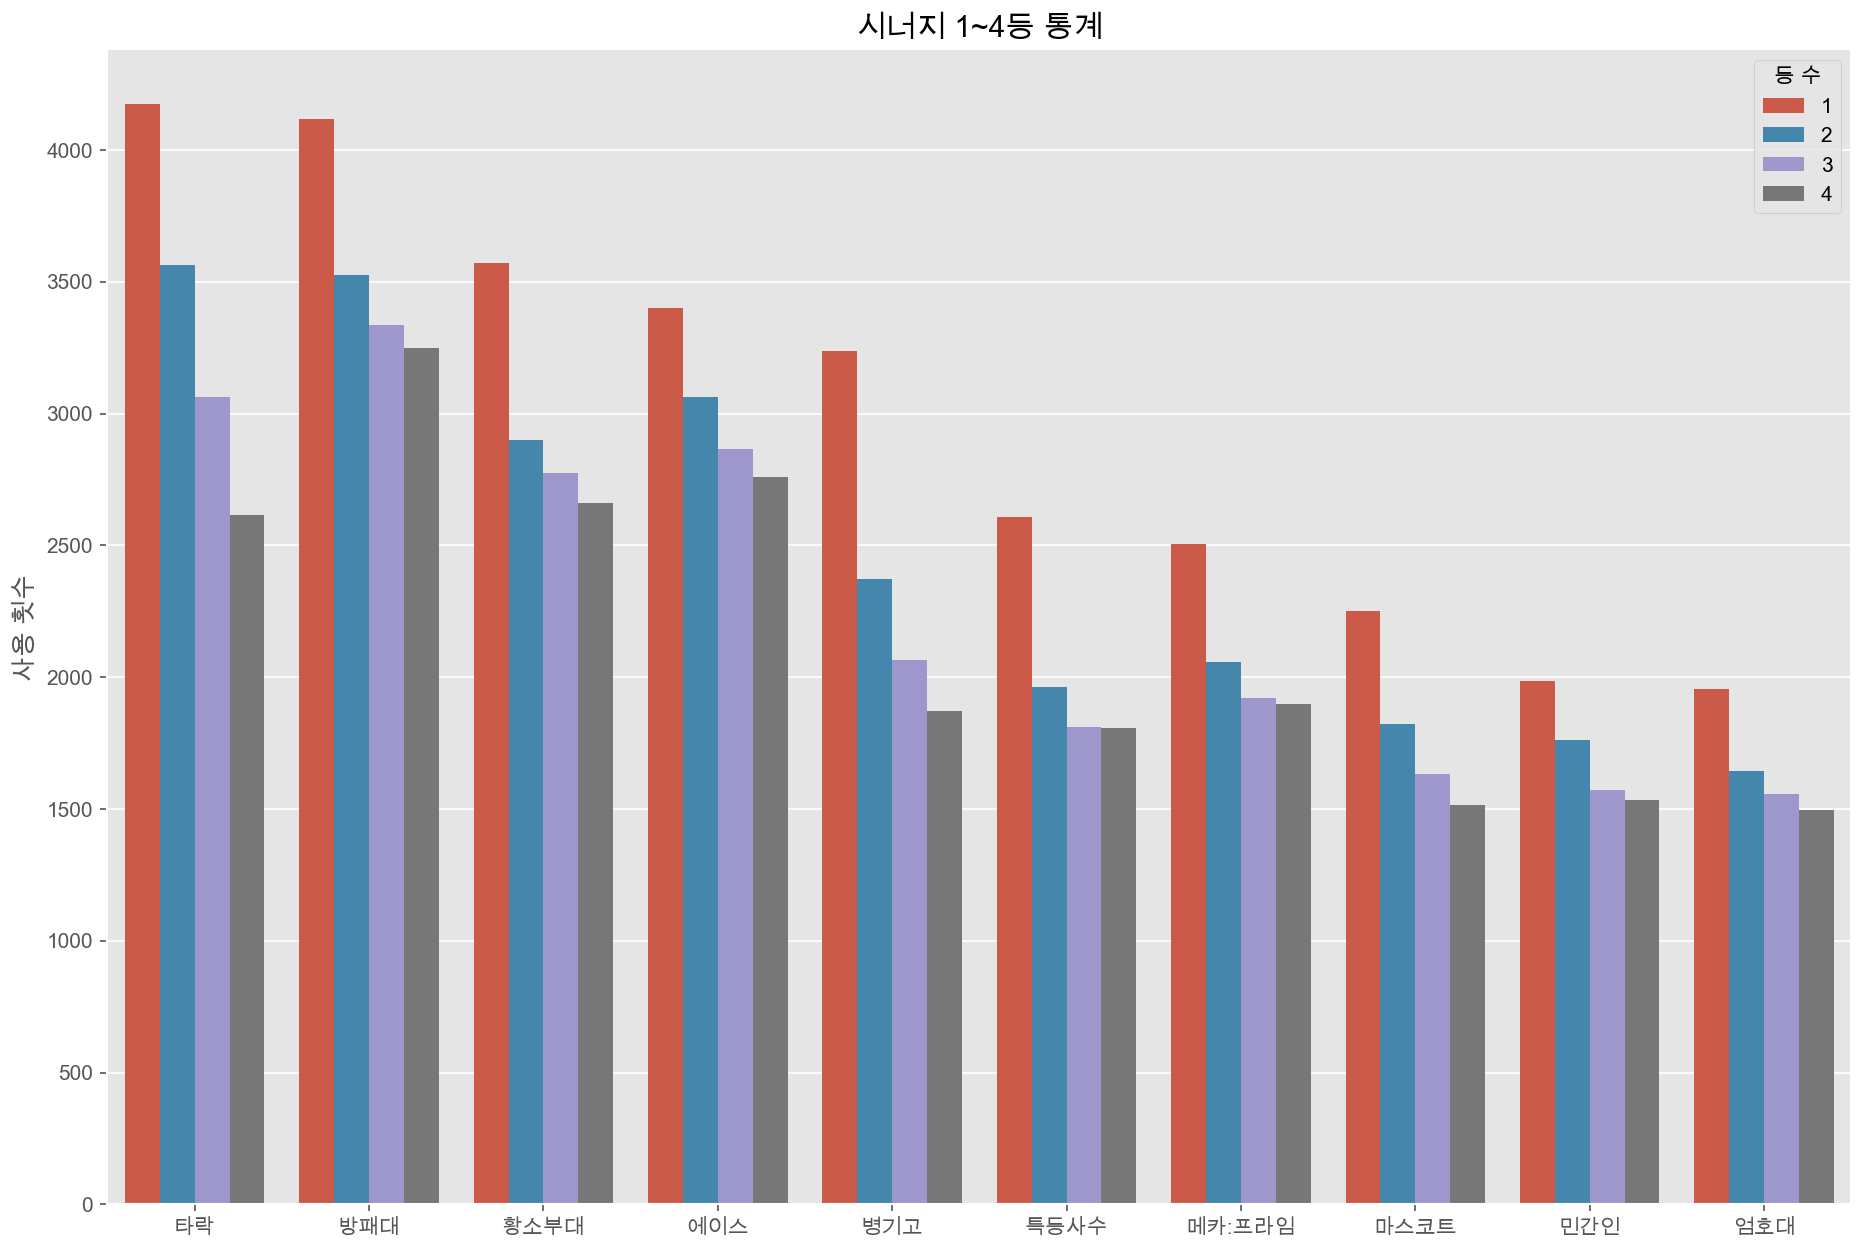

MASTER 통계


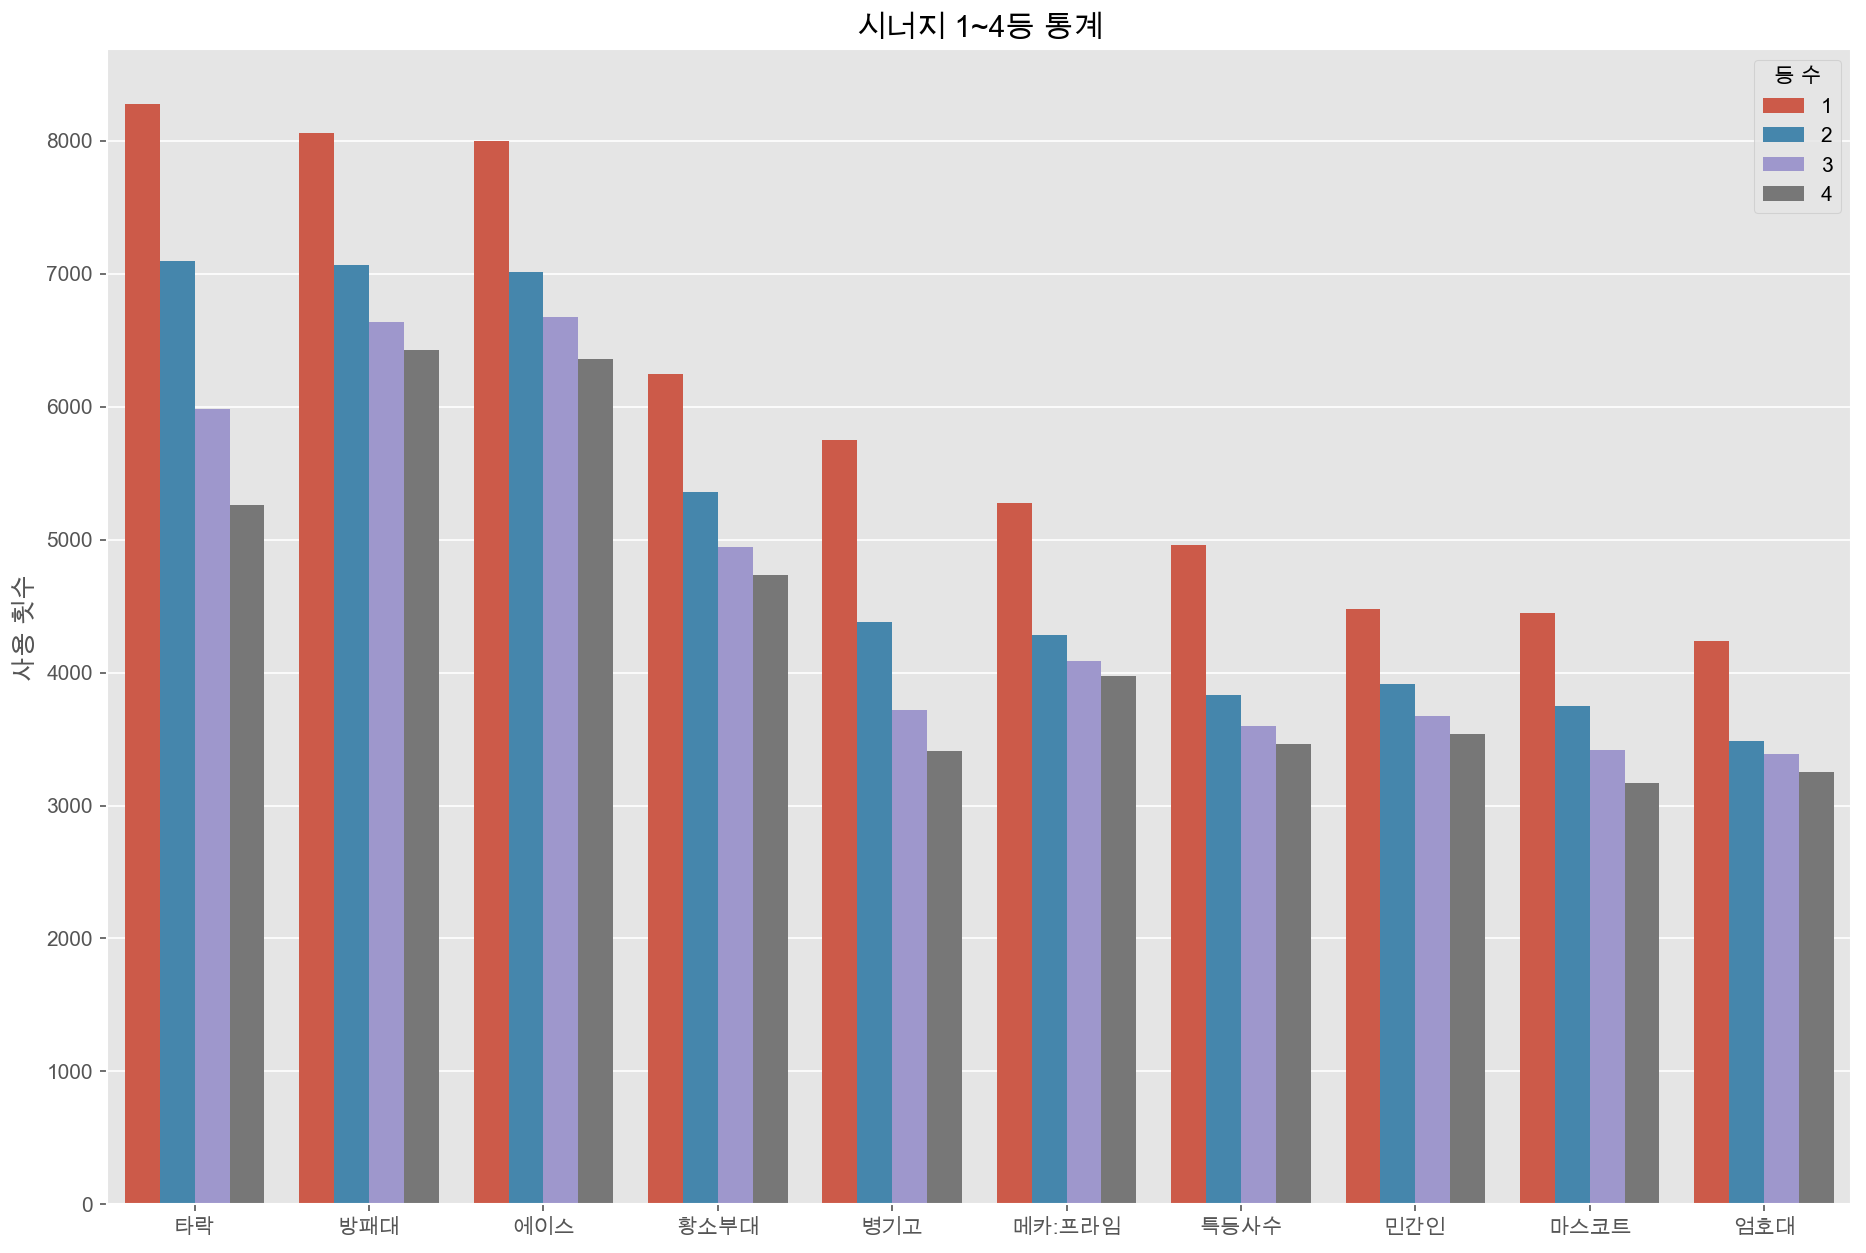

DIAMOND 통계


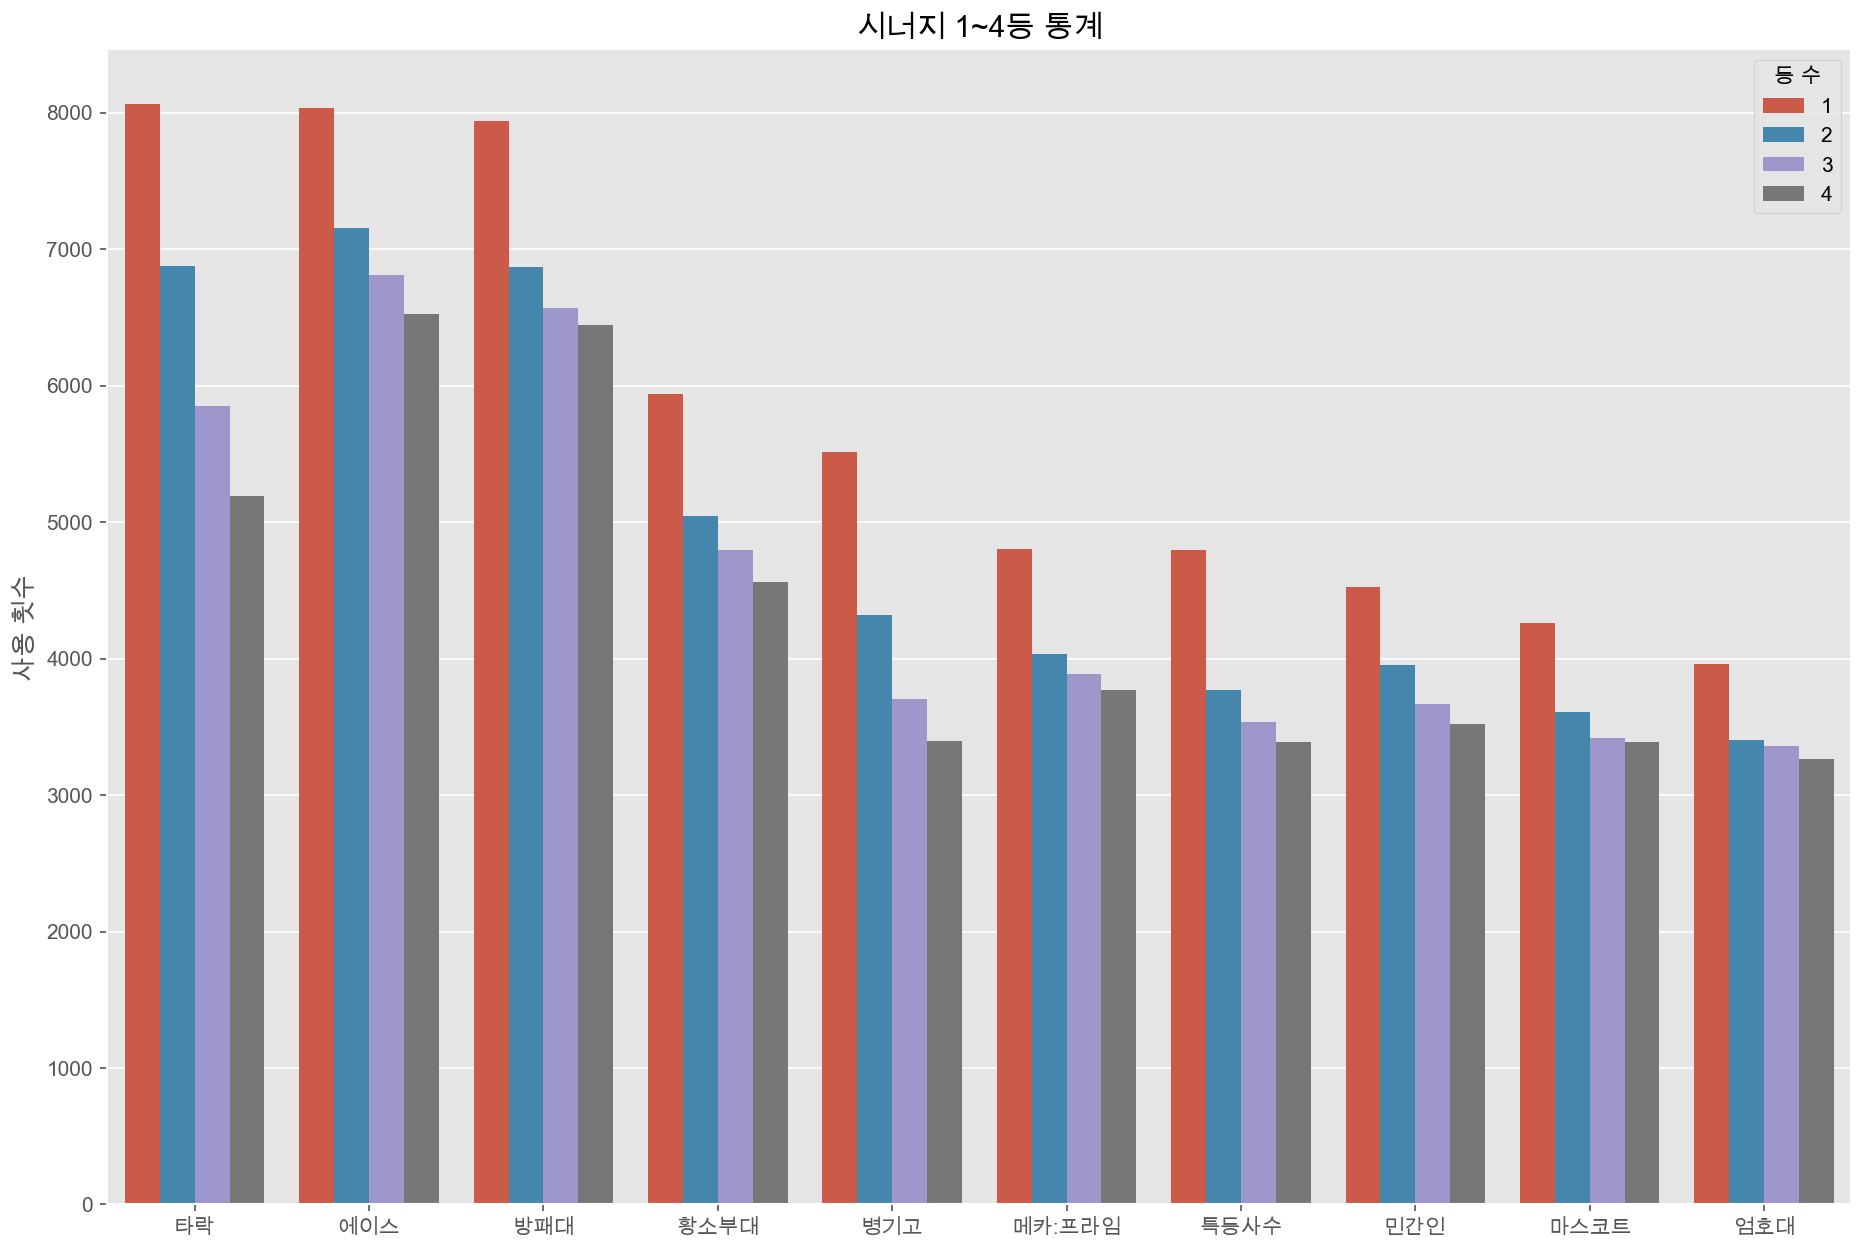

PLATINUM 통계


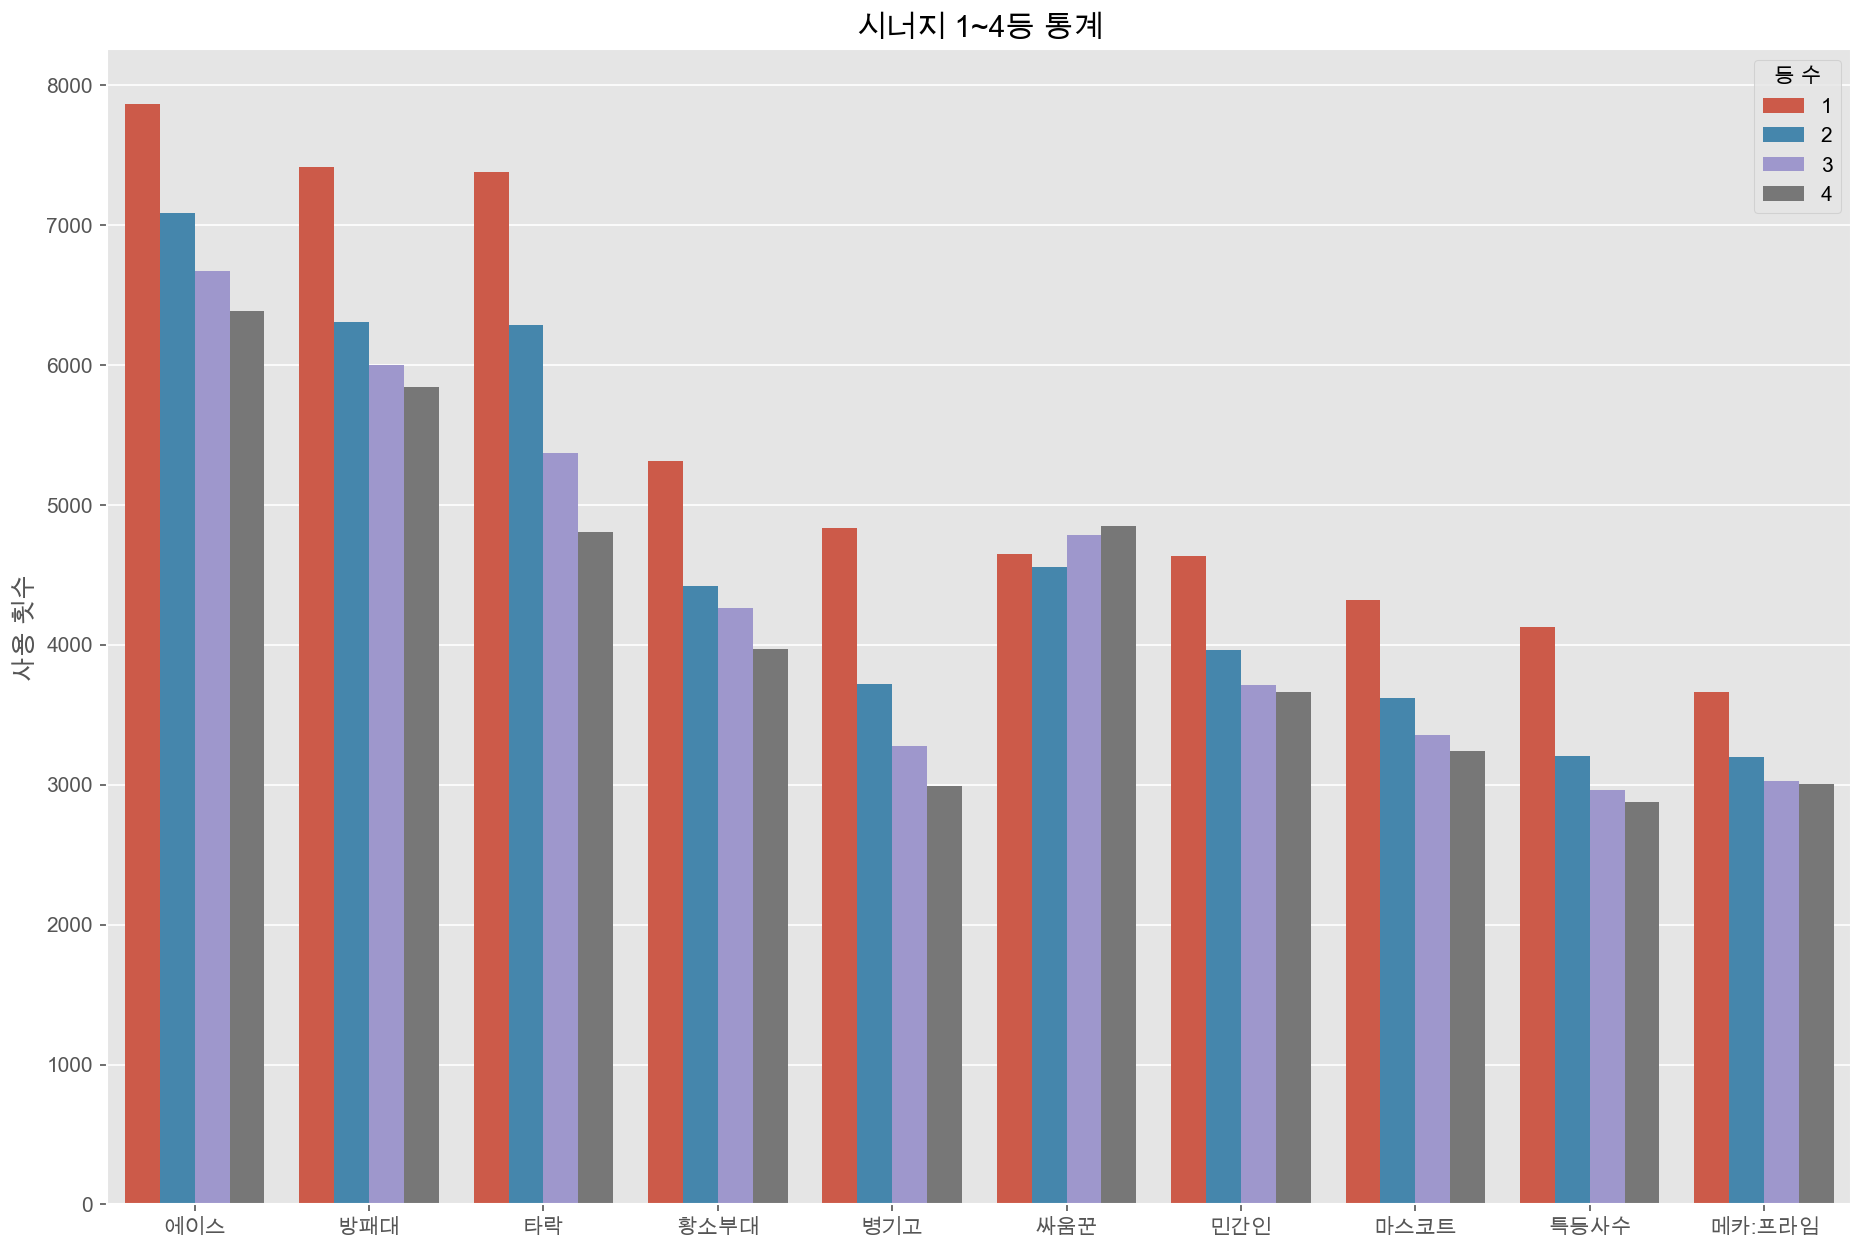

GOLD 통계


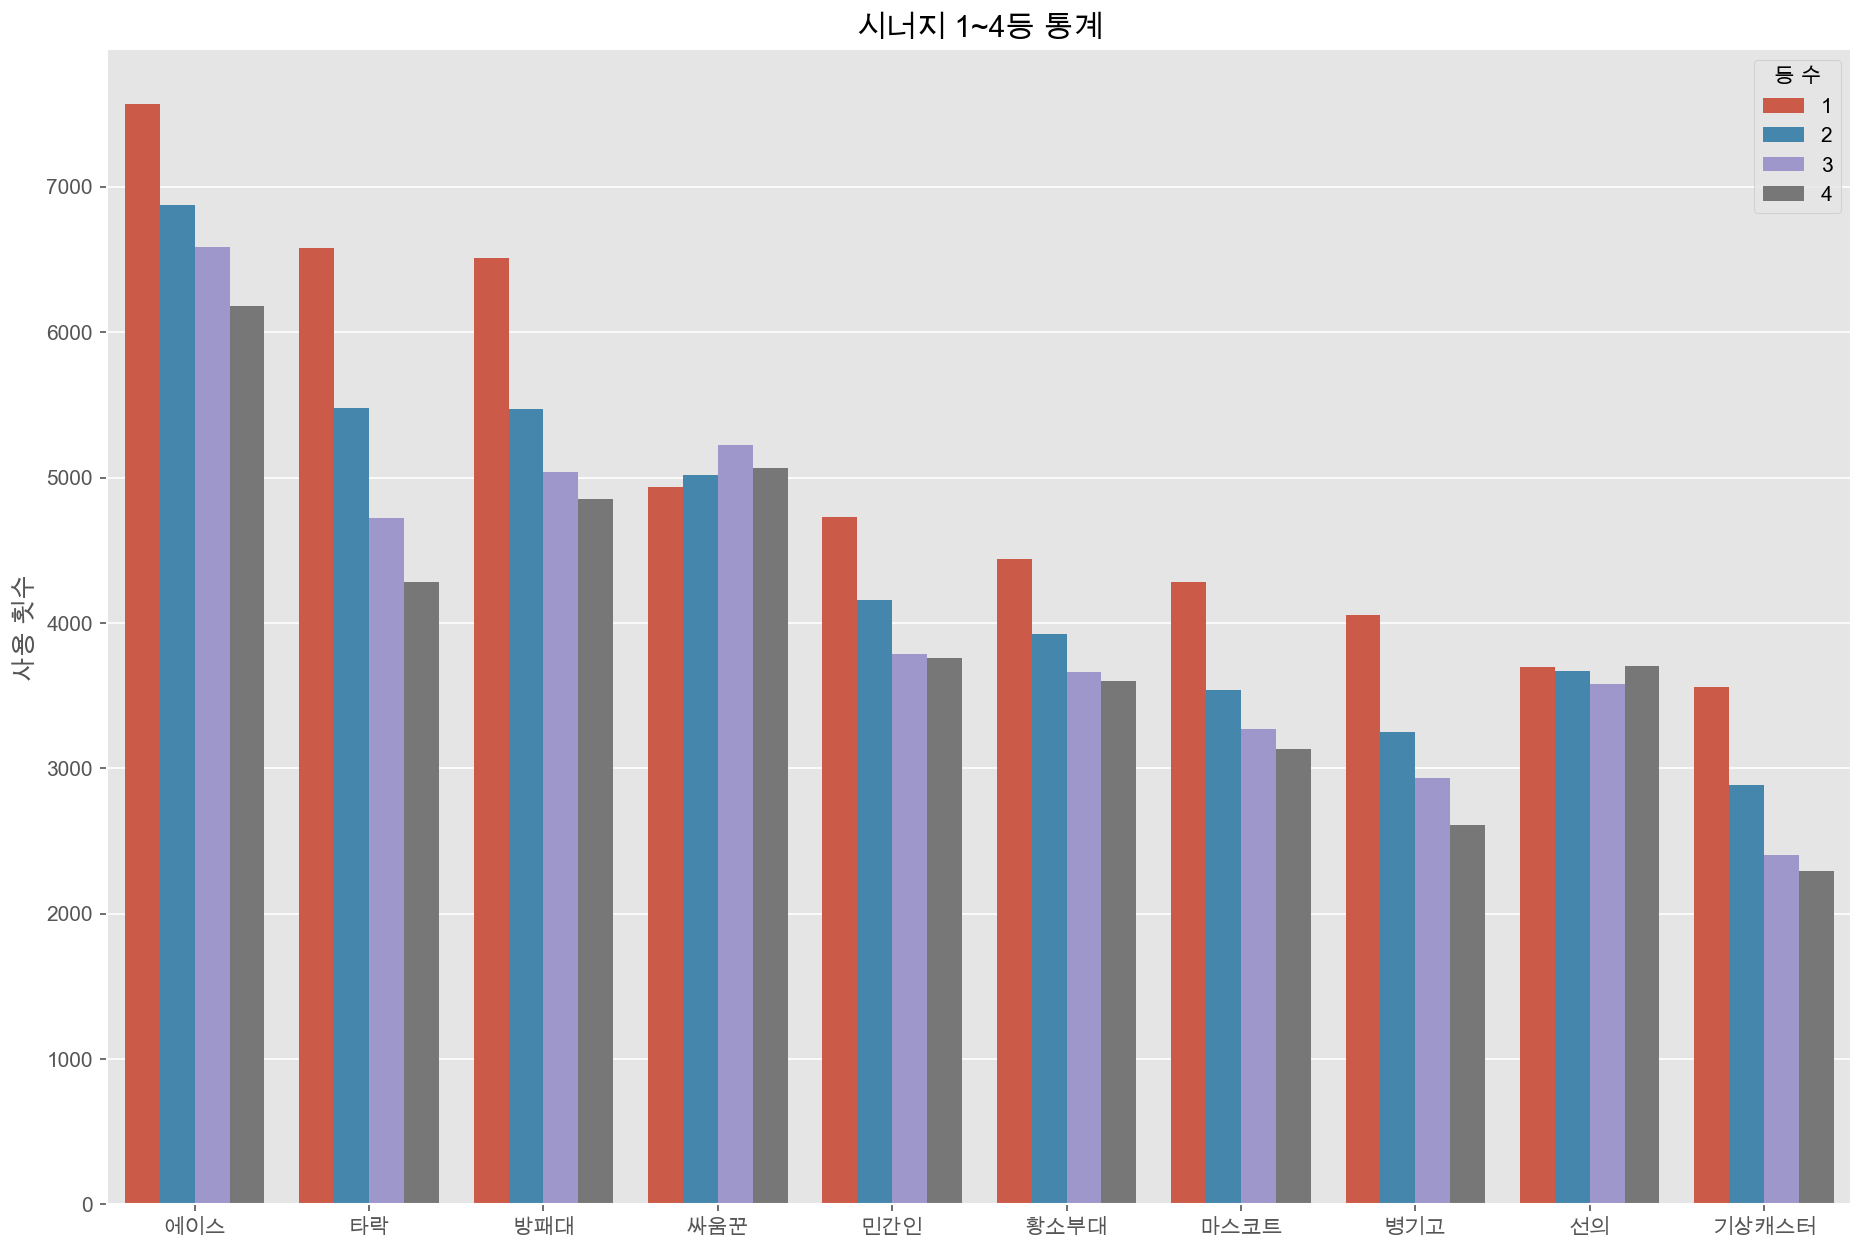

SILVER 통계


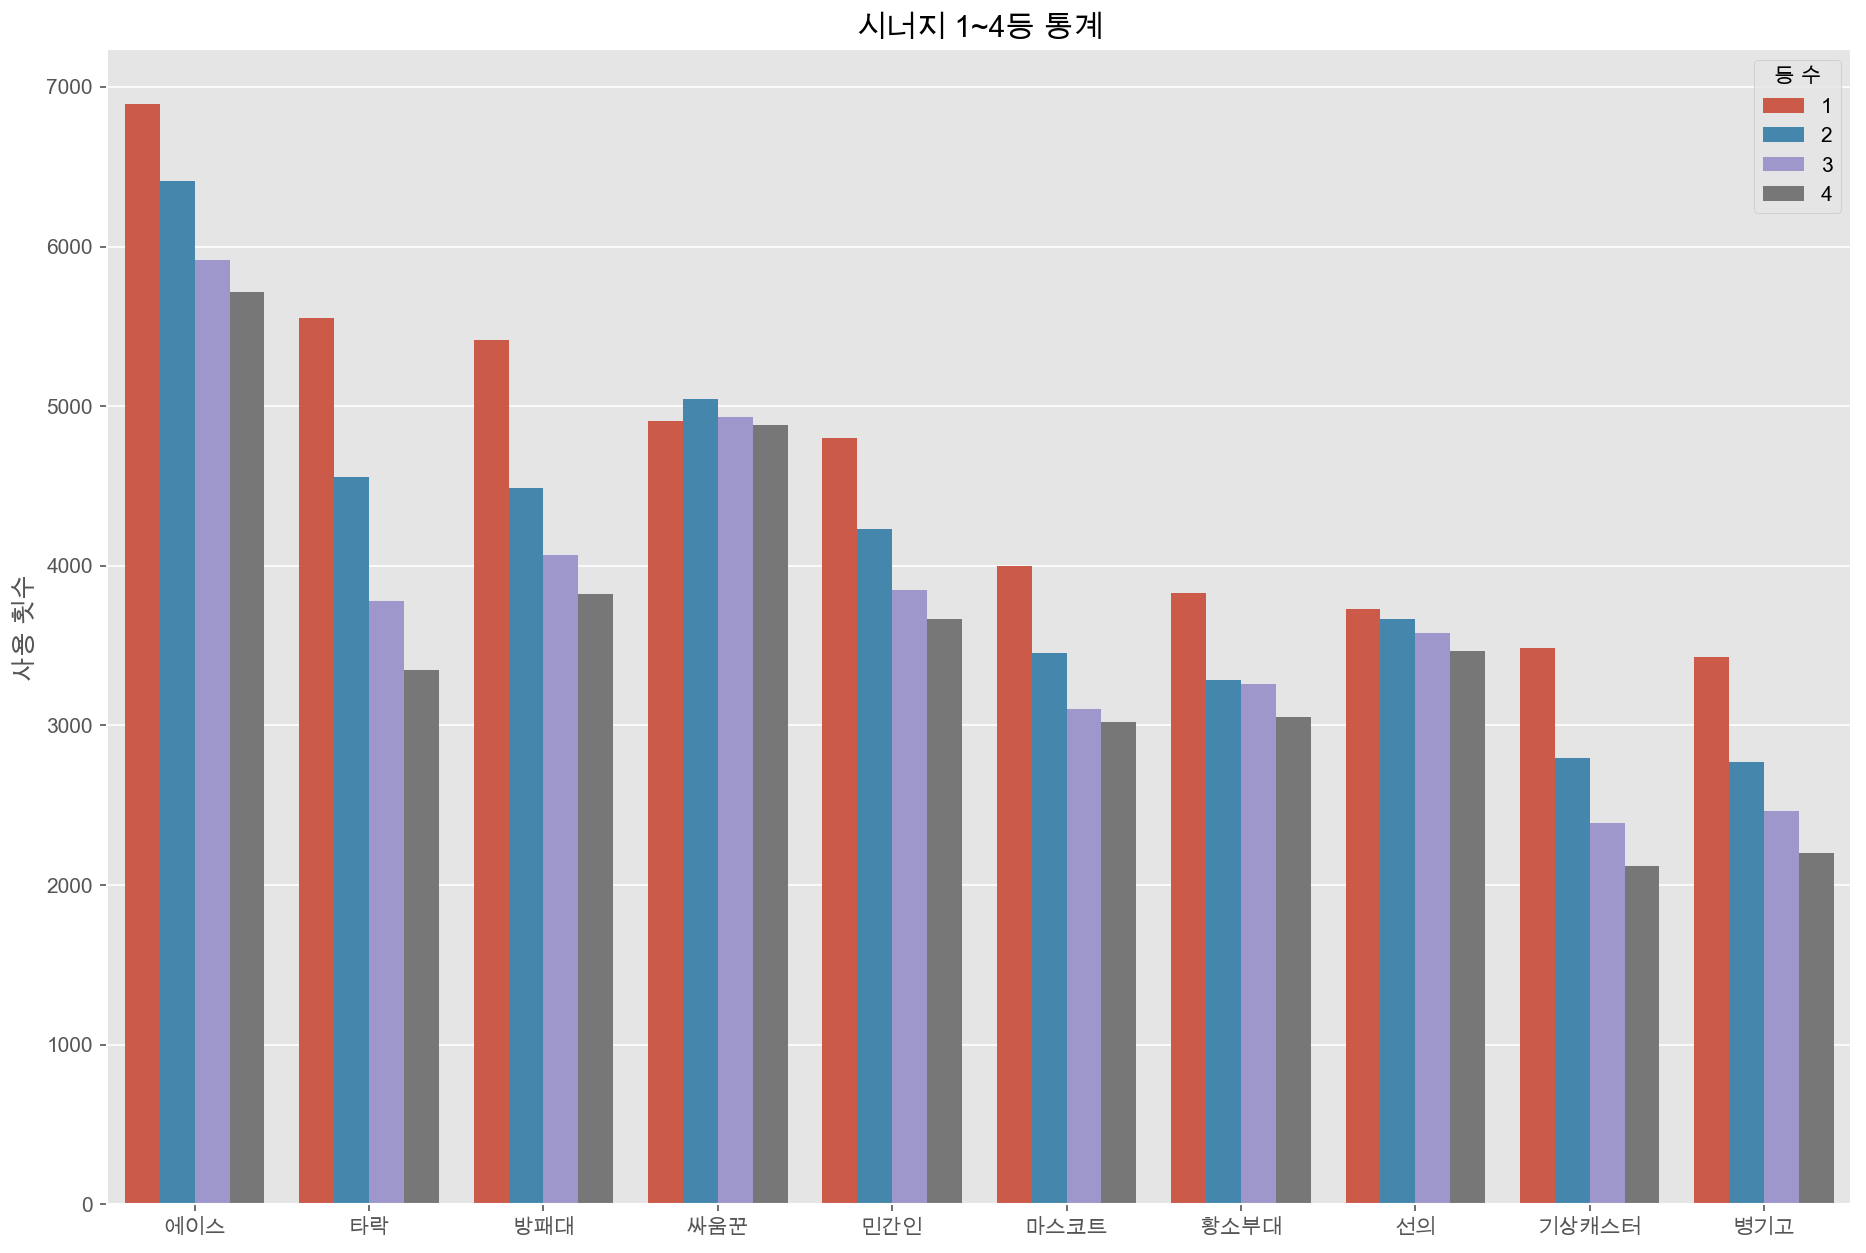

BRONZE 통계


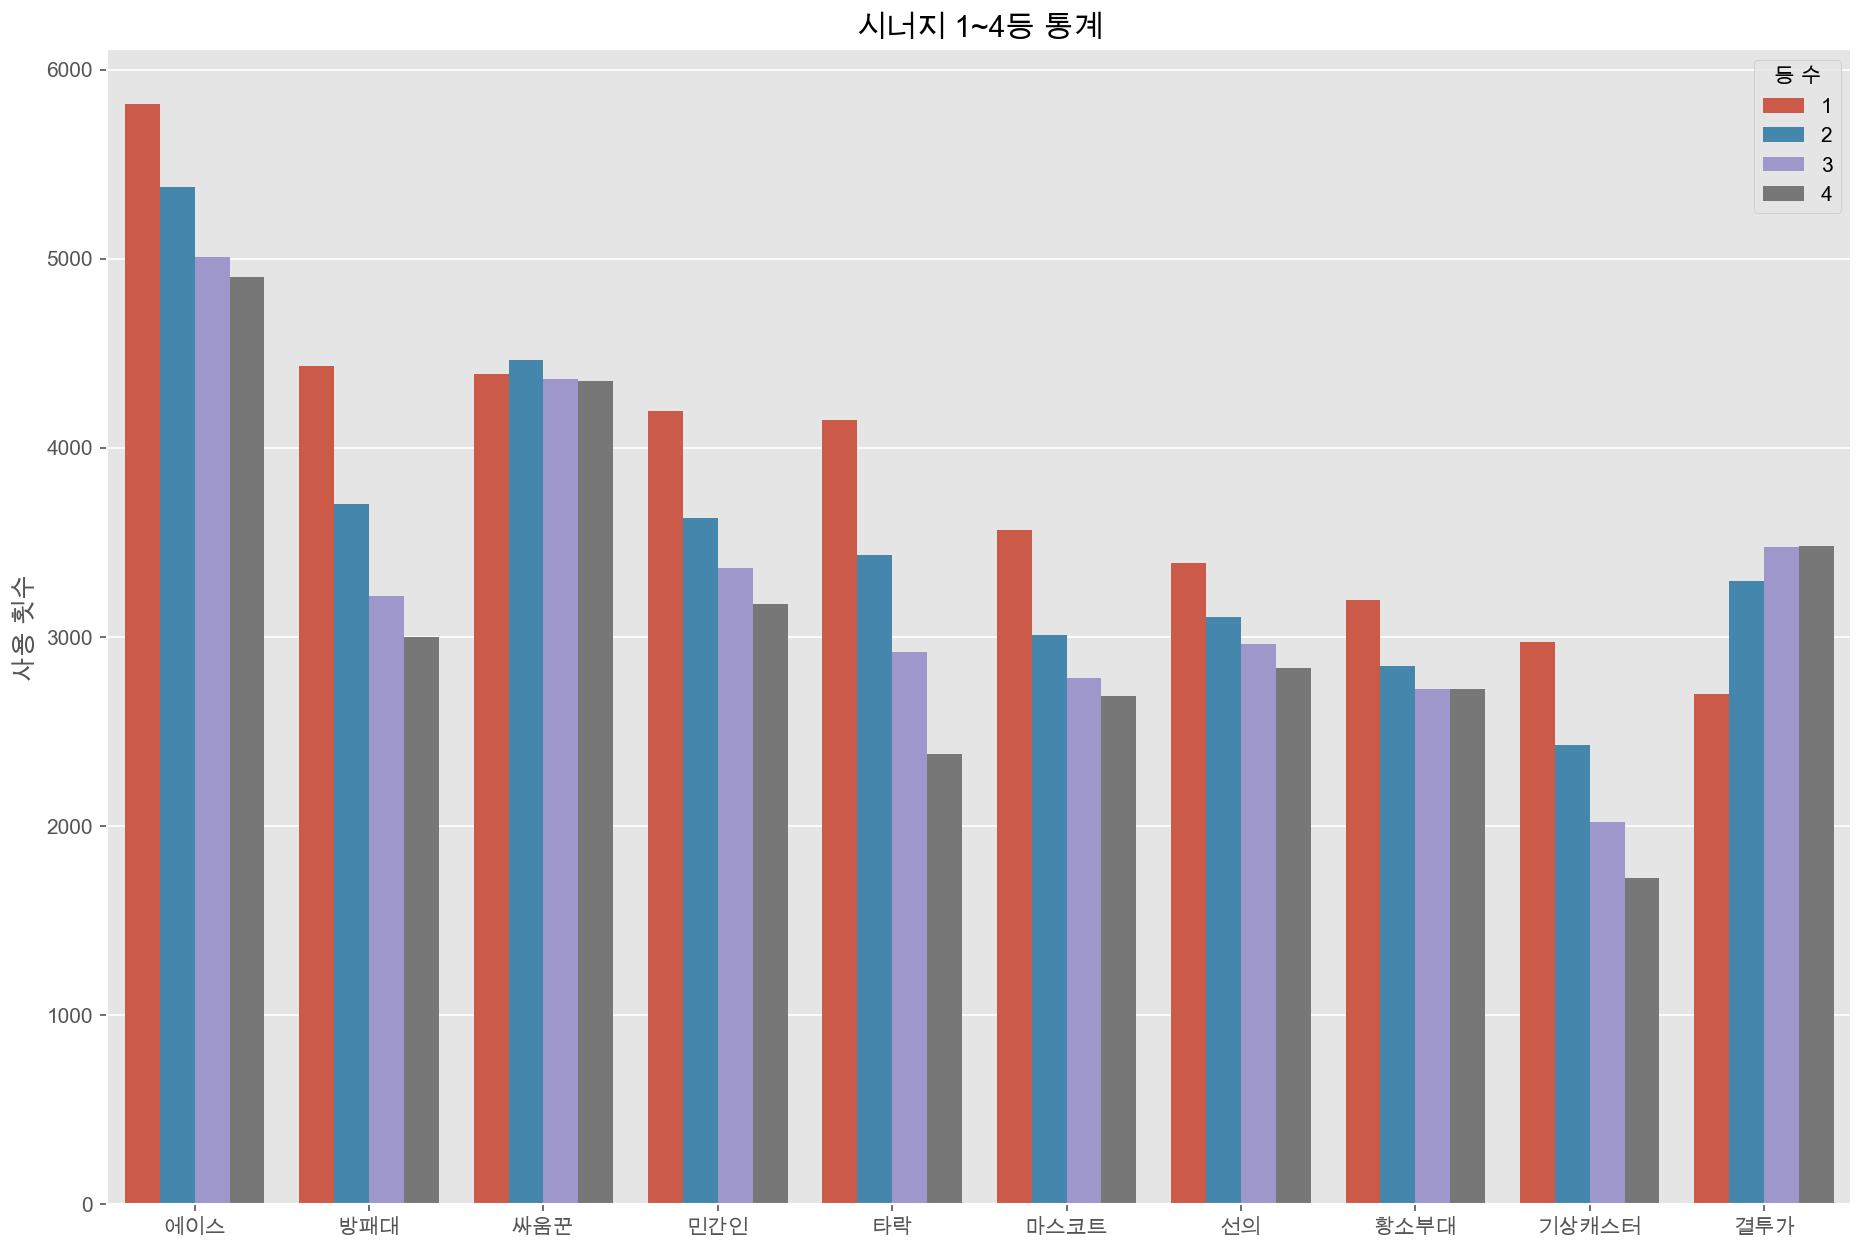

IRON 통계


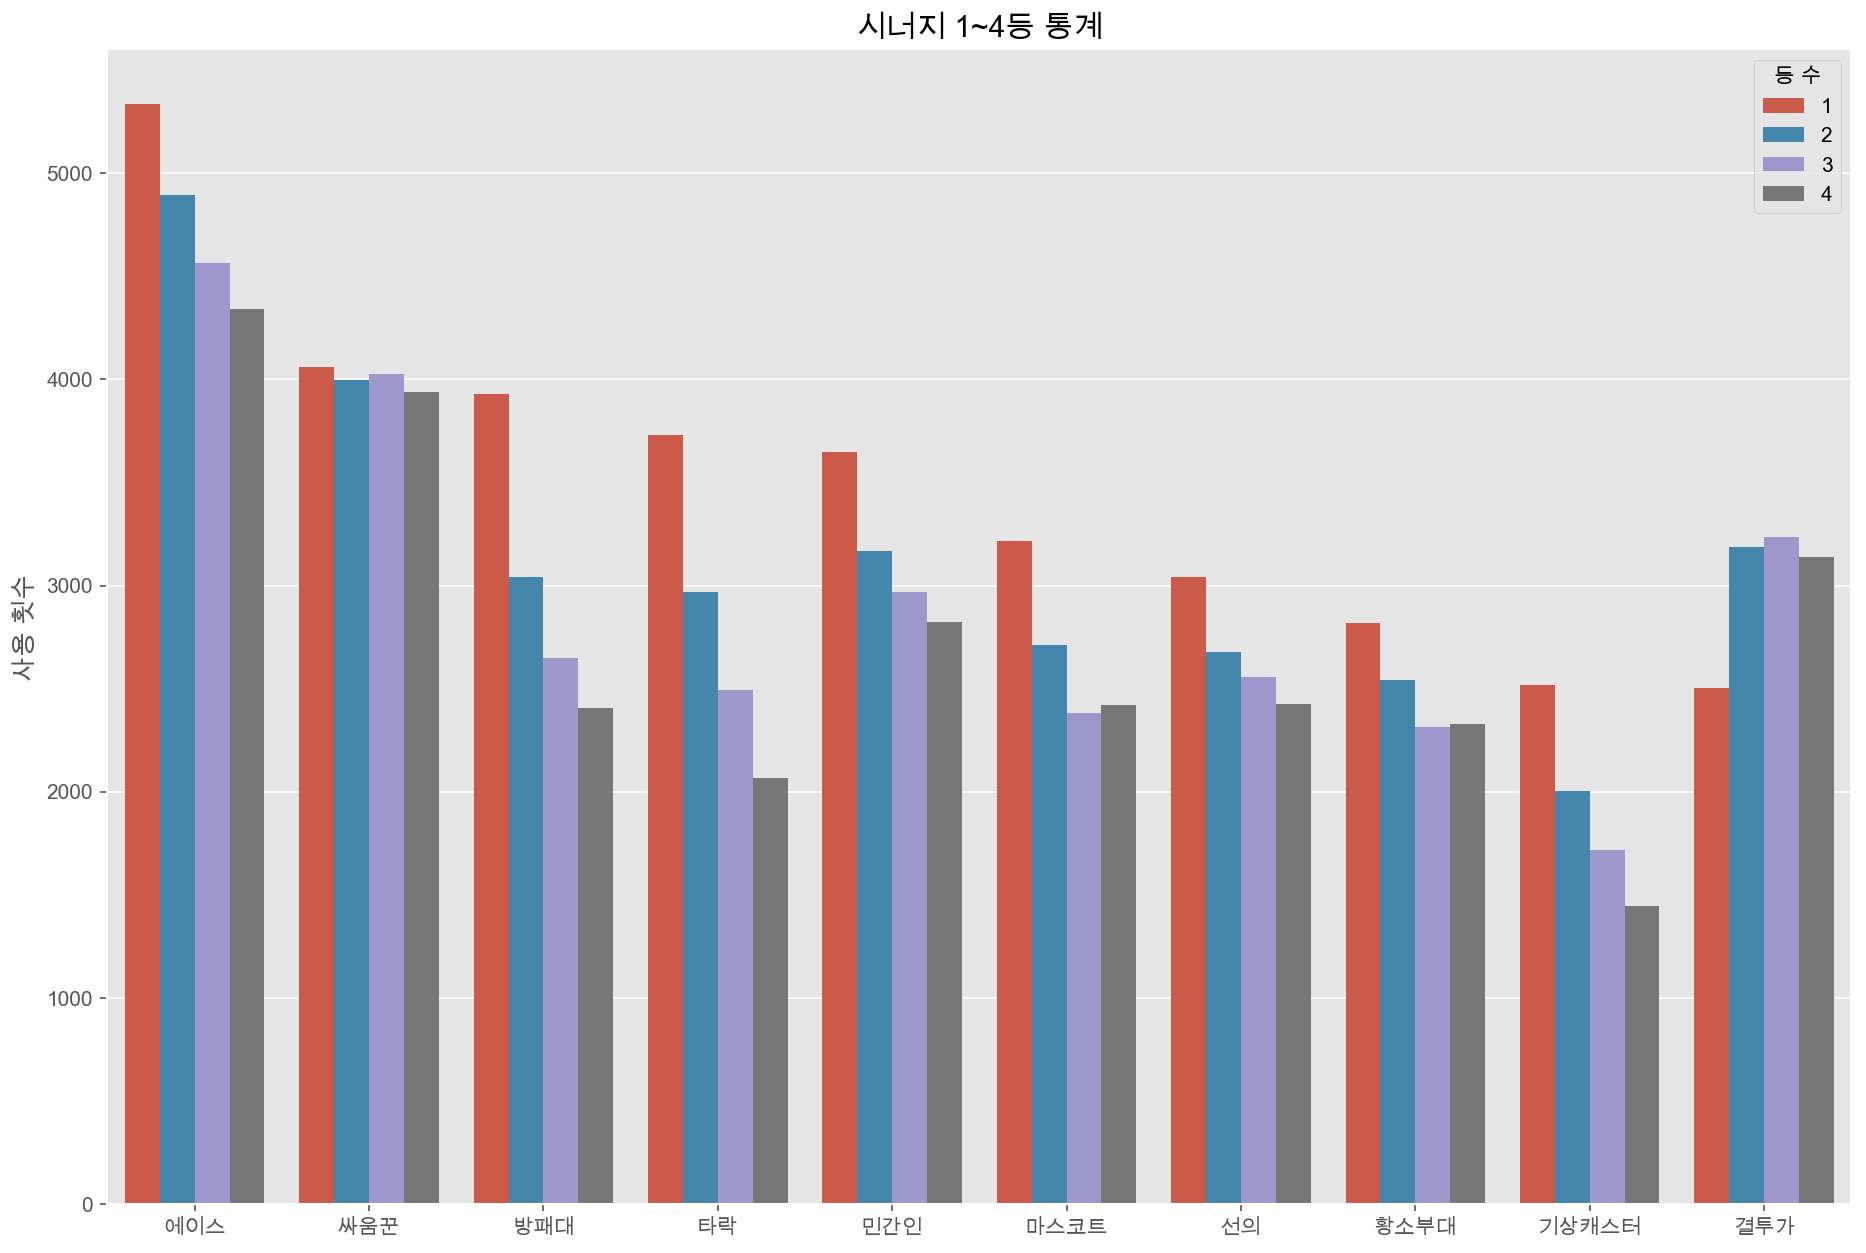

code   cnt  placement        tier
1        Set8_Corrupted  5410          1  CHALLENGER
7            Set8_Aegis  5179          1  CHALLENGER
3              Set8_Ace  4390          1  CHALLENGER
11         Set8_OxForce  4279          1  CHALLENGER
0          Set8_Arsenal  3845          1  CHALLENGER
..                  ...   ...        ...         ...
39            Set7_Jade     1          8        IRON
38      Set7_SpellThief     1          8        IRON
36  TFTTutorial_Brawler     1          8        IRON
28      Set7_Darkflight     1          8        IRON
49       Set7_Swiftshot     1          8        IRON

[2574 rows x 4 columns]

In [38]:
concat_traits = pd.DataFrame()
for idx, game in enumerate(games):
    tmp = pp.getTraitsCnt(game, pp.tier_dict[idx])
    print(pp.tier_dict[idx], "통계")
    pp.printTraits(tmp)
    concat_traits = pd.concat([concat_traits, tmp])
concat_traits

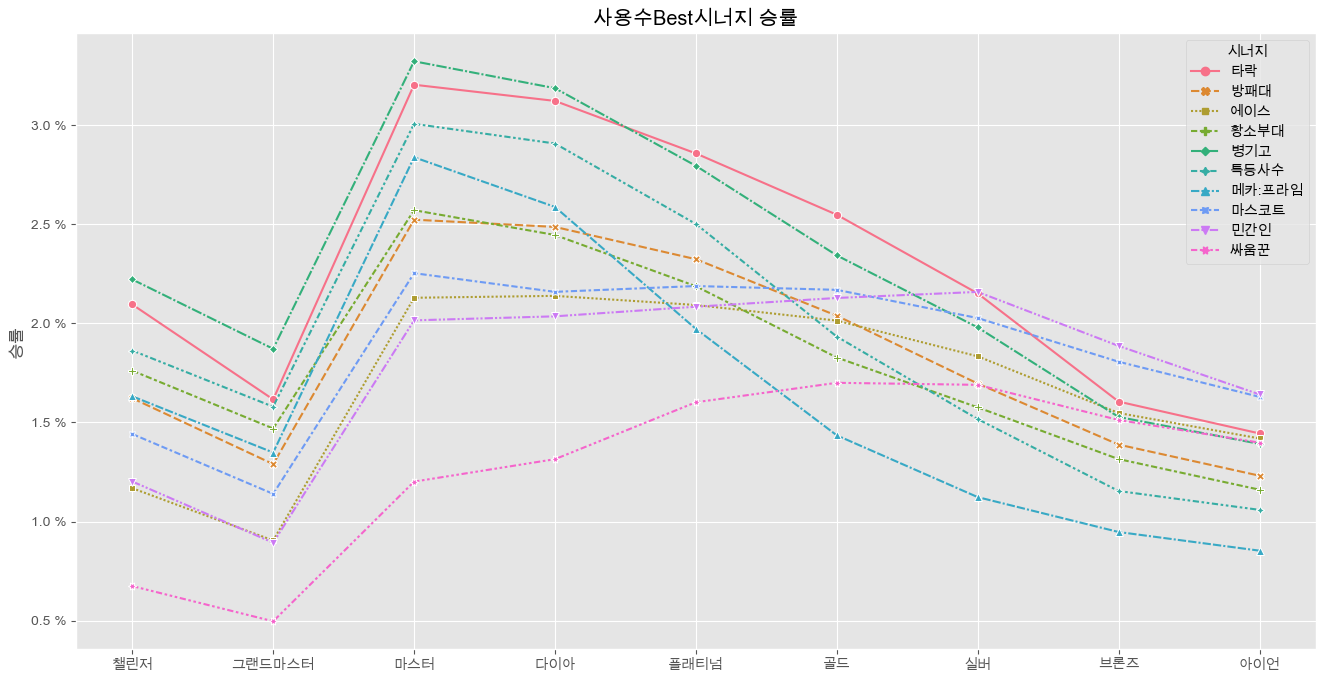

In [39]:
pp.draw_1Place(concat_traits, 'traits')